</font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

In [1]:
filename_version='2dot18'

In [2]:
import sys
source_directory = "/Users/pauljacob/Library/Python/3.8/lib/python/site-packages"

sys.path.append(source_directory)

In [3]:
#file structure
!pip3 install cookiecutter

#general
!pip3 install --upgrade pip
!pip3 install ipython-autotime --quiet


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
%load_ext autotime

time: 287 µs (started: 2022-12-12 01:16:01 -08:00)


## Import Libraries

In [5]:
#get libraries
import pandas as pd
import os
import numpy as np


#get visualization libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.patches as mpatches



#ML preprocessing
from sklearn.preprocessing import StandardScaler

#get ML functions
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


from sklearn import __version__ as sklearn_version
import datetime


#get ML metric functions
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, log_loss, auc, brier_score_loss
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report, brier_score_loss
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import log_loss

#get icr module and associated common functions
import in_vehicle_coupon_recommendation as icr
from in_vehicle_coupon_recommendation import p, rcp, rpp, rcr, sr, pl, pdc, save_and_return_data_frame, initialize_custom_notebook_settings

#sound alert
from IPython.display import Audio

time: 1.4 s (started: 2022-12-12 01:16:01 -08:00)


In [6]:
#initialize notebook
initialize_custom_notebook_settings()

%load_ext autoreload
%autoreload 1
%aimport in_vehicle_coupon_recommendation 


time: 22.2 ms (started: 2022-12-12 01:16:02 -08:00)


## Get In-Vehicle Coupon Recommendation Dataset

In [7]:
df = pd.read_csv(os.path.join('..', 'data', 'raw', 'in-vehicle-coupon-recommendation.csv'))
df = df.sample(frac=1, random_state=200)
#p(df)

time: 36.7 ms (started: 2022-12-12 01:16:02 -08:00)


<font size="5"><a id='[Data_Wrangling]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Data_Wrangling]'>**Data Wrangling**</a> </font>

In [8]:
#rename 'passanger' and 'coupon' column
df = df.rename(columns={'passanger':'passenger', 'coupon':'coupon_venue_type'})


#decode string 'age' values to (explicit) string age ranges
column_name_age_value_list = list(df.loc[:, 'age'].unique())
column_name_age_value_list_cleaned_up = ['21-25', '46-49', '26-30', '31-35', '41-45', '50+', '36-40', '<21']
column_name_age_value_dict = dict(zip(column_name_age_value_list, column_name_age_value_list_cleaned_up))
df.loc[:, 'age'] = df.loc[:, 'age'].replace(column_name_age_value_dict)

del column_name_age_value_dict, column_name_age_value_list, column_name_age_value_list_cleaned_up


#drop column 'toCoupon_GEQ5min' because all 1's
column_name_list_not_toCoupon_GEQ5min = [column_name for column_name in df.columns if column_name != 'toCoupon_GEQ5min']
df = df.loc[:, column_name_list_not_toCoupon_GEQ5min]

del column_name_list_not_toCoupon_GEQ5min


#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language...
#get column name list for column values uniques that are the same as column name 'CarryAway' value uniques
column_name_list_same_unique_values = []
for column_name in df.columns:    
    value = icr.column_name_value_sets_equal(df, column_name1='CarryAway', column_name2=column_name)
    if value == 1:
        column_name_list_same_unique_values = column_name_list_same_unique_values + [column_name]
#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language
column_name_Bar_value_list = list(df.loc[:, 'Bar'].unique())
column_name_Bar_value_list_cleaned_up = ['never', '<1', '1-3', '>8', np.nan, '4-8']
column_name_Bar_value_dict = dict(zip(column_name_Bar_value_list, column_name_Bar_value_list_cleaned_up))
df.loc[:, column_name_list_same_unique_values] = df.loc[:, column_name_list_same_unique_values].replace(column_name_Bar_value_dict)

del column_name_Bar_value_dict, column_name_Bar_value_list, column_name_Bar_value_list_cleaned_up, column_name_list_same_unique_values


#clean up columns 'direction_same' and 'direction_opp' to 'direction_same_or_opposite'
#drop column 'direction_same'
column_name_list_not_direction_same = [column_name for column_name in df.columns if column_name != 'direction_same']
df = df.loc[:, column_name_list_not_direction_same]

del column_name_list_not_direction_same

#rename 'direction_opp' to 'direction_same_or_opposite'
df = df.rename(columns={'direction_opp':'direction_same_or_opposite'})


#solution1: fill in missing values with 'no response' or 'unknown'
column_name_list = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'car']
df.loc[:, column_name_list] = df.loc[:, column_name_list].fillna('no response')


#fix income values
income_list = df.loc[:, 'income'].drop_duplicates().to_list()
income_list_fixed = ['\$12500 - \$24999', '\$87500 - \$99999', '\$37500 - \$49999', '\$50000 - \$62499', '\$75000 - \$87499', '\$25000 - \$37499', '\$100000 or More', 'Less than \$12500', '\$62500 - \$74999']
income_dictionary = dict(zip(income_list, income_list_fixed))
df.loc[:, 'income'] = df.loc[:, 'income'].replace(income_dictionary)
p(df)



(12684, 24)


destination passenger weather  temperature  time  \
11199             Home     Alone   Sunny           80   6PM   
1474              Work     Alone   Sunny           55   7AM   
10836             Home     Alone   Sunny           30   6PM   
4567   No Urgent Place     Alone   Sunny           80  10AM   
5658   No Urgent Place     Alone   Sunny           80   2PM   
11343             Work     Alone   Sunny           80   7AM   
9036              Home     Alone   Snowy           30  10PM   
11050             Home     Alone   Sunny           80   6PM   
784               Work     Alone   Sunny           80   7AM   
1818   No Urgent Place    Kid(s)   Sunny           80  10AM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
11199  Carry out & Take away         2h    Male  21-25             Single   
1474                     Bar         1d    Male  46-49    Married partner   
10836  Carry out & Take away         1d    Male  26-30             Single   
4567                     Bar         1d  Female  21-25  Unmarried partner   
5658         Restaurant(<20)         2h  Female  31-35             Single   
11343      Restaurant(20-50)         2h  Female  36-40             Single   
9036         Restaurant(<20)         2h    Male  26-30             Single   
11050      Restaurant(20-50)         1d    Male  46-49             Single   
784    Carry out & Take away         2h  Female  21-25             Single   
1818                     Bar         1d  Female  36-40    Married partner   

       has_children                               education  \
11199             0                        Bachelors degree   
1474              1  Graduate degree (Masters or Doctorate)   
10836             0                Some college - no degree   
4567              0  Graduate degree (Masters or Doctorate)   
5658              1                        Bachelors degree   
11343             1                        Bachelors degree   
9036              0                Some college - no degree   
11050             0                Some college - no degree   
784               0  Graduate degree (Masters or Doctorate)   
1818              1                        Bachelors degree   

                               occupation             income          car  \
11199                             Student  \$12500 - \$24999  no response   
1474                           Management  \$87500 - \$99999  no response   
10836                     Sales & Related  \$37500 - \$49999  no response   
4567           Education&Training&Library  \$37500 - \$49999  no response   
5658               Production Occupations  \$37500 - \$49999  no response   
11343  Food Preparation & Serving Related  \$12500 - \$24999  no response   
9036                              Student  \$12500 - \$24999  no response   
11050                     Sales & Related  Less than \$12500  no response   
784                                 Legal  \$25000 - \$37499  no response   
1818                              Retired  \$50000 - \$62499  no response   

         Bar  CoffeeHouse    CarryAway RestaurantLessThan20 Restaurant20To50  \
11199  never  no response  no response          no response            never   
1474   never           <1           <1                never               <1   
10836     <1  no response           >8                   <1            never   
4567     1-3           <1           <1                   <1            never   
5658   never        never           >8                  4-8            never   
11343    1-3           <1           >8                never            never   
9036      <1        never           >8                never              1-3   
11050     <1           <1           >8                   >8               >8   
784       <1           <1           <1          no response               <1   
1818     1-3        never           >8                   <1            never   

       toCoupon_GEQ15min  toCoupon_GEQ25min  d

time: 89.2 ms (started: 2022-12-12 01:16:02 -08:00)


### Store df_pre_feature_engineering from df

In [9]:
df_pre_feature_engineering = df.copy()
p(df_pre_feature_engineering)

(12684, 24)


destination passenger weather  temperature  time  \
11199             Home     Alone   Sunny           80   6PM   
1474              Work     Alone   Sunny           55   7AM   
10836             Home     Alone   Sunny           30   6PM   
4567   No Urgent Place     Alone   Sunny           80  10AM   
5658   No Urgent Place     Alone   Sunny           80   2PM   
11343             Work     Alone   Sunny           80   7AM   
9036              Home     Alone   Snowy           30  10PM   
11050             Home     Alone   Sunny           80   6PM   
784               Work     Alone   Sunny           80   7AM   
1818   No Urgent Place    Kid(s)   Sunny           80  10AM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
11199  Carry out & Take away         2h    Male  21-25             Single   
1474                     Bar         1d    Male  46-49    Married partner   
10836  Carry out & Take away         1d    Male  26-30             Single   
4567                     Bar         1d  Female  21-25  Unmarried partner   
5658         Restaurant(<20)         2h  Female  31-35             Single   
11343      Restaurant(20-50)         2h  Female  36-40             Single   
9036         Restaurant(<20)         2h    Male  26-30             Single   
11050      Restaurant(20-50)         1d    Male  46-49             Single   
784    Carry out & Take away         2h  Female  21-25             Single   
1818                     Bar         1d  Female  36-40    Married partner   

       has_children                               education  \
11199             0                        Bachelors degree   
1474              1  Graduate degree (Masters or Doctorate)   
10836             0                Some college - no degree   
4567              0  Graduate degree (Masters or Doctorate)   
5658              1                        Bachelors degree   
11343             1                        Bachelors degree   
9036              0                Some college - no degree   
11050             0                Some college - no degree   
784               0  Graduate degree (Masters or Doctorate)   
1818              1                        Bachelors degree   

                               occupation             income          car  \
11199                             Student  \$12500 - \$24999  no response   
1474                           Management  \$87500 - \$99999  no response   
10836                     Sales & Related  \$37500 - \$49999  no response   
4567           Education&Training&Library  \$37500 - \$49999  no response   
5658               Production Occupations  \$37500 - \$49999  no response   
11343  Food Preparation & Serving Related  \$12500 - \$24999  no response   
9036                              Student  \$12500 - \$24999  no response   
11050                     Sales & Related  Less than \$12500  no response   
784                                 Legal  \$25000 - \$37499  no response   
1818                              Retired  \$50000 - \$62499  no response   

         Bar  CoffeeHouse    CarryAway RestaurantLessThan20 Restaurant20To50  \
11199  never  no response  no response          no response            never   
1474   never           <1           <1                never               <1   
10836     <1  no response           >8                   <1            never   
4567     1-3           <1           <1                   <1            never   
5658   never        never           >8                  4-8            never   
11343    1-3           <1           >8                never            never   
9036      <1        never           >8                never              1-3   
11050     <1           <1           >8                   >8               >8   
784       <1           <1           <1          no response               <1   
1818     1-3        never           >8                   <1            never   

       toCoupon_GEQ15min  toCoupon_GEQ25min  d

time: 11.1 ms (started: 2022-12-12 01:16:02 -08:00)


In [10]:
column_name_list_scenario = ['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon_venue_type', 'expiration', 
                             'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same_or_opposite']
pl(column_name_list_scenario)


10


['destination',
 'passenger',
 'weather',
 'temperature',
 'time',
 'coupon_venue_type',
 'expiration',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same_or_opposite']

time: 1.86 ms (started: 2022-12-12 01:16:02 -08:00)


In [11]:
df.loc[:, column_name_list_scenario].drop_duplicates().shape

(201, 10)

time: 8 ms (started: 2022-12-12 01:16:02 -08:00)


In [12]:
df.loc[:, column_name_list_scenario].drop_duplicates() #there are plenty of combinations of sceanrios, what are the scenario counts??

#are some scenarios not represented and why???

destination  passenger weather  temperature  time  \
11199             Home      Alone   Sunny           80   6PM   
1474              Work      Alone   Sunny           55   7AM   
10836             Home      Alone   Sunny           30   6PM   
4567   No Urgent Place      Alone   Sunny           80  10AM   
5658   No Urgent Place      Alone   Sunny           80   2PM   
431    No Urgent Place  Friend(s)   Sunny           80  10AM   
11668  No Urgent Place    Partner   Rainy           55   6PM   
473    No Urgent Place      Alone   Sunny           55   2PM   
4732              Home      Alone   Sunny           80  10PM   
2323   No Urgent Place  Friend(s)   Sunny           80   6PM   
3256   No Urgent Place  Friend(s)   Sunny           55   2PM   
3122   No Urgent Place  Friend(s)   Sunny           80   6PM   
9648   No Urgent Place      Alone   Sunny           30  10AM   
7329   No Urgent Place     Kid(s)   Snowy           30   6PM   
3523   No Urgent Place    Partner   Sunny           80  10AM   
2611   No Urgent Place     Kid(s)   Sunny           80  10AM   
4376   No Urgent Place    Partner   Sunny           80   2PM   
3898   No Urgent Place  Friend(s)   Sunny           55   2PM   
637    No Urgent Place  Friend(s)   Sunny           80   2PM   
5743   No Urgent Place  Friend(s)   Sunny           80   2PM   
5041   No Urgent Place     Kid(s)   Sunny           80  10AM   
8375   No Urgent Place     Kid(s)   Sunny           80   2PM   
9309              Work      Alone   Rainy           55   7AM   
12317             Home      Alone   Rainy           55  10PM   
2958              Work      Alone   Sunny           55   7AM   
11295             Work      Alone   Rainy           55   7AM   
4211              Home      Alone   Sunny           80  10PM   
2197              Home      Alone   Sunny           55   6PM   
196    No Urgent Place  Friend(s)   Sunny           80  10AM   
727    No Urgent Place  Friend(s)   Sunny           80   2PM   
5395   No Urgent Place  Friend(s)   Sunny           55   2PM   
9850              Work      Alone   Sunny           30   7AM   
6698              Home      Alone   Sunny           55   6PM   
4767   No Urgent Place  Friend(s)   Sunny           80   6PM   
4543              Work      Alone   Sunny           80   7AM   
9058              Home      Alone   Rainy           55   6PM   
9738   No Urgent Place      Alone   Sunny           80  10PM   
10417             Home      Alone   Sunny           80  10PM   
3182              Work      Alone   Sunny           80   7AM   
1516              Home      Alone   Sunny           80   6PM   
12604             Home      Alone   Sunny           80   6PM   
11037  No Urgent Place  Friend(s)   Sunny           80  10PM   
2746   No Urgent Place      Alone   Sunny           55  10AM   
9947   No Urgent Place  Friend(s)   Sunny           55  10AM   
12621  No Urgent Place    Partner   Snowy           30  10AM   
7861   No Urgent Place  Friend(s)   Sunny           80  10AM   
7903              Work      Alone   Sunny           80   7AM   
11087  No Urgent Place      Alone   Sunny           80  10AM   
6616              Home     Kid(s)   Snowy           30  10PM   
923               Work      Alone   Sunny           55   7AM   
9118   No Urgent Place     Kid(s)   Sunny           80  10AM   
1354   No Urgent Place    Partner   Sunny           80  10AM   
7607   No Urgent Place  Friend(s)   Rainy           55  10PM   
2083   No Urgent Place     Kid(s)   Sunny           80   2PM   
10105  No Urgent Place     Kid(s)   Sunny           80   2PM   
9609              Home      Alone   Snowy           30  10PM   
9778   No Urgent Place  Friend(s)   Rainy           55  10PM   
8431   No Urgent Place     Kid(s)   Rainy           55  10PM   
8557              Work      Alone   Rainy           55   7AM   
7835              Work      Alone   Snowy           30   7AM   
4289   No Urgent Place    Partner   Sunny           80  10AM   
8990              Home      Alone   Sunny  

time: 32.4 ms (started: 2022-12-12 01:16:02 -08:00)


In [13]:
df.loc[:, column_name_list_scenario].value_counts() #yes, the most represented scenario is heading to Work, alon, sunny weather, 55 degrees, 7am, coffee house, 
#2hours till expiration.


destination      passenger  weather  temperature  time  coupon_venue_type      expiration  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same_or_opposite
Work             Alone      Sunny    55           7AM   Bar                    1d          1                  1                  1                             194
No Urgent Place  Friend(s)  Sunny    55           2PM   Carry out & Take away  1d          1                  0                  1                             181
                                     80           2PM   Coffee House           2h          1                  0                  1                             181
Work             Alone      Sunny    80           7AM   Carry out & Take away  2h          0                  0                  0                             181
No Urgent Place  Alone      Sunny    55           2PM   Restaurant(<20)        1d          0                  0                  1                             181
                 Friend(s)  S

time: 14.2 ms (started: 2022-12-12 01:16:02 -08:00)


In [14]:
#how many permutations is there?

#expiration is 2
#temperature is 3
#time is 5

#201


time: 404 µs (started: 2022-12-12 01:16:02 -08:00)


In [15]:
df.value_counts('expiration') #imbalance in the expiration date??? why???? how does this influence our analysis????

expiration
1d    7091
2h    5593
dtype: int64

time: 3.09 ms (started: 2022-12-12 01:16:02 -08:00)


In [16]:
7091 / (7091 + 5593)

0.5590507726269316

time: 1.94 ms (started: 2022-12-12 01:16:02 -08:00)


In [17]:
df.loc[:, column_name_list_scenario].drop_duplicates().value_counts('expiration')

expiration
1d    118
2h     83
dtype: int64

time: 8.19 ms (started: 2022-12-12 01:16:02 -08:00)


In [18]:
101 / (101 + 73)

0.5804597701149425

time: 2.11 ms (started: 2022-12-12 01:16:02 -08:00)


<font size="5"><a id='[Feature_Engineering]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Feature_Engineering]'>**Feature Engineering**</a> </font>

## Get Category Representative Numeric Encoding for Features: expiration, time, age, income

In [19]:
#category representative numeric encoding: expiration, time, age, income

expiration_category_representative_numeric_encoding={'expiration':{'2h':2, '1d':24}}
time_category_representative_numeric_encoding={'time':{'7AM':7,'10AM':10, '2PM':14, '6PM':18, '10PM':22}}
age_category_representative_numeric_encoding={'age':{'<21':18, '21-25':23, '26-30':28, '31-35':33, '36-40':38, '41-45':43, '46-49':48, '50+':56}}
income_category_representative_numeric_encoding={'income':{'Less than $12500':6250, '$12500 - $24999':18749.5, '$25000 - $37499':31249.5, '$37500 - $49999':43749.5, '$50000 - $62499':56249.5, '$62500 - $74999':68749.5, '$75000 - $87499':81249.5, '$87500 - $99999':93749.5,'$100000 or More':150000}}

#combine category representative numeric encoding dictionaries
category_representative_numeric_encoding_dictionary = expiration_category_representative_numeric_encoding|time_category_representative_numeric_encoding|age_category_representative_numeric_encoding|income_category_representative_numeric_encoding

del expiration_category_representative_numeric_encoding, time_category_representative_numeric_encoding, age_category_representative_numeric_encoding, income_category_representative_numeric_encoding

category_representative_numeric_encoding_key_list = list(category_representative_numeric_encoding_dictionary.keys())

df_category_representative_numeric_encoding = df.loc[:, category_representative_numeric_encoding_key_list].replace(category_representative_numeric_encoding_dictionary)

del category_representative_numeric_encoding_dictionary, 

#rename columns
category_representative_numeric_encoding_substring='_category_representative_numeric_encoding'

column_name_list_category_representative_numeric_encoding = [str(column_name) + category_representative_numeric_encoding_substring for column_name in category_representative_numeric_encoding_key_list]

column_name_dictionary_category_representative_numeric_encoding = dict(zip(category_representative_numeric_encoding_key_list, column_name_list_category_representative_numeric_encoding))

df_category_representative_numeric_encoding = df_category_representative_numeric_encoding.rename(columns=column_name_dictionary_category_representative_numeric_encoding)

del column_name_dictionary_category_representative_numeric_encoding, column_name_list_category_representative_numeric_encoding, category_representative_numeric_encoding_key_list, category_representative_numeric_encoding_substring

#p(df_category_representative_numeric_encoding)

time: 21.6 ms (started: 2022-12-12 01:16:02 -08:00)


## Get Binary Encoding for Features: gender, expiration

In [20]:
#binary encoding: gender, expiration
gender_binary_encoding={'gender':{'Female':0, 'Male':1}}
expiration_binary_encoding={'expiration':{'2h':0, '1d':1}}

binary_encoding_dictionary = gender_binary_encoding|expiration_binary_encoding

del gender_binary_encoding, expiration_binary_encoding

binary_encoding_key_list = list(binary_encoding_dictionary.keys())

df_binary_encoding = df.loc[:, binary_encoding_key_list].replace(binary_encoding_dictionary)

del binary_encoding_dictionary


#rename columns
binary_encoding_substring = '_binary_encoding'
column_name_list_binary_encoding = [str(column_name) + binary_encoding_substring for column_name in binary_encoding_key_list]
column_name_dictionary_binary_encoding = dict(zip(binary_encoding_key_list, column_name_list_binary_encoding))
df_binary_encoding = df_binary_encoding.rename(columns=column_name_dictionary_binary_encoding)

del column_name_dictionary_binary_encoding, column_name_list_binary_encoding, binary_encoding_key_list, binary_encoding_substring

#p(df_binary_encoding)

time: 11 ms (started: 2022-12-12 01:16:02 -08:00)


## Get Ordinal Integer Encoding for Features: coupon_venue_type, education, income, age, time, temperature

In [21]:
#ordinal integer encoding: coupon_venue_type, education, income, age, time, temperature

#category ordinal features to ordinal integer encoding
coupon_venue_type_ordinal_integer_encoding={'coupon_venue_type':{'Coffee House':1, 'Bar':2, 'Carry out & Take away':3, 'Restaurant(<20)':4, 'Restaurant(20-50)':5}}
education_ordinal_integer_encoding={'education':{'Some High School':1, 'High School Graduate':2, 'Some college - no degree':3, 'Associates degree':4, 'Bachelors degree':5,'Graduate degree (Masters or Doctorate)':6}}
income_ordinal_integer_encoding={'income':{'Less than $12500':1, '$12500 - $24999':2, '$25000 - $37499':3, '$37500 - $49999':4, '$50000 - $62499':5, '$62500 - $74999':6, '$75000 - $87499':7, '$87500 - $99999':8, '$100000 or More':9}}
age_ordinal_integer_encoding={'age':{'<21':1, '21-25':2, '26-30':3, '31-35':4, '36-40':5, '41-45':6, '46-49':7, '50+':8}}
time_ordinal_integer_encoding={'time':{'7AM':1, '10AM':2, '2PM':3, '6PM':4, '10PM':5}}

#numeric to ordinal integer encoding
temperature_ordinal_integer_encoding={'temperature':{30:1, 55:2, 80:3}}


ordinal_integer_encoding_dictionary = coupon_venue_type_ordinal_integer_encoding|education_ordinal_integer_encoding|income_ordinal_integer_encoding|age_ordinal_integer_encoding|time_ordinal_integer_encoding|temperature_ordinal_integer_encoding

del coupon_venue_type_ordinal_integer_encoding, education_ordinal_integer_encoding, income_ordinal_integer_encoding, age_ordinal_integer_encoding, time_ordinal_integer_encoding, temperature_ordinal_integer_encoding

ordinal_integer_encoding_key_list = list(ordinal_integer_encoding_dictionary.keys())

df_ordinal_integer_encoding = df.loc[:, ordinal_integer_encoding_key_list].replace(ordinal_integer_encoding_dictionary)

del ordinal_integer_encoding_dictionary

#rename columns
ordinal_integer_encoding_substring='_ordinal_integer_encoding'
column_name_list_ordinal_integer_encoding=[str(column_name) + ordinal_integer_encoding_substring for column_name in ordinal_integer_encoding_key_list]
column_name_dictionary_ordinal_integer_encoding=dict(zip(ordinal_integer_encoding_key_list,column_name_list_ordinal_integer_encoding))
df_ordinal_integer_encoding=df_ordinal_integer_encoding.rename(columns=column_name_dictionary_ordinal_integer_encoding)

del column_name_dictionary_ordinal_integer_encoding, column_name_list_ordinal_integer_encoding, ordinal_integer_encoding_key_list, ordinal_integer_encoding_substring

#p(df_ordinal_integer_encoding)

time: 29.5 ms (started: 2022-12-12 01:16:02 -08:00)


## Get Venue Type Visits Per Month Yes Response to Ordinal Integer Encoding for Features: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50

In [22]:
#venue type visits per month yes response to ordinal integer encoding: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50
bar_venue_visit_frequency_yes_response_ordinal_integer_encoding={'Bar':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding={'CoffeeHouse':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding={'CarryAway':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding={'RestaurantLessThan20':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding={'Restaurant20To50':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}


venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary=bar_venue_visit_frequency_yes_response_ordinal_integer_encoding|coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding|carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding|restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding|restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding

del bar_venue_visit_frequency_yes_response_ordinal_integer_encoding, carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding
#del bar_venue_visit_frequency_yes_response_ordinal_integer_encoding, coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding, carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding

venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list=list(venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary.keys())

df_venue_visit_frequency_yes_response_ordinal_integer_encoding = df.loc[:, venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list].replace(venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary)

del venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary

#rename columns
venue_visit_frequency_yes_response_ordinal_integer_encoding_substring='_venue_visit_frequency_yes_response_ordinal_integer_encoding'
column_name_list_venue_visit_frequency_yes_response_ordinal_integer_encoding=[str(column_name) + venue_visit_frequency_yes_response_ordinal_integer_encoding_substring for column_name in venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list]
column_name_dictionary_venue_visit_frequency_yes_response_ordinal_integer_encoding=dict(zip(venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list, column_name_list_venue_visit_frequency_yes_response_ordinal_integer_encoding))
df_venue_visit_frequency_yes_response_ordinal_integer_encoding = df_venue_visit_frequency_yes_response_ordinal_integer_encoding.rename(columns=column_name_dictionary_venue_visit_frequency_yes_response_ordinal_integer_encoding)

del column_name_dictionary_venue_visit_frequency_yes_response_ordinal_integer_encoding, venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list, venue_visit_frequency_yes_response_ordinal_integer_encoding_substring, column_name_list_venue_visit_frequency_yes_response_ordinal_integer_encoding

#p(df_venue_visit_frequency_yes_response_ordinal_integer_encoding)

time: 30.8 ms (started: 2022-12-12 01:16:02 -08:00)


## Get Venue Type Visits Per Month No Response to Indicator Variable for Features: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50

In [23]:
#venue type visits per month no response to indicator variable: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50
bar_venue_visit_frequency_no_response_indicator_variable={'Bar':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
coffeehouse_venue_visit_frequency_no_response_indicator_variable={'CoffeeHouse':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
carryaway_venue_visit_frequency_no_response_indicator_variable={'CarryAway':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
restaurantlessthan20_venue_visit_frequency_no_response_indicator_variable={'RestaurantLessThan20':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
restaurant20to50_venue_visit_frequency_no_response_indicator_variable={'Restaurant20To50':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}

venue_visit_frequency_no_response_indicator_variable_dictionary=bar_venue_visit_frequency_no_response_indicator_variable|coffeehouse_venue_visit_frequency_no_response_indicator_variable|carryaway_venue_visit_frequency_no_response_indicator_variable|restaurantlessthan20_venue_visit_frequency_no_response_indicator_variable|restaurant20to50_venue_visit_frequency_no_response_indicator_variable

del bar_venue_visit_frequency_no_response_indicator_variable, coffeehouse_venue_visit_frequency_no_response_indicator_variable, carryaway_venue_visit_frequency_no_response_indicator_variable, restaurantlessthan20_venue_visit_frequency_no_response_indicator_variable, restaurant20to50_venue_visit_frequency_no_response_indicator_variable

venue_visit_frequency_no_response_indicator_variable_key_list=list(venue_visit_frequency_no_response_indicator_variable_dictionary.keys())

df_venue_visit_frequency_no_response_indicator_variable=df.loc[:, venue_visit_frequency_no_response_indicator_variable_key_list].replace(venue_visit_frequency_no_response_indicator_variable_dictionary)

del venue_visit_frequency_no_response_indicator_variable_dictionary

#rename columns
venue_visit_frequency_no_response_indicator_variable='_venue_visit_frequency_no_response_indicator'
column_name_list_venue_visit_frequency_no_response_indicator_variable=[str(column_name) + venue_visit_frequency_no_response_indicator_variable for column_name in venue_visit_frequency_no_response_indicator_variable_key_list]
column_name_dictionary_venue_visit_frequency_no_response_indicator_variable=dict(zip(venue_visit_frequency_no_response_indicator_variable_key_list, column_name_list_venue_visit_frequency_no_response_indicator_variable))
df_venue_visit_frequency_no_response_indicator_variable=df_venue_visit_frequency_no_response_indicator_variable.rename(columns=column_name_dictionary_venue_visit_frequency_no_response_indicator_variable)

del column_name_dictionary_venue_visit_frequency_no_response_indicator_variable, column_name_list_venue_visit_frequency_no_response_indicator_variable, venue_visit_frequency_no_response_indicator_variable_key_list, venue_visit_frequency_no_response_indicator_variable

#p(df_venue_visit_frequency_no_response_indicator_variable)

time: 36.2 ms (started: 2022-12-12 01:16:02 -08:00)


In [24]:
df_venue_visit_frequency_no_response_indicator_variable

Bar_venue_visit_frequency_no_response_indicator  \
11199                                                0   
1474                                                 0   
10836                                                0   
4567                                                 0   
5658                                                 0   
...                                                ...   
11343                                                0   
9036                                                 0   
11050                                                0   
784                                                  0   
1818                                                 0   

       CoffeeHouse_venue_visit_frequency_no_response_indicator  \
11199                                                        1   
1474                                                         0   
10836                                                        1   
4567                                                         0   
5658                                                         0   
...                                                        ...   
11343                                                        0   
9036                                                         0   
11050                                                        0   
784                                                          0   
1818                                                         0   

       CarryAway_venue_visit_frequency_no_response_indicator  \
11199                                                      1   
1474                                                       0   
10836                                                      0   
4567                                                       0   
5658                                                       0   
...                                                      ...   
11343                                                      0   
9036                                                       0   
11050                                                      0   
784                                                        0   
1818                                                       0   

       RestaurantLessThan20_venue_visit_frequency_no_response_indicator  \
11199                                                                 1   
1474                                                                  0   
10836                                                                 0   
4567                                                                  0   
5658                                                                  0   
...                                                                 ...   
11343                                                                 0   
9036                                                                  0   
11050                                                                 0   
784                                                                   1   
1818                                                                  0   

       Restaurant20To50_venue_visit_frequency_no_response_indicator  
11199                                                             0  
1474                                                              0  
10836                                                             0  
4567                                                              0  
5658                                                              0  
...                                                             ...  
11343                                                             0  
9036                                                              0  
11050                                                             0  
784                                                               0  
1818                                                              0  

[12684

time: 5.27 ms (started: 2022-12-12 01:16:02 -08:00)


## Concatenate the Data Frames

In [25]:
#concatenate the data frames

#get data frame list
data_frame_list=[df, df_category_representative_numeric_encoding, df_binary_encoding, df_ordinal_integer_encoding, df_venue_visit_frequency_yes_response_ordinal_integer_encoding, df_venue_visit_frequency_no_response_indicator_variable]
del df_category_representative_numeric_encoding, df_binary_encoding, df_ordinal_integer_encoding, df_venue_visit_frequency_yes_response_ordinal_integer_encoding, df_venue_visit_frequency_no_response_indicator_variable

#concat data frames
df = pd.concat(data_frame_list, axis=1)
del data_frame_list

p(df)


(12684, 46)


destination passenger weather  temperature  time  \
11199             Home     Alone   Sunny           80   6PM   
1474              Work     Alone   Sunny           55   7AM   
10836             Home     Alone   Sunny           30   6PM   
4567   No Urgent Place     Alone   Sunny           80  10AM   
5658   No Urgent Place     Alone   Sunny           80   2PM   
11343             Work     Alone   Sunny           80   7AM   
9036              Home     Alone   Snowy           30  10PM   
11050             Home     Alone   Sunny           80   6PM   
784               Work     Alone   Sunny           80   7AM   
1818   No Urgent Place    Kid(s)   Sunny           80  10AM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
11199  Carry out & Take away         2h    Male  21-25             Single   
1474                     Bar         1d    Male  46-49    Married partner   
10836  Carry out & Take away         1d    Male  26-30             Single   
4567                     Bar         1d  Female  21-25  Unmarried partner   
5658         Restaurant(<20)         2h  Female  31-35             Single   
11343      Restaurant(20-50)         2h  Female  36-40             Single   
9036         Restaurant(<20)         2h    Male  26-30             Single   
11050      Restaurant(20-50)         1d    Male  46-49             Single   
784    Carry out & Take away         2h  Female  21-25             Single   
1818                     Bar         1d  Female  36-40    Married partner   

       has_children                               education  \
11199             0                        Bachelors degree   
1474              1  Graduate degree (Masters or Doctorate)   
10836             0                Some college - no degree   
4567              0  Graduate degree (Masters or Doctorate)   
5658              1                        Bachelors degree   
11343             1                        Bachelors degree   
9036              0                Some college - no degree   
11050             0                Some college - no degree   
784               0  Graduate degree (Masters or Doctorate)   
1818              1                        Bachelors degree   

                               occupation             income          car  \
11199                             Student  \$12500 - \$24999  no response   
1474                           Management  \$87500 - \$99999  no response   
10836                     Sales & Related  \$37500 - \$49999  no response   
4567           Education&Training&Library  \$37500 - \$49999  no response   
5658               Production Occupations  \$37500 - \$49999  no response   
11343  Food Preparation & Serving Related  \$12500 - \$24999  no response   
9036                              Student  \$12500 - \$24999  no response   
11050                     Sales & Related  Less than \$12500  no response   
784                                 Legal  \$25000 - \$37499  no response   
1818                              Retired  \$50000 - \$62499  no response   

         Bar  CoffeeHouse    CarryAway RestaurantLessThan20 Restaurant20To50  \
11199  never  no response  no response          no response            never   
1474   never           <1           <1                never               <1   
10836     <1  no response           >8                   <1            never   
4567     1-3           <1           <1                   <1            never   
5658   never        never           >8                  4-8            never   
11343    1-3           <1           >8                never            never   
9036      <1        never           >8                never              1-3   
11050     <1           <1           >8                   >8               >8   
784       <1           <1           <1          no response               <1   
1818     1-3        never           >8                   <1            never   

       toCoupon_GEQ15min  toCoupon_GEQ25min  d

time: 19.2 ms (started: 2022-12-12 01:16:02 -08:00)


<font size="5"><a id='[Exploratory_Data_Analysis]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Exploratory_Data_Analysis]'>**Exploratory Data Analysis**</a> </font>

In [26]:
#Every feature is investigated using either histograms, bi-plots, or other visual and numeric means.

#Pearson correlation coefficients and other statistical methods were used to identify statistical relationship strengths.



time: 533 µs (started: 2022-12-12 01:16:02 -08:00)


In [27]:
column_name = 'income'
value_order_list = ['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499', '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',  '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More',]
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

#get frequency by column name and coupon accepted/refused
df_Y_income = df.value_counts(['Y', 'income']).reset_index().rename(columns={0:'frequency'})

#sort by value order list
df_income_frequency_income_rank = icr.sort_data_frame(df=df_Y_income, column_name=column_name, value_order_list=value_order_list)
df_income_frequency_income_rank

Y             income  frequency  income_rank
14  0  Less than \$12500        424            0
10  1  Less than \$12500        618            0
1   1  \$12500 - \$24999       1052            1
7   0  \$12500 - \$24999        779            1
0   1  \$25000 - \$37499       1194            2
5   0  \$25000 - \$37499        819            2
2   1  \$37500 - \$49999       1018            3
6   0  \$37500 - \$49999        787            3
4   1  \$50000 - \$62499        988            4
9   0  \$50000 - \$62499        671            4
12  1  \$62500 - \$74999        446            5
17  0  \$62500 - \$74999        400            5
16  1  \$75000 - \$87499        414            6
13  0  \$75000 - \$87499        443            6
15  0  \$87500 - \$99999        419            7
11  1  \$87500 - \$99999        476            7
3   1   \$100000 or More       1004            8
8   0   \$100000 or More        732            8

time: 8.28 ms (started: 2022-12-12 01:16:02 -08:00)


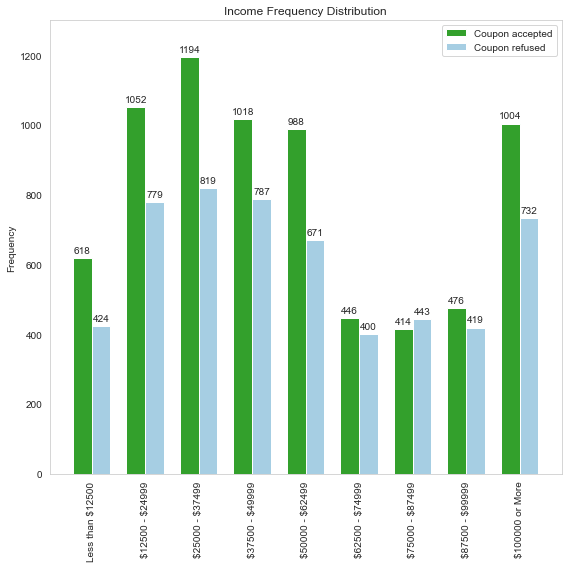

time: 180 ms (started: 2022-12-12 01:16:41 -08:00)


In [191]:
#income multiple bar plot
label_list = df_income_frequency_income_rank.loc[df_income_frequency_income_rank.loc[:, 'Y'] == 1, 'income'].to_list()
coupon_accepted_frequency_list = df_income_frequency_income_rank.loc[df_income_frequency_income_rank.loc[:, 'Y'] == 1, 'frequency']
coupon_refused_frequency_list = df_income_frequency_income_rank.loc[df_income_frequency_income_rank.loc[:, 'Y'] == 0, 'frequency']

x = np.arange(len(label_list))
bar_width = 0.35

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
rects1 = ax.bar(x - bar_width/2, coupon_accepted_frequency_list, bar_width, label='Coupon accepted', color=color_list[3])
rects2 = ax.bar(x + bar_width/2, coupon_refused_frequency_list, bar_width, label='Coupon refused', color=color_list[0])

ax.set_ylim([0, 1300])
ax.set_ylabel('Frequency',)
ax.set_title('Income Frequency Distribution')
ax.set_xticks(x, label_list, rotation=90)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

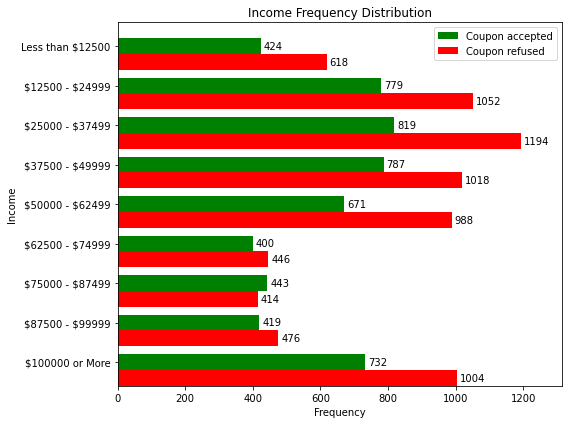

time: 156 ms (started: 2022-12-12 01:16:03 -08:00)


In [29]:
column_name = 'income'
value_order_list = ['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499', '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',  '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More',]
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_refused_coupon_accepted = icr.get_feature_target_frequency_data_frame(df, feature_column_name='income')

#sort by value order list
df_income_coupon_refused_coupon_accepted = icr.sort_data_frame(df=df_income_coupon_refused_coupon_accepted, column_name=column_name, value_order_list=value_order_list, ascending_true_false=False).drop(columns=['income_rank'])


def plot_horizontal_bar_graph(df, column_name):

    #initialize variables
    column_name_unique_value_count = df.loc[:, column_name].drop_duplicates().shape[0]
    
    y_upper_limit = df.loc[:, ['coupon accepted', 'coupon refused']].to_numpy().max() * 1.1
    
    index_array = np.arange(column_name_unique_value_count)

    bar_width = 0.4

    #setup subplot
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
    
    #setup horizontal bar plots
    rects1 = ax.barh(index_array + bar_width, df.loc[:, 'coupon refused'], bar_width, color='green', label='Coupon accepted')
    rects2 = ax.barh(index_array, df.loc[:, 'coupon accepted'], bar_width, color='red', label='Coupon refused')

    #setup x and y axis
    ax.set(title='Income Frequency Distribution', 
           ylabel='Income', yticks=index_array + bar_width, yticklabels=df.loc[:, 'income'], ylim=[2*bar_width - 1, column_name_unique_value_count],
           xlabel='Frequency', xlim=[0, y_upper_limit],)
    
    ax.legend()
    
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)


    fig.tight_layout()

    plt.show()

plot_horizontal_bar_graph(df=df_income_coupon_refused_coupon_accepted, column_name=column_name, )


In [30]:
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(1.05*rect.get_width(), rect.get_y()+0.5*rect.get_height(), '%d' % int(width), ha='center', va='center')
        


time: 637 µs (started: 2022-12-12 01:16:03 -08:00)


In [31]:
# column_name = 'income'
# value_order_list = ['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499', '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',  '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More',]
# color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

# y_upper_limit = df_income_coupon_refused_coupon_accepted.loc[:, ['coupon accepted', 'coupon refused']].to_numpy().max() * 1.1


# #get column name, coupon accepted (frequency), coupon refused (frequency)
# df_income_coupon_refused_coupon_accepted = icr.get_feature_target_frequency_data_frame(df, feature_column_name='income')

# #sort by value order list
# df_income_coupon_refused_coupon_accepted = icr.sort_data_frame(df=df_income_coupon_refused_coupon_accepted, column_name=column_name, value_order_list=value_order_list, ascending_true_false=False).drop(columns=['income_rank'])


# #plot horizontal bar graph
# index_array = np.arange(df_income_coupon_refused_coupon_accepted.shape[0])
# bar_width = 0.4

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
# rects1 = ax.barh(index_array + bar_width, df_income_coupon_refused_coupon_accepted.loc[:, 'coupon refused'], bar_width, color='green', label='coupon accepted')
# rects2 = ax.barh(index_array, df_income_coupon_refused_coupon_accepted.loc[:, 'coupon accepted'], bar_width, color='red', label='coupon refused')


# ax.set(yticks=index_array + bar_width, yticklabels=df_income_coupon_refused_coupon_accepted.loc[:, 'income'], ylim=[2*bar_width - 1, df_income_coupon_refused_coupon_accepted.shape[0]])
# ax.legend()

# ax.set_title('Income Frequency Distribution')
# ax.set_ylabel('Income',)
# ax.set_xlabel('Frequency',)

# ax.set_xlim([0, y_upper_limit])
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)


# fig.tight_layout()

# plt.show()




time: 1.17 ms (started: 2022-12-12 01:16:03 -08:00)


In [32]:
df_income_coupon_refused_coupon_accepted.loc[:, ['coupon accepted', 'coupon refused']].to_numpy().max() * 1.1

1313.4

time: 2.31 ms (started: 2022-12-12 01:16:03 -08:00)


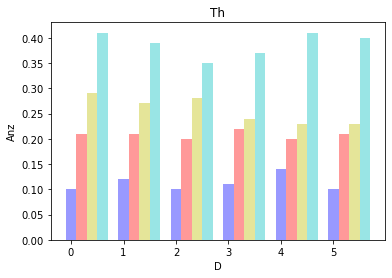

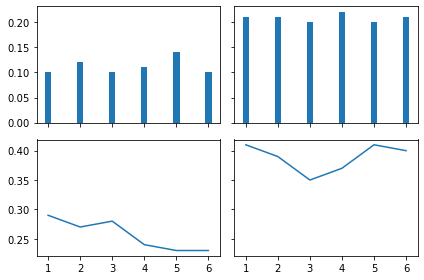

time: 266 ms (started: 2022-12-12 01:16:03 -08:00)


In [33]:
#Every feature is investigated using either histograms, bi-plots, or other visual and numeric means.


n= 6

m1 = (0.10,0.12,0.10,0.11,0.14,0.10)
m2=(0.21,0.21,0.20,0.22,0.20,0.21)
m3=(0.29,0.27,0.28,0.24,0.23,0.23)
m4=(0.41,0.39,0.35,0.37,0.41,0.40)
x=[1,2,3,4,5,6]

fig, ax = plt.subplots()

index = np.arange(n)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}
r1 = ax.bar(index, m1, bar_width, alpha=opacity, color='b', error_kw=error_config)

r2 = ax.bar(index + bar_width, m2, bar_width, alpha=opacity, color='r', error_kw=error_config)

r3 = ax.bar(index + bar_width + bar_width, m3, bar_width, alpha=opacity, color='y', error_kw=error_config)
r4 = ax.bar(index + bar_width + bar_width + bar_width, m4, bar_width, alpha=opacity, color='c', error_kw=error_config)                 

plt.xlabel('D')
plt.ylabel('Anz')
plt.title('Th')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ax1.bar(x,m1, 0.2)# % thickness=0.2
ax2.bar(x,m2, 0.2)
ax3.plot(x,m3)
ax4.plot(x,m4)

plt.tight_layout()
plt.show()


In [34]:
#what are we predicting and what are the most important ways for segmenting what we are predicting?? 
#for example, we are predicting "coupon acceptance" and want to segment by coupon type. do we know acceptance type, i.e. use it immediately or use it later??? (no).

#what are the most important features for segmenting our predictions as categories???

#in the results we could segment predictions by 

time: 551 µs (started: 2022-12-12 01:16:03 -08:00)


In [35]:
#get plots for all the features


time: 428 µs (started: 2022-12-12 01:16:03 -08:00)


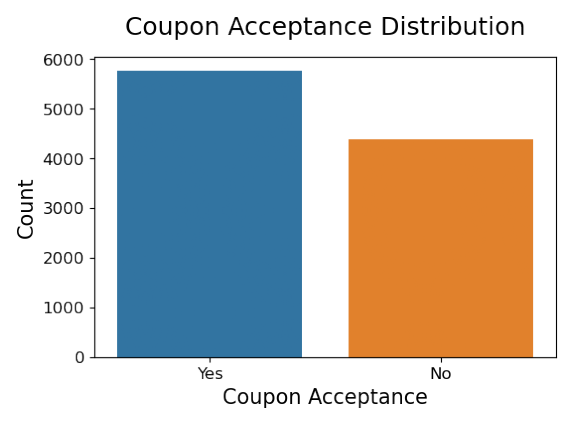

time: 69.7 ms (started: 2022-12-12 01:16:03 -08:00)


In [36]:
dpi=100
figure_filename = '../reports/figures/figure_target_variable_bar_plot_v3_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(10, 8))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    #get Y_train data
    _, _, Y_train_plot, _ = train_test_split(df.drop(columns=['Y']), df.loc[:, 'Y'], test_size=.2, random_state=200)

    #get Y_train coupon accepted and not accepted count
    df_target_plot = Y_train_plot.replace({0:'No', 1:'Yes'}).value_counts().to_frame().reset_index().rename(columns={'index':'accepted_not_accepted','Y':'count'})

    axes_object = sns.barplot(data=df_target_plot, x='accepted_not_accepted', y='count')
    axes_object.set_title('Coupon Acceptance Distribution', fontdict={'fontsize':18}, pad=16)
    #axes_object.set(xlabel='Coupon Acceptance', ylabel='Count')
    plt.xlabel('Coupon Acceptance', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.tick_params(labelsize=12)



    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)
    
plt.show()

In [37]:
#take top features and check for statistical significant between them by response, i.e. did accept or did not accept coupon.

top_feature = 'expiration_category_representative_numeric_encoding'

df_expiration_category_representative_numeric_encoding_Y_coupon_not_accepted = df.loc[df.loc[:, 'Y'] == 0, [top_feature] + ['Y']]
df_expiration_category_representative_numeric_encoding_Y_coupon_accepted = df.loc[df.loc[:, 'Y'] == 1, [top_feature] + ['Y']]

time: 9.82 ms (started: 2022-12-12 01:16:03 -08:00)


In [38]:
#Proportion Hypothesis Tests for Binary Data

#https://statisticsbyjim.com/hypothesis-testing/comparing-hypothesis-tests-data-types/

#2 Proportions test to compare two samples

#1 Proportion test example: comparison to a target

time: 513 µs (started: 2022-12-12 01:16:03 -08:00)


In [39]:
df_expiration_category_representative_numeric_encoding_Y_coupon_not_accepted.value_counts()

expiration_category_representative_numeric_encoding  Y
2                                                    0    2819
24                                                   0    2655
dtype: int64

time: 3.26 ms (started: 2022-12-12 01:16:03 -08:00)


In [40]:
df_expiration_category_representative_numeric_encoding_Y_coupon_accepted.value_counts()

expiration_category_representative_numeric_encoding  Y
24                                                   1    4436
2                                                    1    2774
dtype: int64

time: 3.39 ms (started: 2022-12-12 01:16:03 -08:00)


In [41]:
4436 / (4436 + 2774)

0.615256588072122

time: 1.34 ms (started: 2022-12-12 01:16:03 -08:00)


In [42]:
#of scenarios where the the coupon is accepted, 61.5% of the time, it's a 24hours til expiration 

time: 370 µs (started: 2022-12-12 01:16:03 -08:00)


<BarContainer object of 5 artists>

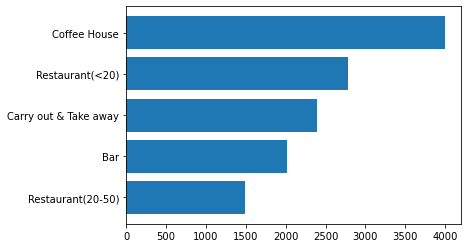

time: 61.9 ms (started: 2022-12-12 01:16:03 -08:00)


In [43]:
df_coupon_venue_type_count = df.loc[:, 'coupon_venue_type'].value_counts(ascending=True)

plt.barh(y=df_coupon_venue_type_count.index, width=df_coupon_venue_type_count.values)


In [44]:
df_Y_coupon_venue_type_count = df.groupby(['Y', 'coupon_venue_type']).count().iloc[:, 0].reset_index().rename(columns={'destination':'coupon_venue_type_count'})
df_Y_coupon_venue_type_count


Y      coupon_venue_type  coupon_venue_type_count
0  0                    Bar                     1190
1  0  Carry out & Take away                      633
2  0           Coffee House                     2001
3  0      Restaurant(20-50)                      834
4  0        Restaurant(<20)                      816
5  1                    Bar                      827
6  1  Carry out & Take away                     1760
7  1           Coffee House                     1995
8  1      Restaurant(20-50)                      658
9  1        Restaurant(<20)                     1970

time: 31.6 ms (started: 2022-12-12 01:16:03 -08:00)


In [45]:
df_coupon_venue_type_refused_accepted_coupon_count = \
df_Y_coupon_venue_type_count.pivot(index='coupon_venue_type', columns='Y', values='coupon_venue_type_count').rename(columns={0:'Refused Coupon', 1:'Accepted Coupon'}).reset_index()

df_coupon_venue_type_refused_accepted_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count.loc[:, ['coupon_venue_type', 'Accepted Coupon', 'Refused Coupon']]

df_coupon_venue_type_refused_accepted_coupon_count

Y      coupon_venue_type  Accepted Coupon  Refused Coupon
0                    Bar              827            1190
1  Carry out & Take away             1760             633
2           Coffee House             1995            2001
3      Restaurant(20-50)              658             834
4        Restaurant(<20)             1970             816

time: 7.33 ms (started: 2022-12-12 01:16:03 -08:00)


In [46]:
# #order the coupon venue type by accepted coupon percentage
# coupon_venue_type_list = ['Carry out & Take away', 'Restaurant(<20)', 'Coffee House', 'Restaurant(20-50)', 'Bar']
# coupon_venue_type_index_dictionary = dict(zip(coupon_venue_type_list, range(len(coupon_venue_type_list))))
# df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'coupon_venue_type_rank'] = df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'coupon_venue_type'].map(coupon_venue_type_index_dictionary)
# df_coupon_venue_type_refused_accepted_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count.sort_values(['coupon_venue_type_rank', ], ascending=[True]).drop(columns='coupon_venue_type_rank')



# #get stacked bar plot of coupon venue type acceptance and refusal
# figure_filename = '../reports/figures/figure_bar_count_percentage_stacked_coupon_venue_accepted_refused_ordered_by_accepted_percentage_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'
# dpi=100

# icr.plot_bar_graph(df=df_coupon_venue_type_refused_accepted_coupon_count, 
#                x='coupon_venue_type', 
#                bar_category_list=['Refused Coupon', 'Accepted Coupon'], 
#                title='Coupon Venue Count and Percentage per Acceptance or Refusal', 
#                color=['#8c6bb1', '#41ab5d'], 
#                figsize=(12, 10),
#                figure_filename=figure_filename,
#                dpi=dpi)


time: 863 µs (started: 2022-12-12 01:16:03 -08:00)


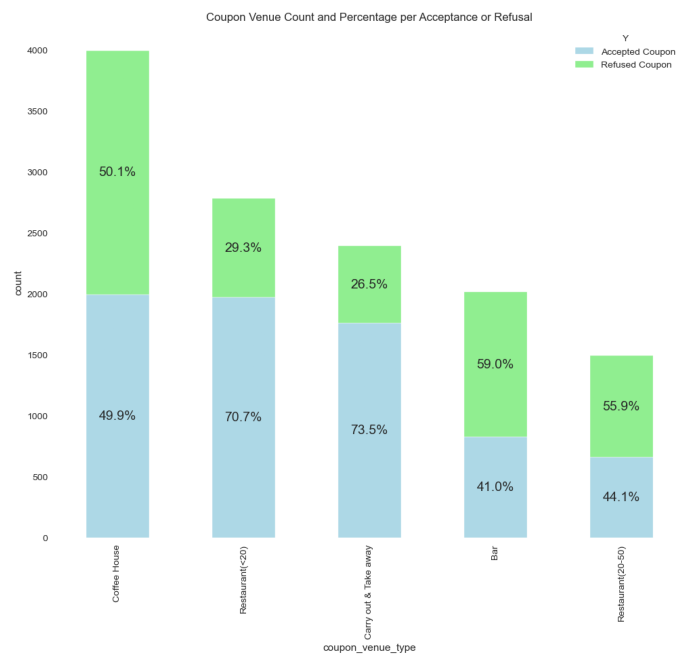

time: 144 ms (started: 2022-12-12 01:16:03 -08:00)


In [47]:
#order the coupon venue type by total count
coupon_venue_type_list = ['Coffee House', 'Restaurant(<20)','Carry out & Take away', 'Bar', 'Restaurant(20-50)', ]
coupon_venue_type_index_dictionary = dict(zip(coupon_venue_type_list, range(len(coupon_venue_type_list))))
df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'coupon_venue_type_rank'] = df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'coupon_venue_type'].map(coupon_venue_type_index_dictionary)
df_coupon_venue_type_refused_accepted_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count.sort_values(['coupon_venue_type_rank', ], ascending=[True]).drop(columns='coupon_venue_type_rank')




#get stacked bar plot of coupon venue type acceptance and refusal
dpi=100
figure_filename = '../reports/figures/figure_bar_count_percentage_stacked_coupon_venue_accepted_refused_ordered_by_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

color_list=['lightblue', 'lightgreen']
#color_list=['#8c6bb1', '#41ab5d']

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(15, 12))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    icr.plot_bar_graph(df=df_coupon_venue_type_refused_accepted_coupon_count, 
                   x='coupon_venue_type', 
                   bar_category_list=['Refused Coupon', 'Accepted Coupon'], 
                   title='Coupon Venue Count and Percentage per Acceptance or Refusal', 
                   color=color_list, 
                   figsize=(12, 10),
                   figure_filename=figure_filename,
                   dpi=dpi)

plt.show()

In [48]:
#get accepted coupon rate
df_coupon_venue_type_accepted_coupon_rate = df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'Accepted Coupon'] / (df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'Accepted Coupon'] + df_coupon_venue_type_refused_accepted_coupon_count.loc[:, 'Refused Coupon']) * 100
df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate = pd.concat([df_coupon_venue_type_refused_accepted_coupon_count, df_coupon_venue_type_accepted_coupon_rate.to_frame().rename(columns={0:'Accepted Coupon Rate'})], axis=1)
del df_coupon_venue_type_accepted_coupon_rate

df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate

coupon_venue_type  Accepted Coupon  Refused Coupon  \
2           Coffee House             1995            2001   
4        Restaurant(<20)             1970             816   
1  Carry out & Take away             1760             633   
0                    Bar              827            1190   
3      Restaurant(20-50)              658             834   

   Accepted Coupon Rate  
2             49.924925  
4             70.710696  
1             73.547848  
0             41.001487  
3             44.101877

time: 6.1 ms (started: 2022-12-12 01:16:03 -08:00)


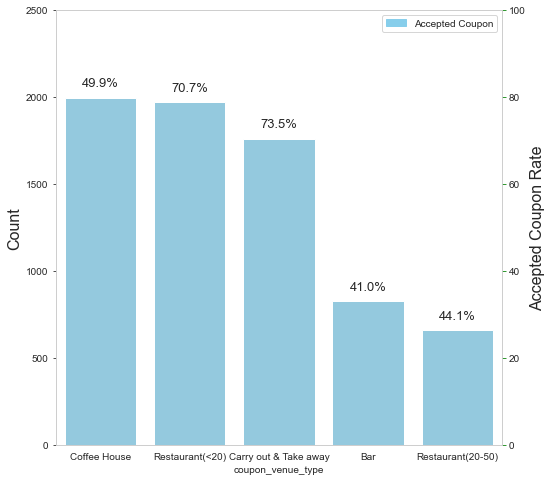

time: 143 ms (started: 2022-12-12 01:16:03 -08:00)


In [49]:
#^--- show just acceptance rate???

sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(8, 8))

color='skyblue'
bar2 = sns.barplot(x='coupon_venue_type', y='Accepted Coupon', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, estimator=sum, color=color)

ylabel_fontsize=16
ylabel_name='Count'
bar2.set_ylabel(ylabel_name, fontsize=ylabel_fontsize)

#add legend
patch_color=color#'r'
patch_label='Accepted Coupon'
bottom_bar = mpatches.Patch(color=patch_color, label=patch_label)
plt.legend(handles=[bottom_bar])


for patch, accepted_coupon_rate in zip(bar2.patches, df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Accepted Coupon Rate']):
    bar2.annotate(format(accepted_coupon_rate, '.1f') + '%', (patch.get_x() + patch.get_width() / 2., patch.get_height() + 150), ha='center', va='center', size=13, xytext=(0, -12), textcoords='offset points')

bar2.set_ylim([0, 2500])

ax2 = bar2.twinx()
color = 'green'

ax2.set_ylabel('Accepted Coupon Rate', fontsize=16)
#ax2 = sns.lineplot(x='coupon_venue_type', y='Accepted Coupon Rate', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax2.set_ylim([0, 100])


#https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

plt.show()

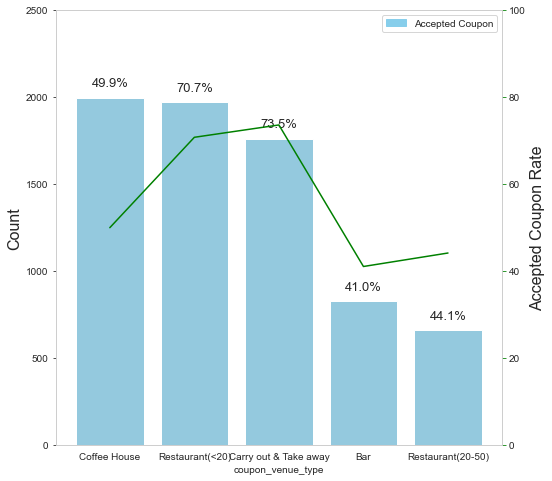

time: 143 ms (started: 2022-12-12 01:16:04 -08:00)


In [50]:
#^--- show just acceptance rate???

sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(8, 8))

color='skyblue'
bar2 = sns.barplot(x='coupon_venue_type', y='Accepted Coupon', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, estimator=sum, color=color)

ylabel_fontsize=16
ylabel_name='Count'
bar2.set_ylabel(ylabel_name, fontsize=ylabel_fontsize)

#add legend
patch_color=color#'r'
patch_label='Accepted Coupon'
bottom_bar = mpatches.Patch(color=patch_color, label=patch_label)
plt.legend(handles=[bottom_bar])

for patch, accepted_coupon_rate in zip(bar2.patches, df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Accepted Coupon Rate']):
    bar2.annotate(format(accepted_coupon_rate, '.1f') + '%', (patch.get_x() + patch.get_width() / 2., patch.get_height() + 150), ha='center', va='center', size=13, xytext=(0, -12), textcoords='offset points')

bar2.set_ylim([0, 2500]) 

ax2 = bar2.twinx()
color = 'green'

ax2.set_ylabel('Accepted Coupon Rate', fontsize=16)
ax2 = sns.lineplot(x='coupon_venue_type', y='Accepted Coupon Rate', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax2.set_ylim([0, 100])


#https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

plt.show()

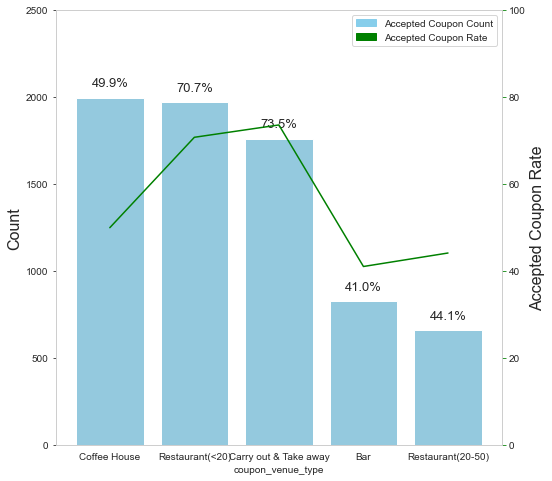

time: 145 ms (started: 2022-12-12 01:16:04 -08:00)


In [51]:
#^--- show just acceptance rate???

sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(8, 8))

color='skyblue'
bar2 = sns.barplot(x='coupon_venue_type', y='Accepted Coupon', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, estimator=sum, color=color)

ylabel_fontsize=16
ylabel_name='Count'
bar2.set_ylabel(ylabel_name, fontsize=ylabel_fontsize)

#add legend
patch_color=color#'r'
patch_label='Accepted Coupon Count'
bottom_bar = mpatches.Patch(color=patch_color, label=patch_label)
line_bar = mpatches.Patch(color='green', label='Accepted Coupon Rate')
plt.legend(handles=[bottom_bar, line_bar])

for patch, accepted_coupon_rate in zip(bar2.patches, df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Accepted Coupon Rate']):
    bar2.annotate(format(accepted_coupon_rate, '.1f') + '%', (patch.get_x() + patch.get_width() / 2., patch.get_height() + 150), ha='center', va='center', size=13, xytext=(0, -12), textcoords='offset points')

bar2.set_ylim([0, 2500]) 

ax2 = bar2.twinx()
color = 'green'

ax2.set_ylabel('Accepted Coupon Rate', fontsize=16)
ax2 = sns.lineplot(x='coupon_venue_type', y='Accepted Coupon Rate', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, sort=False, color=color, legend='full')
ax2.tick_params(axis='y', color=color)
ax2.set_ylim([0, 100])


#https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

plt.show()

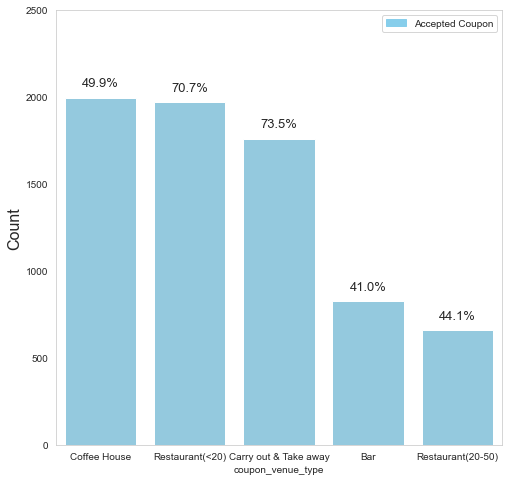

time: 94.3 ms (started: 2022-12-12 01:16:04 -08:00)


In [52]:
#^--- show just acceptance rate???

sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(8, 8))

color='skyblue'
bar2 = sns.barplot(x='coupon_venue_type', y='Accepted Coupon', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate, estimator=sum, color=color)

accepted_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Accepted Coupon'].to_list()
refused_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Refused Coupon'].to_list()

ylabel_fontsize=16
ylabel_name='Count'
bar2.set_ylabel(ylabel_name, fontsize=ylabel_fontsize)

#add legend
patch_color=color#'r'
patch_label='Accepted Coupon'
bottom_bar = mpatches.Patch(color=patch_color, label=patch_label)
plt.legend(handles=[bottom_bar])

for patch, accepted_coupon_rate in zip(bar2.patches, df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Accepted Coupon Rate']):
    bar2.annotate(format(accepted_coupon_rate, '.1f') + '%', (patch.get_x() + patch.get_width() / 2., patch.get_height() + 150), ha='center', va='center', size=13, xytext=(0, -12), textcoords='offset points')

bar2.set_ylim([0, 2500]) 


#https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

plt.show()

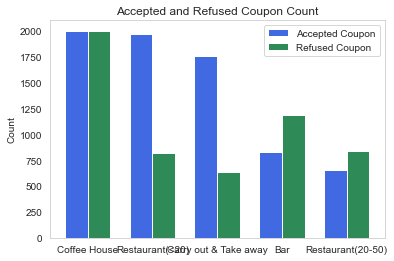

time: 86.1 ms (started: 2022-12-12 01:16:04 -08:00)


In [53]:
number_of_indexes = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.shape[0]

index = np.arange(number_of_indexes)
width = 0.35

accepted_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Accepted Coupon'].to_list()
refused_coupon_count = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'Refused Coupon'].to_list()
x_tick_labels = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[:, 'coupon_venue_type'].to_list()

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(index, accepted_coupon_count, width, color='royalblue')
rects2 = ax.bar(index+width, refused_coupon_count, width, color='seagreen')


ax.set_ylabel('Count')
ax.set_title('Accepted and Refused Coupon Count')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(x_tick_labels)

ax.legend((rects1[0], rects2[0]), ('Accepted Coupon', 'Refused Coupon'))


plt.show()

In [54]:
#^---side by side accepted count refusal count bar graph???


#why is the a large count for some coup venue types and not others?

#if we do not know why, then what can we conclude??

#what do we know about the existing coupon market????



time: 404 µs (started: 2022-12-12 01:16:04 -08:00)


### Bar Plot Coupon Accepted Rate

### Initialize Variables

In [55]:
index_name_list = [1, 4, 2, 3, 0]
index_name_list.reverse()
index_name_list_reversed = index_name_list.copy()
index_name_list.reverse()

index_name_list_reversed

[0, 3, 2, 4, 1]

time: 1.58 ms (started: 2022-12-12 01:16:04 -08:00)


In [56]:
df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate.loc[index_name_list,:]
df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered


coupon_venue_type  Accepted Coupon  Refused Coupon  \
1  Carry out & Take away             1760             633   
4        Restaurant(<20)             1970             816   
2           Coffee House             1995            2001   
3      Restaurant(20-50)              658             834   
0                    Bar              827            1190   

   Accepted Coupon Rate  
1             73.547848  
4             70.710696  
2             49.924925  
3             44.101877  
0             41.001487

time: 4.51 ms (started: 2022-12-12 01:16:04 -08:00)


In [57]:
df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_reverse_ordered = df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered.loc[index_name_list_reversed,:]
df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_reverse_ordered


coupon_venue_type  Accepted Coupon  Refused Coupon  \
0                    Bar              827            1190   
3      Restaurant(20-50)              658             834   
2           Coffee House             1995            2001   
4        Restaurant(<20)             1970             816   
1  Carry out & Take away             1760             633   

   Accepted Coupon Rate  
0             41.001487  
3             44.101877  
2             49.924925  
4             70.710696  
1             73.547848

time: 4.12 ms (started: 2022-12-12 01:16:04 -08:00)


### Coupon Acceptance Rate Per Coupon Venue

Text(0, 0.5, 'Coupon Venue Type')

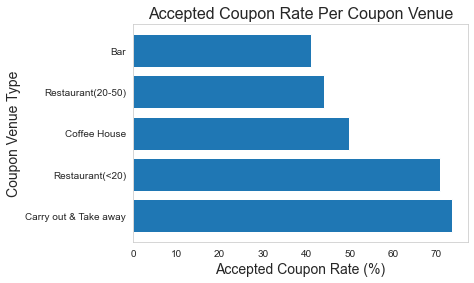

time: 90.9 ms (started: 2022-12-12 01:16:04 -08:00)


In [58]:
#law of large numbers for converting on true percentage???

plt.barh(y=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered.loc[:, 'coupon_venue_type'], width=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered.loc[:, 'Accepted Coupon Rate'])
plt.title('Accepted Coupon Rate Per Coupon Venue', fontsize=16)
plt.xlabel('Accepted Coupon Rate (%)', fontsize=14)
plt.ylabel('Coupon Venue Type', fontsize=14)


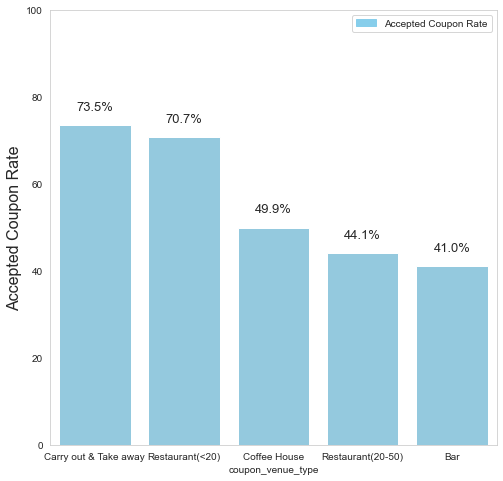

time: 92 ms (started: 2022-12-12 01:16:04 -08:00)


In [59]:
#^--- show just acceptance rate???

sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(8, 8))

color='skyblue'
bar2 = sns.barplot(x='coupon_venue_type', y='Accepted Coupon Rate', data=df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered, estimator=sum, color=color)

ylabel_fontsize=16
ylabel_name='Accepted Coupon Rate'
bar2.set_ylabel(ylabel_name, fontsize=ylabel_fontsize)

#add legend
patch_color=color#'r'
patch_label='Accepted Coupon Rate'
bottom_bar = mpatches.Patch(color=patch_color, label=patch_label)
plt.legend(handles=[bottom_bar])


for patch, accepted_coupon_rate in zip(bar2.patches, df_coupon_venue_type_refused_accepted_coupon_count_accepted_coupon_rate_ordered.loc[:, 'Accepted Coupon Rate']):
    bar2.annotate(format(accepted_coupon_rate, '.1f') + '%', (patch.get_x() + patch.get_width() / 2., patch.get_height() + 6.9), ha='center', va='center', size=13, xytext=(0, -12), textcoords='offset points')

bar2.set_ylim([0, 100])


#https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

plt.show()

In [60]:
#bar visit frequency



time: 428 µs (started: 2022-12-12 01:16:04 -08:00)


In [61]:
#education


time: 423 µs (started: 2022-12-12 01:16:04 -08:00)


In [62]:
#%autoreload 1
%aimport in_vehicle_coupon_recommendation 

#%pdb
1
#%pdb 0

#%debug

1

time: 1.53 ms (started: 2022-12-12 01:16:04 -08:00)


In [63]:
#https://www.python-graph-gallery.com/donut-plot/

#donut plots

time: 535 µs (started: 2022-12-12 01:16:04 -08:00)


In [64]:
import matplotlib

cmap = matplotlib.cm.get_cmap('Spectral')

rgba = cmap(0.5)
print(rgba)

(0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0)
time: 2.06 ms (started: 2022-12-12 01:16:04 -08:00)


### Initialize Plot Variables

In [65]:
title_fontsize=16
dpi=100
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
#color_list = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999']
#color_list =  ['red', 'green', 'blue', 'skyblue', 'yellow', 'purple', 'orange', 'pink', 'yellowgreen']
circle_color='white'


time: 626 µs (started: 2022-12-12 01:16:04 -08:00)


### Income Donut Plot

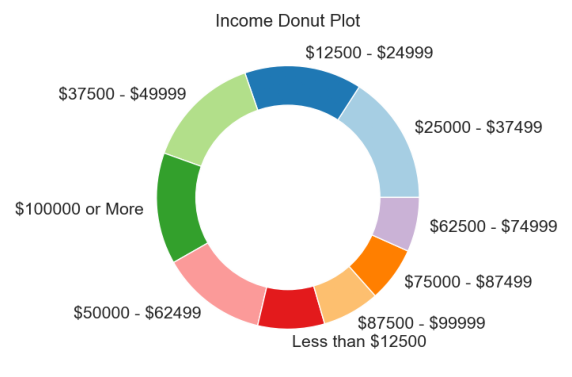

time: 93.7 ms (started: 2022-12-12 01:16:04 -08:00)


In [66]:
column_name='income'
title = 'Income Donut Plot'
figure_filename = '../reports/figures/figure_donut_plot_' + column_name + '_value_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

name_list = ['\$25000 - \$37499', '\$12500 - \$24999', '\$37500 - \$49999', '\$100000 or More', '\$50000 - \$62499', 'Less than \$12500', '\$87500 - \$99999', '\$75000 - \$87499', '\$62500 - \$74999']
size_list = [2013, 1831, 1805, 1736, 1659, 1042,  895,  857,  846]

icr.donut_plot(name_list, size_list, title=title, title_fontsize=title_fontsize, figure_filename=figure_filename, dpi=dpi, color_list=color_list, circle_color=circle_color)



### Age Donut Plot

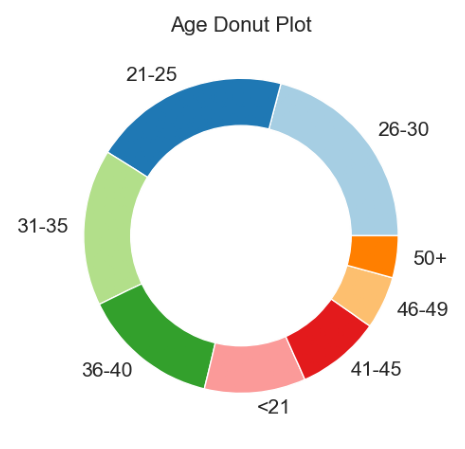

time: 73.7 ms (started: 2022-12-12 01:16:04 -08:00)


In [67]:
column_name = 'age'
title = 'Age Donut Plot'

figure_filename = '../reports/figures/figure_' + column_name +'_plot_income_value_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

name_list = ['26-30', '21-25', '31-35', '36-40', '<21', '41-45', '46-49', '50+']
size_list = [2653, 2559, 2039, 1788, 1319, 1093,  686,  547]

icr.donut_plot(name_list, size_list, title=title, title_fontsize=title_fontsize, figure_filename=figure_filename, dpi=dpi, color_list=color_list, circle_color=circle_color)



### Monthly Coffee House Visit Frequency

In [68]:
df.loc[:, 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding'].value_counts().values

array([3385, 3225, 2962, 1784, 1111,  217])

time: 2.64 ms (started: 2022-12-12 01:16:05 -08:00)


In [69]:
coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_dencoding = {value : key for key, value in coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding['CoffeeHouse'].items()}
pdc(coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_dencoding)

6


{1: 'never', 2: '<1', 3: '1-3', 4: '4-8', 5: '>8', 0: 'no response'}

time: 2.13 ms (started: 2022-12-12 01:16:05 -08:00)


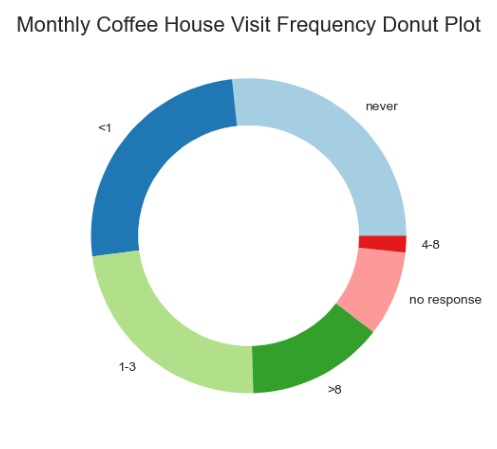

time: 81.6 ms (started: 2022-12-12 01:16:05 -08:00)


In [70]:
column_name='monthly_coffee_house_visit_frequency'
title = 'Monthly Coffee House Visit Frequency Donut Plot'
#title = 'Yes Response: Monthly Coffee House Visit Frequency Donut Plot'

figure_filename = '../reports/figures/figure_donut_plot_' + column_name + '_value_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

name_list = ['never', '<1', '1-3', '>8', 'no response', '4-8']
size_list = [3385, 3225, 2962, 1784, 1111,  217]

icr.donut_plot(name_list, size_list, title=title, title_fontsize=title_fontsize, figure_filename=figure_filename, dpi=dpi, color_list=color_list, circle_color=circle_color)



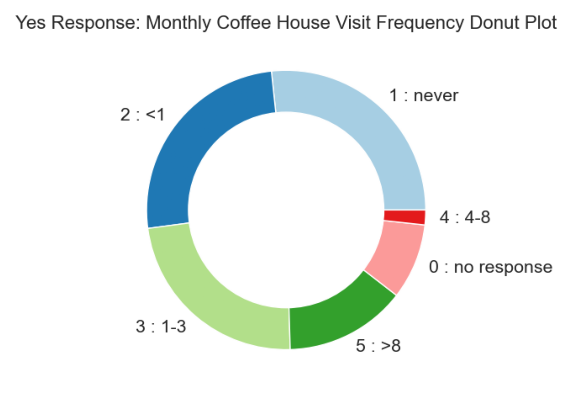

time: 87.6 ms (started: 2022-12-12 01:16:05 -08:00)


In [71]:
column_name='monthly_coffee_house_visit_frequency_encoding'
title = 'Monthly Coffee House Visit Frequency Donut Plot'
#title = 'Yes Response: Monthly Coffee House Visit Frequency Donut Plot'

figure_filename = '../reports/figures/figure_donut_plot_' + column_name + '_value_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

name_list = ['1 : never', '2 : <1', '3 : 1-3', '5 : >8', '0 : no response', '4 : 4-8']
size_list = [3385, 3225, 2962, 1784, 1111,  217]

icr.donut_plot(name_list, size_list, title=title, title_fontsize=title_fontsize, figure_filename=figure_filename, dpi=dpi, color_list=color_list, circle_color=circle_color)



In [72]:
df_Y_coupon_venue_type_proportion = df.groupby(['Y', 'coupon_venue_type']).agg({'coupon_venue_type': 'count'}).groupby(level=1).apply(lambda x: x / float(x.sum()))
df_Y_coupon_venue_type_proportion = df_Y_coupon_venue_type_proportion.rename(columns={'coupon_venue_type':'coupon_venue_type_proportion'}).reset_index()
df_Y_coupon_venue_type_proportion.sort_values(['Y', 'coupon_venue_type_proportion', 'coupon_venue_type'], ascending=False)


Y      coupon_venue_type  coupon_venue_type_proportion
6  1  Carry out & Take away                      0.735478
9  1        Restaurant(<20)                      0.707107
7  1           Coffee House                      0.499249
8  1      Restaurant(20-50)                      0.441019
5  1                    Bar                      0.410015
0  0                    Bar                      0.589985
3  0      Restaurant(20-50)                      0.558981
2  0           Coffee House                      0.500751
4  0        Restaurant(<20)                      0.292893
1  0  Carry out & Take away                      0.264522

time: 12.4 ms (started: 2022-12-12 01:16:05 -08:00)


In [73]:
for thing in df_Y_coupon_venue_type_proportion.columns:
    print(thing)

Y
coupon_venue_type
coupon_venue_type_proportion
time: 748 µs (started: 2022-12-12 01:16:05 -08:00)


In [74]:
for thing in df_Y_coupon_venue_type_proportion:
    print(thing)

Y
coupon_venue_type
coupon_venue_type_proportion
time: 789 µs (started: 2022-12-12 01:16:05 -08:00)


In [75]:
df_Y_coupon_venue_type_proportion.loc[df_Y_coupon_venue_type_proportion.loc[:, 'Y'] == 0, :]

Y      coupon_venue_type  coupon_venue_type_proportion
0  0                    Bar                      0.589985
1  0  Carry out & Take away                      0.264522
2  0           Coffee House                      0.500751
3  0      Restaurant(20-50)                      0.558981
4  0        Restaurant(<20)                      0.292893

time: 3.49 ms (started: 2022-12-12 01:16:05 -08:00)


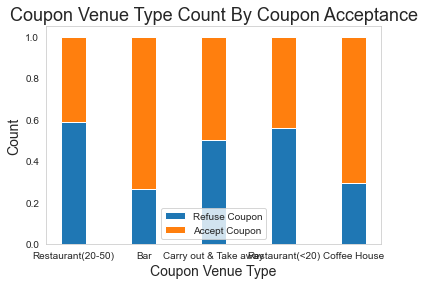

time: 89.9 ms (started: 2022-12-12 01:16:05 -08:00)


In [76]:
#stacked bar with coupon acceptance rate
import matplotlib.pyplot as plt


labels = df_coupon_venue_type_count.index.to_list()
refuse_coupon = df_Y_coupon_venue_type_proportion.loc[df_Y_coupon_venue_type_proportion.loc[:, 'Y']==0, 'coupon_venue_type_proportion'].to_list()
accept_coupon = df_Y_coupon_venue_type_proportion.loc[df_Y_coupon_venue_type_proportion.loc[:, 'Y']==1, 'coupon_venue_type_proportion'].to_list()
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, refuse_coupon, width, label='Refuse Coupon')
ax.bar(labels, accept_coupon, width, bottom=refuse_coupon, label='Accept Coupon')

ax.set_ylabel(ylabel='Count', fontsize=14)
ax.set_xlabel(xlabel='Coupon Venue Type', fontsize=14)
ax.set_title('Coupon Venue Type Count By Coupon Acceptance', fontsize=18)
ax.legend()

plt.show()

In [77]:
df_Y_coupon_venue_type_proportion

Y      coupon_venue_type  coupon_venue_type_proportion
0  0                    Bar                      0.589985
1  0  Carry out & Take away                      0.264522
2  0           Coffee House                      0.500751
3  0      Restaurant(20-50)                      0.558981
4  0        Restaurant(<20)                      0.292893
5  1                    Bar                      0.410015
6  1  Carry out & Take away                      0.735478
7  1           Coffee House                      0.499249
8  1      Restaurant(20-50)                      0.441019
9  1        Restaurant(<20)                      0.707107

time: 4.69 ms (started: 2022-12-12 01:16:05 -08:00)


In [78]:
df_Y_coupon_venue_type_proportion

Y      coupon_venue_type  coupon_venue_type_proportion
0  0                    Bar                      0.589985
1  0  Carry out & Take away                      0.264522
2  0           Coffee House                      0.500751
3  0      Restaurant(20-50)                      0.558981
4  0        Restaurant(<20)                      0.292893
5  1                    Bar                      0.410015
6  1  Carry out & Take away                      0.735478
7  1           Coffee House                      0.499249
8  1      Restaurant(20-50)                      0.441019
9  1        Restaurant(<20)                      0.707107

time: 3.85 ms (started: 2022-12-12 01:16:05 -08:00)


In [79]:
# Define the sorter
sorter = ['Carry out & Take away',
          'Restaurant(<20)',
          'Coffee House',
          'Restaurant(20-50)',
          'Bar']

# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter, range(len(sorter))))


df_Y_coupon_venue_type_proportion.loc[:, 'coupon_venue_type_rank'] = \
df_Y_coupon_venue_type_proportion.loc[:, 'coupon_venue_type'].map(sorterIndex)


df_Y_coupon_venue_type_proportion = df_Y_coupon_venue_type_proportion.sort_values(['Y', 'coupon_venue_type_rank', ], ascending=[True , True])

#df_Y_coupon_venue_type_proportion = df_Y_coupon_venue_type_proportion.drop('coupon_venue_type_rank', 1)

df_Y_coupon_venue_type_proportion

Y      coupon_venue_type  coupon_venue_type_proportion  \
1  0  Carry out & Take away                      0.264522   
4  0        Restaurant(<20)                      0.292893   
2  0           Coffee House                      0.500751   
3  0      Restaurant(20-50)                      0.558981   
0  0                    Bar                      0.589985   
6  1  Carry out & Take away                      0.735478   
9  1        Restaurant(<20)                      0.707107   
7  1           Coffee House                      0.499249   
8  1      Restaurant(20-50)                      0.441019   
5  1                    Bar                      0.410015   

   coupon_venue_type_rank  
1                       0  
4                       1  
2                       2  
3                       3  
0                       4  
6                       0  
9                       1  
7                       2  
8                       3  
5                       4

time: 5.84 ms (started: 2022-12-12 01:16:05 -08:00)


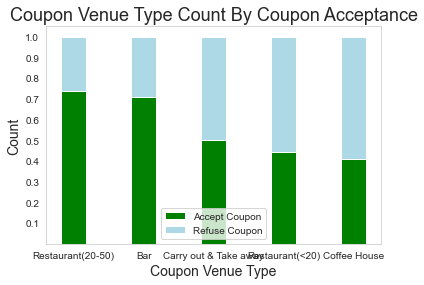

time: 91 ms (started: 2022-12-12 01:16:05 -08:00)


In [80]:
#stacked bar with coupon acceptance rate

labels = df_coupon_venue_type_count.index.to_list()
refuse_coupon = df_Y_coupon_venue_type_proportion.loc[df_Y_coupon_venue_type_proportion.loc[:, 'Y']==0, 'coupon_venue_type_proportion'].to_list()
accept_coupon = df_Y_coupon_venue_type_proportion.loc[df_Y_coupon_venue_type_proportion.loc[:, 'Y']==1, 'coupon_venue_type_proportion'].to_list()
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, accept_coupon, width, label='Accept Coupon', color='green')
ax.bar(labels, refuse_coupon, width, bottom=accept_coupon, label='Refuse Coupon', color='lightblue')

ax.set_ylabel(ylabel='Count', fontsize=14)
ax.set_yticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1,])
ax.set_xlabel(xlabel='Coupon Venue Type', fontsize=14)
ax.set_title('Coupon Venue Type Count By Coupon Acceptance', fontsize=18)
ax.legend()

plt.show()

In [81]:
#^--- add percentages

time: 397 µs (started: 2022-12-12 01:16:05 -08:00)


In [82]:
#analytics shows proportion of scenarios when a survey participant accepts vs denies a coupon


time: 476 µs (started: 2022-12-12 01:16:05 -08:00)


In [83]:
df_Y_coupon_accepted_coupon_venue_type = df.loc[df.loc[:, 'Y'] == 1, ['Y', 'coupon_venue_type']]
#p(df_Y_coupon_accepted_coupon_venue_type)

df_Y_coupon_denied_coupon_venue_type = df.loc[df.loc[:, 'Y'] == 0, ['Y', 'coupon_venue_type']]
p(df_Y_coupon_denied_coupon_venue_type)


(5474, 2)


Y  coupon_venue_type
1474   0                Bar
4567   0                Bar
4732   0    Restaurant(<20)
3122   0       Coffee House
7329   0                Bar
7769   0    Restaurant(<20)
11343  0  Restaurant(20-50)
9036   0    Restaurant(<20)
11050  0  Restaurant(20-50)
1818   0                Bar

time: 7.61 ms (started: 2022-12-12 01:16:05 -08:00)


In [84]:
df.groupby(['Y', 'coupon_venue_type']).count().iloc[:, 0].reset_index().rename(columns={'destination':'count'})


Y      coupon_venue_type  count
0  0                    Bar   1190
1  0  Carry out & Take away    633
2  0           Coffee House   2001
3  0      Restaurant(20-50)    834
4  0        Restaurant(<20)    816
5  1                    Bar    827
6  1  Carry out & Take away   1760
7  1           Coffee House   1995
8  1      Restaurant(20-50)    658
9  1        Restaurant(<20)   1970

time: 31 ms (started: 2022-12-12 01:16:05 -08:00)


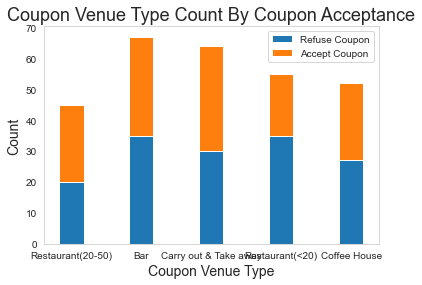

time: 84.4 ms (started: 2022-12-12 01:16:05 -08:00)


In [85]:
#stacked bar with coupon acceptance rate
import matplotlib.pyplot as plt


labels = df_coupon_venue_type_count.index.to_list()
refuse_coupon = [20, 35, 30, 35, 27]
accept_coupon = [25, 32, 34, 20, 25]
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, refuse_coupon, width, label='Refuse Coupon')
ax.bar(labels, accept_coupon, width, bottom=refuse_coupon, label='Accept Coupon')

ax.set_ylabel(ylabel='Count', fontsize=14)
ax.set_xlabel(xlabel='Coupon Venue Type', fontsize=14)
ax.set_title('Coupon Venue Type Count By Coupon Acceptance', fontsize=18)
ax.legend()

plt.show()

In [86]:
#five types of coupons:
#bars
#takeaway food restaurants
#coffee houses
#cheap restaurants (average expense below $20 per person)
#expensive restaurants (average expense between $20 to $50 per person)

df.loc[:, 'coupon_venue_type'].value_counts()


Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon_venue_type, dtype: int64

time: 3.16 ms (started: 2022-12-12 01:16:05 -08:00)


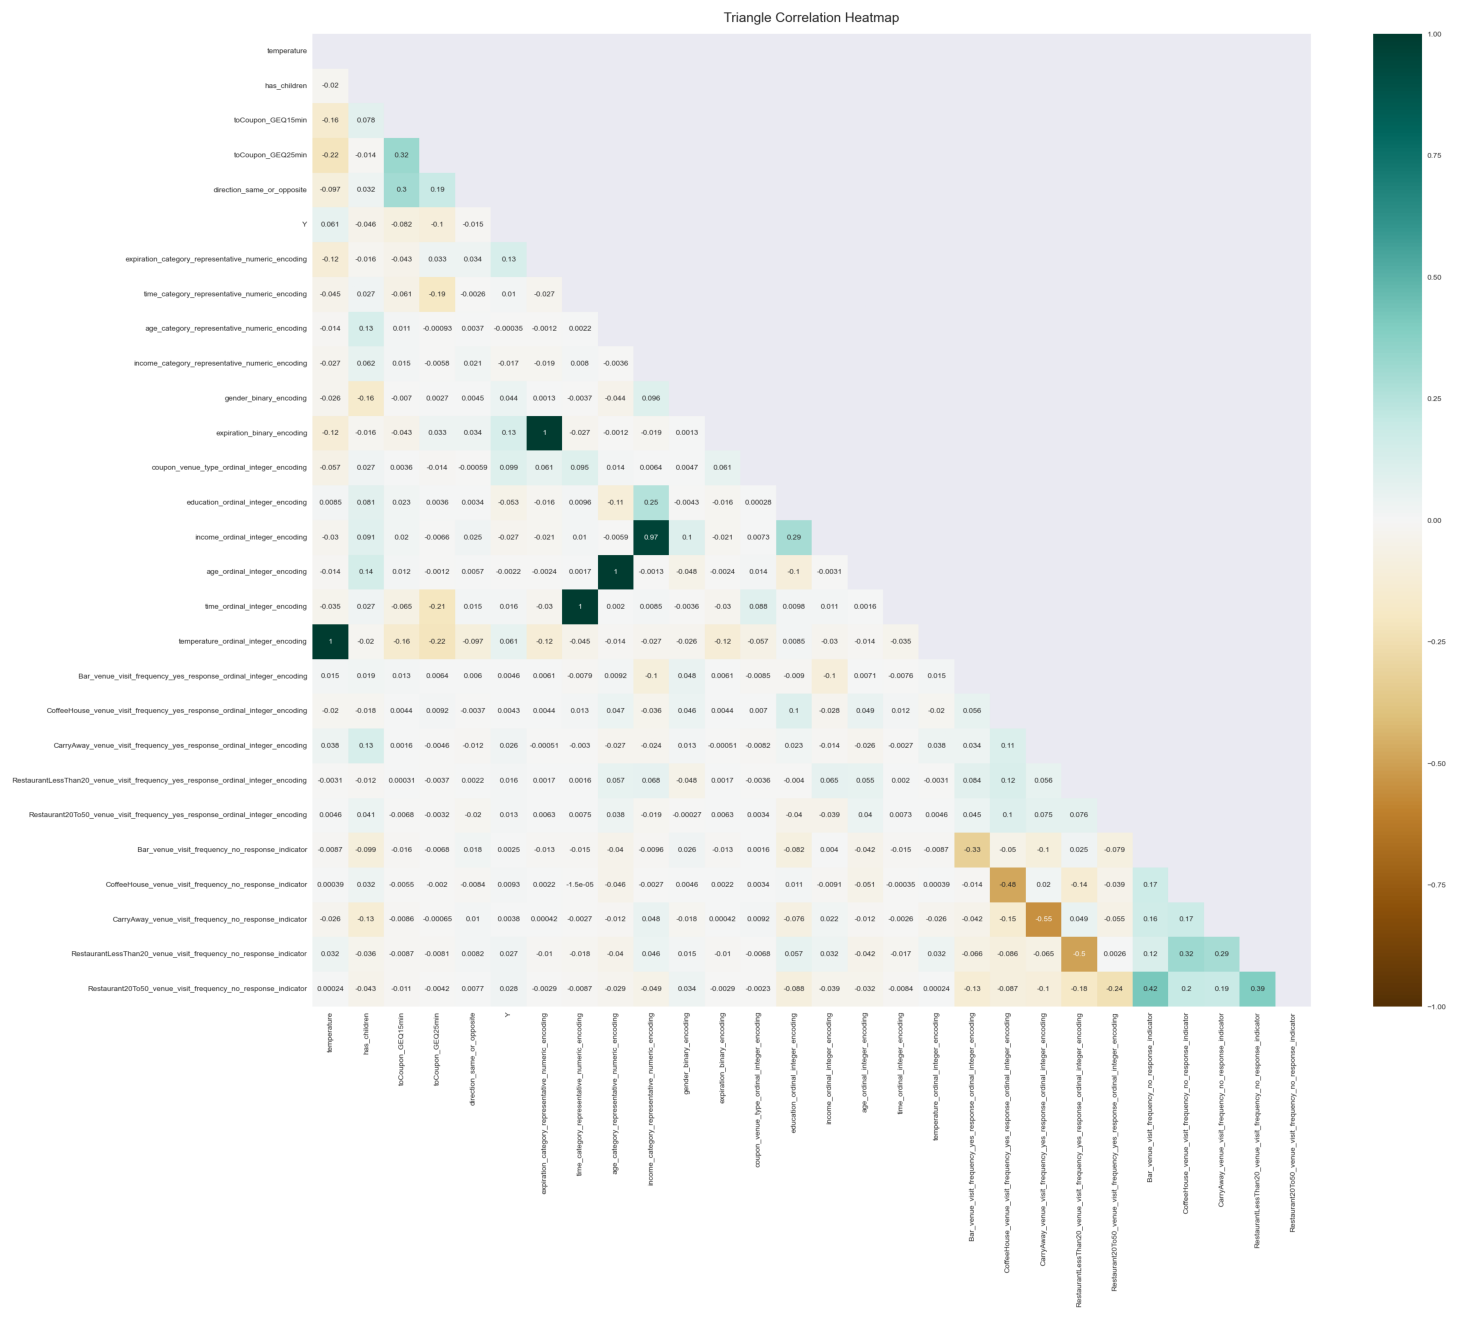

time: 716 ms (started: 2022-12-12 01:16:05 -08:00)


In [87]:
#correlation heatmap
dpi=100
figure_filename = '../reports/figures/figure_triangle_correlation_heatmap_random_forest_classifier_numerics_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)

if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(30, 24))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    plt.figure(figsize=(30, 24))
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()

In [88]:
#^-----fix runtime here.

time: 397 µs (started: 2022-12-12 01:16:06 -08:00)


In [89]:
#.11 correlation between coupon acceptance and reported CoffeeHouse venue visit frequency

#.099 correlation between venue coupon type and coupon accpetance

#.13 correlation between coupon expiraton and coupon acceptance

#.07 correaltio between reported expensive restaurant visit frequency and coupon acceptance

#.07 correlation between coupon acceptance and reported bar visit frequency 

#.061 correlation between temperature and coupon acceptance

#-.1 correlation between coupon acceptance and driver travel time to venue is greater than 25 minute

#-.082 correlation between coupon acceptance and driver travel time to venue is greater than 15 minute

#-.046 correlation between having children and accpeting coupon

time: 449 µs (started: 2022-12-12 01:16:06 -08:00)


In [90]:
dir()

['Audio',
 'ConfusionMatrixDisplay',
 'GradientBoostingClassifier',
 'GridSearchCV',
 'In',
 'LogisticRegression',
 'Out',
 'RandomForestClassifier',
 'StandardScaler',
 'StratifiedKFold',
 '_',
 '_10',
 '_11',
 '_12',
 '_13',
 '_15',
 '_16',
 '_17',
 '_18',
 '_24',
 '_25',
 '_27',
 '_32',
 '_39',
 '_40',
 '_41',
 '_43',
 '_44',
 '_45',
 '_48',
 '_55',
 '_56',
 '_57',
 '_58',
 '_62',
 '_68',
 '_69',
 '_72',
 '_75',
 '_77',
 '_78',
 '_79',
 '_8',
 '_83',
 '_84',
 '_86',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47'

time: 3.26 ms (started: 2022-12-12 01:16:06 -08:00)


In [91]:
# df_groups = pd.concat([data_frame_collection['X_train'].loc[:, 'coupon_venue_type_Bar'], data_frame_collection['Y_train'].loc[:, 'Y']], axis=1)
# p(df_groups)

time: 352 µs (started: 2022-12-12 01:16:06 -08:00)


In [92]:
# df_groups = pd.concat([data_frame_collection['X_train'].loc[:, 'coupon_venue_type_Bar'], data_frame_collection['Y_train'].loc[:, 'Y']], axis=1)
# p(df_groups)

time: 381 µs (started: 2022-12-12 01:16:06 -08:00)


In [93]:
#save preprocessed data frame
data_frame_version=filename_version
df_collection_filename='df_collection_train_test_v' + data_frame_version + '.pkl'


df_readback = icr.return_processed_collection_if_it_exists(filename=df_collection_filename)
if df_readback != None:
    df_collection = df_readback
else:
    df_collection = {}
    
    #split the data into train and test
    df_collection['X_train'], df_collection['X_test'], df_collection['Y_train'], df_collection['Y_test'] = \
    train_test_split(df.drop(columns=['Y']), df.loc[:, 'Y'], test_size=.2, random_state=200)
    
    #save preprocessed data frame collection
    df_collection = icr.save_and_return_collection(data_frame_collection=df_collection, filename=df_collection_filename)

p(df_collection['X_train'])

This file already exists
(10147, 45)


destination  passenger weather  temperature  time  \
8630   No Urgent Place  Friend(s)   Sunny           80   6PM   
2418   No Urgent Place  Friend(s)   Sunny           55   2PM   
10804  No Urgent Place      Alone   Rainy           55   2PM   
747    No Urgent Place  Friend(s)   Sunny           80   2PM   
7333   No Urgent Place  Friend(s)   Sunny           80   6PM   
10949  No Urgent Place     Kid(s)   Snowy           30   6PM   
11937  No Urgent Place      Alone   Rainy           55  10AM   
735               Home      Alone   Sunny           55   6PM   
67     No Urgent Place  Friend(s)   Sunny           80  10AM   
3251   No Urgent Place  Friend(s)   Sunny           80  10AM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
8630            Coffee House         1d  Female  21-25    Married partner   
2418            Coffee House         2h  Female  26-30             Single   
10804  Carry out & Take away         2h  Female  31-35             Single   
747             Coffee House         1d  Female  36-40    Married partner   
7333            Coffee House         1d    Male    <21  Unmarried partner   
10949                    Bar         1d  Female  31-35    Married partner   
11937                    Bar         1d  Female  31-35    Married partner   
735        Restaurant(20-50)         1d    Male  41-45             Single   
67              Coffee House         2h    Male  46-49    Married partner   
3251            Coffee House         2h  Female  26-30    Married partner   

       has_children                               education  \
8630              0                        Bachelors degree   
2418              0                        Bachelors degree   
10804             0  Graduate degree (Masters or Doctorate)   
747               0                Some college - no degree   
7333              1                Some college - no degree   
10949             1                        Bachelors degree   
11937             0                Some college - no degree   
735               0                Some college - no degree   
67                1                        Bachelors degree   
3251              1                Some college - no degree   

                                      occupation           income  \
8630                                  Unemployed  $87500 - $99999   
2418    Arts Design Entertainment Sports & Media  $12500 - $24999   
10804                                      Legal  $75000 - $87499   
747                           Healthcare Support  $25000 - $37499   
7333   Building & Grounds Cleaning & Maintenance  $25000 - $37499   
10949                                    Student  $37500 - $49999   
11937                    Computer & Mathematical  $100000 or More   
735                              Sales & Related  $37500 - $49999   
67                    Education&Training&Library  $75000 - $87499   
3251                                  Unemployed  $25000 - $37499   

               car          Bar CoffeeHouse    CarryAway RestaurantLessThan20  \
8630   no response           <1       never          4-8                never   
2418   no response           >8          >8           >8                   >8   
10804  no response  no response          >8           >8                   >8   
747    no response           <1          <1           >8                   >8   
7333   no response           <1       never           <1                   <1   
10949  no response          1-3       never  no response                   >8   
11937  no response        never       never  no response                   >8   
735    no response          1-3         1-3           >8                   <1   
67     no response        never          <1           <1                   <1   
3251   no response          1-3       never           <1                never   

      Restaurant20To50  toCoupon_GEQ15min  toCoupon_GEQ25min  \
8630             never                  0       

time: 24.1 ms (started: 2022-12-12 01:16:06 -08:00)


## Get Stratified Train Data Frame Collection Before Data Preprocesssing

In [94]:
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

stratified_fold_number_X_train_X_test_Y_train_Y_test_df_collection = {}


for index, (train_index, test_index) in enumerate(StratifiedKFold_5_splits.split(X=df_collection['X_train'], y=df_collection['Y_train'].to_frame())):
    print('fold ' + str(index) + " TRAIN:", train_index, "TEST:", test_index)
    stratified_fold_number_X_train_X_test_Y_train_Y_test_df_collection['fold ' + str(index)] = \
    {'X_train' : df_collection['X_train'].iloc[train_index, :], \
     'X_test' : df_collection['X_train'].iloc[test_index, :], \
     'Y_train' : df_collection['Y_train'].iloc[train_index], \
     'Y_test' : df_collection['Y_train'].iloc[test_index]}

#use .loc for selection by index label, .iloc for selection by index location

print()
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_df_collection['fold 0']['X_test'])



fold 0 TRAIN: [ 2028  2030  2031 ... 10144 10145 10146] TEST: [   0    1    2 ... 2027 2029 2032]
fold 1 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [2028 2030 2031 ... 4095 4101 4102]
fold 2 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [4009 4010 4012 ... 6131 6133 6135]
fold 3 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [6036 6037 6043 ... 8126 8127 8128]
fold 4 TRAIN: [   0    1    2 ... 8126 8127 8128] TEST: [ 8099  8105  8109 ... 10144 10145 10146]

(2030, 45)


destination  passenger weather  temperature  time  \
8630   No Urgent Place  Friend(s)   Sunny           80   6PM   
2418   No Urgent Place  Friend(s)   Sunny           55   2PM   
10804  No Urgent Place      Alone   Rainy           55   2PM   
747    No Urgent Place  Friend(s)   Sunny           80   2PM   
7333   No Urgent Place  Friend(s)   Sunny           80   6PM   
1460   No Urgent Place  Friend(s)   Sunny           80   2PM   
8449              Work      Alone   Snowy           30   7AM   
11224             Home      Alone   Rainy           55  10PM   
5085   No Urgent Place  Friend(s)   Sunny           80   2PM   
7156   No Urgent Place  Friend(s)   Sunny           80   2PM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
8630            Coffee House         1d  Female  21-25    Married partner   
2418            Coffee House         2h  Female  26-30             Single   
10804  Carry out & Take away         2h  Female  31-35             Single   
747             Coffee House         1d  Female  36-40    Married partner   
7333            Coffee House         1d    Male    <21  Unmarried partner   
1460            Coffee House         2h    Male  46-49    Married partner   
8449       Restaurant(20-50)         1d    Male  41-45    Married partner   
11224           Coffee House         2h    Male    50+  Unmarried partner   
5085         Restaurant(<20)         2h    Male  26-30             Single   
7156       Restaurant(20-50)         2h    Male  31-35    Married partner   

       has_children                               education  \
8630              0                        Bachelors degree   
2418              0                        Bachelors degree   
10804             0  Graduate degree (Masters or Doctorate)   
747               0                Some college - no degree   
7333              1                Some college - no degree   
1460              1  Graduate degree (Masters or Doctorate)   
8449              1                       Associates degree   
11224             0                Some college - no degree   
5085              0                    High School Graduate   
7156              1                Some college - no degree   

                                      occupation           income  \
8630                                  Unemployed  $87500 - $99999   
2418    Arts Design Entertainment Sports & Media  $12500 - $24999   
10804                                      Legal  $75000 - $87499   
747                           Healthcare Support  $25000 - $37499   
7333   Building & Grounds Cleaning & Maintenance  $25000 - $37499   
1460                                  Management  $87500 - $99999   
8449                  Farming Fishing & Forestry  $25000 - $37499   
11224                                    Student  $25000 - $37499   
5085                                  Unemployed  $25000 - $37499   
7156                   Construction & Extraction  $37500 - $49999   

               car          Bar CoffeeHouse CarryAway RestaurantLessThan20  \
8630   no response           <1       never       4-8                never   
2418   no response           >8          >8        >8                   >8   
10804  no response  no response          >8        >8                   >8   
747    no response           <1          <1        >8                   >8   
7333   no response           <1       never        <1                   <1   
1460   no response        never          <1        <1                never   
8449   no response          1-3         1-3       1-3                   <1   
11224  no response          1-3         1-3        <1                never   
5085   no response        never          <1        >8                   <1   
7156   no response          1-3         1-3        >8                   >8   

      Restaurant20To50  toCoupon_GEQ15min  toCoupon_GEQ25min  \
8630             never                  0                  0   
2418             

time: 30.8 ms (started: 2022-12-12 01:16:06 -08:00)


In [95]:
data_frame_list = [stratified_fold_number_X_train_X_test_Y_train_Y_test_df_collection['fold ' + str(index)]['X_test'] for index in range(5)]

df_stratified_fold_number_X_test = pd.concat(data_frame_list)

p(df_stratified_fold_number_X_test)

(10147, 45)


destination  passenger weather  temperature  time  \
8630   No Urgent Place  Friend(s)   Sunny           80   6PM   
2418   No Urgent Place  Friend(s)   Sunny           55   2PM   
10804  No Urgent Place      Alone   Rainy           55   2PM   
747    No Urgent Place  Friend(s)   Sunny           80   2PM   
7333   No Urgent Place  Friend(s)   Sunny           80   6PM   
10949  No Urgent Place     Kid(s)   Snowy           30   6PM   
11937  No Urgent Place      Alone   Rainy           55  10AM   
735               Home      Alone   Sunny           55   6PM   
67     No Urgent Place  Friend(s)   Sunny           80  10AM   
3251   No Urgent Place  Friend(s)   Sunny           80  10AM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
8630            Coffee House         1d  Female  21-25    Married partner   
2418            Coffee House         2h  Female  26-30             Single   
10804  Carry out & Take away         2h  Female  31-35             Single   
747             Coffee House         1d  Female  36-40    Married partner   
7333            Coffee House         1d    Male    <21  Unmarried partner   
10949                    Bar         1d  Female  31-35    Married partner   
11937                    Bar         1d  Female  31-35    Married partner   
735        Restaurant(20-50)         1d    Male  41-45             Single   
67              Coffee House         2h    Male  46-49    Married partner   
3251            Coffee House         2h  Female  26-30    Married partner   

       has_children                               education  \
8630              0                        Bachelors degree   
2418              0                        Bachelors degree   
10804             0  Graduate degree (Masters or Doctorate)   
747               0                Some college - no degree   
7333              1                Some college - no degree   
10949             1                        Bachelors degree   
11937             0                Some college - no degree   
735               0                Some college - no degree   
67                1                        Bachelors degree   
3251              1                Some college - no degree   

                                      occupation           income  \
8630                                  Unemployed  $87500 - $99999   
2418    Arts Design Entertainment Sports & Media  $12500 - $24999   
10804                                      Legal  $75000 - $87499   
747                           Healthcare Support  $25000 - $37499   
7333   Building & Grounds Cleaning & Maintenance  $25000 - $37499   
10949                                    Student  $37500 - $49999   
11937                    Computer & Mathematical  $100000 or More   
735                              Sales & Related  $37500 - $49999   
67                    Education&Training&Library  $75000 - $87499   
3251                                  Unemployed  $25000 - $37499   

               car          Bar CoffeeHouse    CarryAway RestaurantLessThan20  \
8630   no response           <1       never          4-8                never   
2418   no response           >8          >8           >8                   >8   
10804  no response  no response          >8           >8                   >8   
747    no response           <1          <1           >8                   >8   
7333   no response           <1       never           <1                   <1   
10949  no response          1-3       never  no response                   >8   
11937  no response        never       never  no response                   >8   
735    no response          1-3         1-3           >8                   <1   
67     no response        never          <1           <1                   <1   
3251   no response          1-3       never           <1                never   

      Restaurant20To50  toCoupon_GEQ15min  toCoupon_GEQ25min  \
8630             never                  0       

time: 18.7 ms (started: 2022-12-12 01:16:06 -08:00)


<font size="5"><a id='[Data_Preprocessing]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Data_Preprocessing]'>**Data Preprocessing**</a> </font>

## Convert Indicator Variables from Categorical Variables And Add Back to Numeric Variables

In [96]:
#get column name lists
column_name_list_numeric = list(df.select_dtypes('number').columns)
column_name_list_not_numeric = [column_name for column_name in df.columns if not column_name in column_name_list_numeric]

#get categorical features, numeric features, and target data frame
df_categorical_features = df.loc[:, column_name_list_not_numeric]
df_numeric_features = df.loc[:, column_name_list_numeric].drop(columns='Y')
df_target = df.loc[:, ['Y']]

#get category indicators data frame from df_categorical_features
df_category_indicator_features = pd.get_dummies(df_categorical_features)

del df_categorical_features

#combine category indicator features and numeric features
df_indicator_numeric_features = pd.concat([df_category_indicator_features, df_numeric_features], axis=1)

del df_numeric_features, 

p(df_indicator_numeric_features)


(12684, 156)


destination_Home  destination_No Urgent Place  destination_Work  \
11199                 1                            0                 0   
1474                  0                            0                 1   
10836                 1                            0                 0   
4567                  0                            1                 0   
5658                  0                            1                 0   
11343                 0                            0                 1   
9036                  1                            0                 0   
11050                 1                            0                 0   
784                   0                            0                 1   
1818                  0                            1                 0   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
11199                1                    0                 0   
1474                 1                    0                 0   
10836                1                    0                 0   
4567                 1                    0                 0   
5658                 1                    0                 0   
11343                1                    0                 0   
9036                 1                    0                 0   
11050                1                    0                 0   
784                  1                    0                 0   
1818                 0                    0                 1   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
11199                  0              0              0              1   
1474                   0              0              0              1   
10836                  0              0              0              1   
4567                   0              0              0              1   
5658                   0              0              0              1   
11343                  0              0              0              1   
9036                   0              0              1              0   
11050                  0              0              0              1   
784                    0              0              0              1   
1818                   0              0              0              1   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
11199          0          0         0         1         0   
1474           0          0         0         0         1   
10836          0          0         0         1         0   
4567           1          0         0         0         0   
5658           0          0         1         0         0   
11343          0          0         0         0         1   
9036           0          1         0         0         0   
11050          0          0         0         1         0   
784            0          0         0         0         1   
1818           1          0         0         0         0   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
11199                      0                                        1   
1474                       1                                        0   
10836                      0                                        1   
4567                       1                                        0   
5658                       0                                        0   
11343                      0                                        0   
9036                       0                                        0   
11050                      0                                        0   
784                        0                                        1   
1818                       1                                        0   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
11199                               0                                    0   
1474                                0   

time: 65.5 ms (started: 2022-12-12 01:16:06 -08:00)


## Standardize And Scale Variables

In [97]:
#standardize and scale feature data frame
standard_scaler = StandardScaler()
standardized_scaled_df_indicator_numeric_features_ndarray = standard_scaler.fit_transform(df_indicator_numeric_features)
df_indicator_numeric_features_standardized_scaled = pd.DataFrame(standardized_scaled_df_indicator_numeric_features_ndarray, columns=df_indicator_numeric_features.columns, index=df_indicator_numeric_features.index)

del df_indicator_numeric_features, standardized_scaled_df_indicator_numeric_features_ndarray, StandardScaler

p(df_indicator_numeric_features_standardized_scaled)

(12684, 156)


destination_Home  destination_No Urgent Place  destination_Work  \
11199          1.708345                    -0.990740         -0.576501   
1474          -0.585362                    -0.990740          1.734604   
10836          1.708345                    -0.990740         -0.576501   
4567          -0.585362                     1.009347         -0.576501   
5658          -0.585362                     1.009347         -0.576501   
11343         -0.585362                    -0.990740          1.734604   
9036           1.708345                    -0.990740         -0.576501   
11050          1.708345                    -0.990740         -0.576501   
784           -0.585362                    -0.990740          1.734604   
1818          -0.585362                     1.009347         -0.576501   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
11199         0.858105            -0.592768         -0.293504   
1474          0.858105            -0.592768         -0.293504   
10836         0.858105            -0.592768         -0.293504   
4567          0.858105            -0.592768         -0.293504   
5658          0.858105            -0.592768         -0.293504   
11343         0.858105            -0.592768         -0.293504   
9036          0.858105            -0.592768         -0.293504   
11050         0.858105            -0.592768         -0.293504   
784           0.858105            -0.592768         -0.293504   
1818         -1.165358            -0.592768          3.407103   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
11199          -0.304303       -0.32474      -0.352942       0.509616   
1474           -0.304303       -0.32474      -0.352942       0.509616   
10836          -0.304303       -0.32474      -0.352942       0.509616   
4567           -0.304303       -0.32474      -0.352942       0.509616   
5658           -0.304303       -0.32474      -0.352942       0.509616   
11343          -0.304303       -0.32474      -0.352942       0.509616   
9036           -0.304303       -0.32474       2.833330      -1.962263   
11050          -0.304303       -0.32474      -0.352942       0.509616   
784            -0.304303       -0.32474      -0.352942       0.509616   
1818           -0.304303       -0.32474      -0.352942       0.509616   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
11199  -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
1474   -0.467505  -0.433432 -0.433816 -0.584512  1.734604   
10836  -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
4567    2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
5658   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
11343  -0.467505  -0.433432 -0.433816 -0.584512  1.734604   
9036   -0.467505   2.307169 -0.433816 -0.584512 -0.576501   
11050  -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
784    -0.467505  -0.433432 -0.433816 -0.584512  1.734604   
1818    2.139015  -0.433432 -0.433816 -0.584512 -0.576501   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
11199              -0.434842                                 2.073755   
1474                2.299684                                -0.482217   
10836              -0.434842                                 2.073755   
4567                2.299684                                -0.482217   
5658               -0.434842                                -0.482217   
11343              -0.434842                                -0.482217   
9036               -0.434842                                -0.482217   
11050              -0.434842                                -0.482217   
784                -0.434842                                 2.073755   
1818                2.299684                                -0.482217   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
11199                       -0.678192                            -0.365116   
1474                        -0.678192   

time: 79.7 ms (started: 2022-12-12 01:16:06 -08:00)


In [98]:
p(df_target)

(12684, 1)


Y
11199  1
1474   0
10836  1
4567   0
5658   1
11343  0
9036   0
11050  0
784    1
1818   0

time: 3.27 ms (started: 2022-12-12 01:16:06 -08:00)


## Convert To Data Frame Collection With Train and Test Features and Train and Test Target From Standardized and Scaled Features Data Frame

In [99]:
#save preprocessed data frame
data_frame_version=filename_version
data_frame_collection_filename='data_frame_collection_train_test_v' + data_frame_version + '.pkl'


df_readback = icr.return_processed_collection_if_it_exists(filename=data_frame_collection_filename, parse_dates=False)
if df_readback != None:
    data_frame_collection = df_readback
else:
    data_frame_collection = {}
    
    #split the data into train and test
    data_frame_collection['X_train'], data_frame_collection['X_test'], data_frame_collection['Y_train'], data_frame_collection['Y_test'] = \
    train_test_split(df_indicator_numeric_features_standardized_scaled, df_target, test_size=.2, random_state=200)
    
    #save preprocessed data frame collection
    data_frame_collection = icr.save_and_return_collection(data_frame_collection=data_frame_collection, filename=data_frame_collection_filename)

del df_indicator_numeric_features_standardized_scaled

p(data_frame_collection['X_train'])

This file already exists
(10147, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
8630          -0.585362                     1.009347         -0.576501   
2418          -0.585362                     1.009347         -0.576501   
10804         -0.585362                     1.009347         -0.576501   
747           -0.585362                     1.009347         -0.576501   
7333          -0.585362                     1.009347         -0.576501   
10949         -0.585362                     1.009347         -0.576501   
11937         -0.585362                     1.009347         -0.576501   
735            1.708345                    -0.990740         -0.576501   
67            -0.585362                     1.009347         -0.576501   
3251          -0.585362                     1.009347         -0.576501   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
8630         -1.165358             1.686999         -0.293504   
2418         -1.165358             1.686999         -0.293504   
10804         0.858105            -0.592768         -0.293504   
747          -1.165358             1.686999         -0.293504   
7333         -1.165358             1.686999         -0.293504   
10949        -1.165358            -0.592768          3.407103   
11937         0.858105            -0.592768         -0.293504   
735           0.858105            -0.592768         -0.293504   
67           -1.165358             1.686999         -0.293504   
3251         -1.165358             1.686999         -0.293504   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
8630           -0.304303       -0.32474      -0.352942       0.509616   
2418           -0.304303       -0.32474      -0.352942       0.509616   
10804          -0.304303        3.07939      -0.352942      -1.962263   
747            -0.304303       -0.32474      -0.352942       0.509616   
7333           -0.304303       -0.32474      -0.352942       0.509616   
10949          -0.304303       -0.32474       2.833330      -1.962263   
11937          -0.304303        3.07939      -0.352942      -1.962263   
735            -0.304303       -0.32474      -0.352942       0.509616   
67             -0.304303       -0.32474      -0.352942       0.509616   
3251           -0.304303       -0.32474      -0.352942       0.509616   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
8630   -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
2418   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
10804  -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
747    -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
7333   -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
10949  -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
11937   2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
735    -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
67      2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
3251    2.139015  -0.433432 -0.433816 -0.584512 -0.576501   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
8630               -0.434842                                -0.482217   
2418               -0.434842                                -0.482217   
10804              -0.434842                                 2.073755   
747                -0.434842                                -0.482217   
7333               -0.434842                                -0.482217   
10949               2.299684                                -0.482217   
11937               2.299684                                -0.482217   
735                -0.434842                                -0.482217   
67                 -0.434842                                -0.482217   
3251               -0.434842                                -0.482217   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
8630                         1.474508                            -0.365116   
2418                         1.474508   

time: 65.4 ms (started: 2022-12-12 01:16:06 -08:00)


In [100]:
p(data_frame_collection['Y_train'])

(10147, 1)


Y
8630   1
2418   1
10804  0
747    1
7333   1
10949  0
11937  0
735    1
67     1
3251   1

time: 3.27 ms (started: 2022-12-12 01:16:06 -08:00)


In [101]:
print(data_frame_collection['X_train'].shape, data_frame_collection['X_test'].shape, data_frame_collection['Y_train'].shape, data_frame_collection['Y_test'].shape)


(10147, 140) (2537, 140) (10147, 1) (2537, 1)
time: 595 µs (started: 2022-12-12 01:16:06 -08:00)


In [102]:
#we know what typse of coupons and their frequency in the survey. What types of coupons will be used the most for targetting customers?
#what venue types are requesting the most coupons???

#should the venue coupon demand influence how we design our train test splits ml model????
#the survey is supposed to attempt to represent the population which is in-vehicle coupon acceptance??? or is this recommendation??


time: 483 µs (started: 2022-12-12 01:16:06 -08:00)


## Get Stratified 5-Fold Cross Validation X_train, X_test, Y_train, Y_test Collection

In [103]:
#stratified 5-fold cross validation train-test data row selection

#Stratified 5-Fold object
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#get stratfied 5-fold data frame splits
stratified_fold_number_X_train_X_test_Y_train_Y_test_collection = {}


for index, (train_index, test_index) in enumerate(StratifiedKFold_5_splits.split(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])):
    print('fold ' + str(index) + " TRAIN:", train_index, "TEST:", test_index)
    stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)] = \
    {'X_train' : data_frame_collection['X_train'].iloc[train_index, :], \
     'X_test' : data_frame_collection['X_train'].iloc[test_index, :], \
     'Y_train' : data_frame_collection['Y_train'].loc[:, 'Y'].iloc[train_index], \
     'Y_test' : data_frame_collection['Y_train'].loc[:, 'Y'].iloc[test_index]}

#use .loc for selection by index label, .iloc for selection by index location

print()
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['X_train'])

fold 0 TRAIN: [ 2028  2030  2031 ... 10144 10145 10146] TEST: [   0    1    2 ... 2027 2029 2032]
fold 1 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [2028 2030 2031 ... 4095 4101 4102]
fold 2 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [4009 4010 4012 ... 6131 6133 6135]
fold 3 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [6036 6037 6043 ... 8126 8127 8128]
fold 4 TRAIN: [   0    1    2 ... 8126 8127 8128] TEST: [ 8099  8105  8109 ... 10144 10145 10146]

(8117, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
11981         -0.585362                     1.009347         -0.576501   
3996          -0.585362                    -0.990740          1.734604   
1301          -0.585362                    -0.990740          1.734604   
9720           1.708345                    -0.990740         -0.576501   
752           -0.585362                     1.009347         -0.576501   
10949         -0.585362                     1.009347         -0.576501   
11937         -0.585362                     1.009347         -0.576501   
735            1.708345                    -0.990740         -0.576501   
67            -0.585362                     1.009347         -0.576501   
3251          -0.585362                     1.009347         -0.576501   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
11981        -1.165358             1.686999         -0.293504   
3996          0.858105            -0.592768         -0.293504   
1301          0.858105            -0.592768         -0.293504   
9720          0.858105            -0.592768         -0.293504   
752          -1.165358            -0.592768         -0.293504   
10949        -1.165358            -0.592768          3.407103   
11937         0.858105            -0.592768         -0.293504   
735           0.858105            -0.592768         -0.293504   
67           -1.165358             1.686999         -0.293504   
3251         -1.165358             1.686999         -0.293504   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
11981          -0.304303       -0.32474      -0.352942       0.509616   
3996           -0.304303       -0.32474      -0.352942       0.509616   
1301           -0.304303       -0.32474      -0.352942       0.509616   
9720           -0.304303        3.07939      -0.352942      -1.962263   
752             3.286194       -0.32474      -0.352942       0.509616   
10949          -0.304303       -0.32474       2.833330      -1.962263   
11937          -0.304303        3.07939      -0.352942      -1.962263   
735            -0.304303       -0.32474      -0.352942       0.509616   
67             -0.304303       -0.32474      -0.352942       0.509616   
3251           -0.304303       -0.32474      -0.352942       0.509616   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
11981   2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
3996   -0.467505  -0.433432 -0.433816 -0.584512  1.734604   
1301   -0.467505  -0.433432 -0.433816 -0.584512  1.734604   
9720   -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
752     2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
10949  -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
11937   2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
735    -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
67      2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
3251    2.139015  -0.433432 -0.433816 -0.584512 -0.576501   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
11981              -0.434842                                 2.073755   
3996               -0.434842                                -0.482217   
1301               -0.434842                                -0.482217   
9720                2.299684                                -0.482217   
752                 2.299684                                -0.482217   
10949               2.299684                                -0.482217   
11937               2.299684                                -0.482217   
735                -0.434842                                -0.482217   
67                 -0.434842                                -0.482217   
3251               -0.434842                                -0.482217   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
11981                       -0.678192                            -0.365116   
3996                        -0.678192   

time: 96.6 ms (started: 2022-12-12 01:16:06 -08:00)


In [104]:
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['Y_train'])

(8117,)


11981    1
3996     1
1301     1
9720     0
752      0
10949    0
11937    0
735      1
67       1
3251     1
Name: Y, dtype: int64

time: 2.46 ms (started: 2022-12-12 01:16:06 -08:00)


In [105]:
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['X_test'])

(2030, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
8630          -0.585362                     1.009347         -0.576501   
2418          -0.585362                     1.009347         -0.576501   
10804         -0.585362                     1.009347         -0.576501   
747           -0.585362                     1.009347         -0.576501   
7333          -0.585362                     1.009347         -0.576501   
1460          -0.585362                     1.009347         -0.576501   
8449          -0.585362                    -0.990740          1.734604   
11224          1.708345                    -0.990740         -0.576501   
5085          -0.585362                     1.009347         -0.576501   
7156          -0.585362                     1.009347         -0.576501   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
8630         -1.165358             1.686999         -0.293504   
2418         -1.165358             1.686999         -0.293504   
10804         0.858105            -0.592768         -0.293504   
747          -1.165358             1.686999         -0.293504   
7333         -1.165358             1.686999         -0.293504   
1460         -1.165358             1.686999         -0.293504   
8449          0.858105            -0.592768         -0.293504   
11224         0.858105            -0.592768         -0.293504   
5085         -1.165358             1.686999         -0.293504   
7156         -1.165358             1.686999         -0.293504   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
8630           -0.304303       -0.32474      -0.352942       0.509616   
2418           -0.304303       -0.32474      -0.352942       0.509616   
10804          -0.304303        3.07939      -0.352942      -1.962263   
747            -0.304303       -0.32474      -0.352942       0.509616   
7333           -0.304303       -0.32474      -0.352942       0.509616   
1460           -0.304303       -0.32474      -0.352942       0.509616   
8449           -0.304303       -0.32474       2.833330      -1.962263   
11224          -0.304303        3.07939      -0.352942      -1.962263   
5085           -0.304303       -0.32474      -0.352942       0.509616   
7156           -0.304303       -0.32474      -0.352942       0.509616   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
8630   -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
2418   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
10804  -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
747    -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
7333   -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
1460   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
8449   -0.467505  -0.433432 -0.433816 -0.584512  1.734604   
11224  -0.467505   2.307169 -0.433816 -0.584512 -0.576501   
5085   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
7156   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
8630               -0.434842                                -0.482217   
2418               -0.434842                                -0.482217   
10804              -0.434842                                 2.073755   
747                -0.434842                                -0.482217   
7333               -0.434842                                -0.482217   
1460               -0.434842                                -0.482217   
8449               -0.434842                                -0.482217   
11224              -0.434842                                -0.482217   
5085               -0.434842                                -0.482217   
7156               -0.434842                                -0.482217   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
8630                         1.474508                            -0.365116   
2418                         1.474508   

time: 57.9 ms (started: 2022-12-12 01:16:06 -08:00)


In [106]:
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['Y_test'])

(2030,)


8630     1
2418     1
10804    0
747      1
7333     1
1460     1
8449     1
11224    0
5085     0
7156     0
Name: Y, dtype: int64

time: 2.62 ms (started: 2022-12-12 01:16:06 -08:00)


## Covert to Y Train Data Frame from Y Test Data Frame Collection

In [107]:
#convert to y_actual data frame from y_actual data frame collection
data_frame_list_stratified_fold_number_Y_test = [stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(fold_number)]['Y_test'] for fold_number in range(5)]

df_stratified_fold_number_y_test = pd.concat(data_frame_list_stratified_fold_number_Y_test, axis=0, join='outer', ignore_index=False, copy=True).to_frame()
p(df_stratified_fold_number_y_test)

(10147, 1)


Y
8630   1
2418   1
10804  0
747    1
7333   1
10949  0
11937  0
735    1
67     1
3251   1

time: 3.9 ms (started: 2022-12-12 01:16:06 -08:00)


<font size="5"><a id='[Modeling]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Modeling]'>**Modeling**</a> </font>

## Initialize Filename & Results Collection Variables

In [108]:
classifier_name_list = ['random_forest_classifier', 'gradient_boosting_classifier', 'logistic_regression_classifier']

#filename
grid_search_models_filename_collection={}
grid_search_models_local_optimum_filename_collection={}

model_filename_collection = {}
model_cross_validation_results_filename_collection = {}

cross_validation_model_collection_filename_collection = {}
model_cross_validation_prediction_probability_collection_filename_collection = {}
model_cross_validation_prediction_collection_filename_collection = {}

learning_curve_results_filename_collection = {}

for classifier_name in classifier_name_list:
    grid_search_models_filename_collection[classifier_name]='stratified_5_fold_grid_search_cross_validation_' + classifier_name + '_v' + filename_version + '.pkl'
    grid_search_models_local_optimum_filename_collection[classifier_name]='stratified_5_fold_grid_search_cross_validation_' + classifier_name + '_local_optimum_v' + filename_version + '.pkl'
    
    model_filename_collection[classifier_name]='best_stratified_5_fold_grid_search_cross_validation_'+ classifier_name + '_v' + filename_version + '.pkl'
    model_cross_validation_results_filename_collection[classifier_name]='best_' + classifier_name + '_stratified_5_fold_cross_validation_results_v' + filename_version + '.pkl'

    cross_validation_model_collection_filename_collection[classifier_name] = 'stratified_5_fold_cross_validation_' + str(classifier_name) + '_collection_v' + filename_version + '.pkl'
    model_cross_validation_prediction_probability_collection_filename_collection[classifier_name] = 'stratified_5_fold_cross_validation_' + str(classifier_name) + '_prediction_probability_collection_v' + filename_version + '.pkl'
    model_cross_validation_prediction_collection_filename_collection[classifier_name] = 'stratified_5_fold_cross_validation_' + str(classifier_name) + '_prediction_collection_v' + filename_version + '.pkl'
    
    learning_curve_results_filename_collection[classifier_name]='learning_curve_results_best_' + classifier_name + '_v' + filename_version + '.pkl'

random_forest_classifier_all_data_fit_filename = 'random_forest_classifier_all_data_fit_v' + filename_version + '.pkl'
    
model_version=filename_version

time: 1.44 ms (started: 2022-12-12 01:16:06 -08:00)


## Initialize Other Variables

In [109]:
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection = {}

stratified_5_fold_cross_validation_model_classifier_prediction_probability_data_frame_collection = {}

#stratified_5_fold_cross_validation_model_classifier_decision_threshold_prediction_data_frame_collection = {}

stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection = {}

model_stratified_5_fold_cross_validation_results_collection = {}



time: 694 µs (started: 2022-12-12 01:16:06 -08:00)


<font size="5"><a id='[Modeling_1]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Modeling_1]'>**Modeling 1**</a> </font>

## Get Random Forest Classifier Stratified 5-Fold Cross Validation Grid Search by Accuracy

In [110]:
#get grid search stratified 5-fold cross validation results
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = models_readback
else:
    #random forest hyperparameter tuning using 5-fold cross validation

    # Create the parameter grid based on the results of random search
    param_grid = {
        'n_estimators': [200], #more is better, otherwise these are just random variation
        'criterion':['gini'],
        'max_depth': [3, 5, 10, 20, 25, None], #ba 3, past 25 is a lot (and can be left to whatever large max depth then); previously [5, 10, 20, 25, 30, 35, 40]
        'min_samples_split': [1, 10, 50, 100], #ba 1, 10, 50, 100; previously [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
        'min_samples_leaf':[1],
        'min_weight_fraction_leaf':[0.0],
        'max_features':['auto'],
        'max_leaf_nodes':[None],
        'min_impurity_decrease':[0.0],
        'bootstrap': [False ,True],
        'oob_score': [False],
        'n_jobs': [None],
        'warm_start':[False],
        'class_weight':[None],
        'ccp_alpha':[0.0],
        'max_samples':[None],
    }
    #min_samples_leaf can be used as an alternative to 'min_samples_split'
    
    #RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=4,
                       #n_estimators=200, random_state=200)

    # Create a based model
    random_forest_classifier = RandomForestClassifier(random_state=200)

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = GridSearchCV(estimator=random_forest_classifier, 
                                                                                           param_grid=param_grid, 
                                                                                           cv=StratifiedKFold_5_splits,
                                                                                           n_jobs=-1, 
                                                                                           verbose=0,
                                                                                           scoring=None)
    # Fit the grid search to the data
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])

    #save it
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_random_forest_classifier, 
                                                                                                         filename=grid_search_models_filename_collection['random_forest_classifier'])
    
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

stratified_5_fold_grid_search_cross_validation_random_forest_classifier

This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=200), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'ccp_alpha': [0.0],
                         'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': [3, 5, 10, 20, 25, None],
                         'max_features': ['auto'], 'max_leaf_nodes': [None],
                         'max_samples': [None], 'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1],
                         'min_samples_split': [1, 10, 50, 100],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [200], 'n_jobs': [None],
                         'oob_score': [False], 'warm_start': [False]})

time: 41.6 ms (started: 2022-12-12 01:16:06 -08:00)


## Get Random Forest Classifier Stratified 5-Fold Cross Validation Grid Search by Accuracy For Local Optimum

In [111]:
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_local_optimum_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum = models_readback
else:
    #random forest hyperparameter tuning using 5-fold cross validation
    param_grid = {
        'bootstrap': [False ,True],
        'criterion':['gini'],
        'max_features':['auto'],
        'max_depth': [3, 5, 10, 20, 25, None], # lower numbers reduce growth
        'min_samples_split': [1, 5, 10, 15, 20], # higher numbers reduce growth
        'min_samples_leaf':[1],
        'n_estimators': [200], #more is better, otherwise these are just random variation
        'warm_start':[False]
    }
    #min_samples_leaf can be used as an alternative to 'min_samples_split'

    
    # Create a base model
    random_forest_classifier = RandomForestClassifier(random_state=200)

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum = GridSearchCV(estimator=random_forest_classifier, 
                                                                                                         param_grid=param_grid, 
                                                                                                         cv=StratifiedKFold_5_splits,
                                                                                                         n_jobs=-1, 
                                                                                                         verbose=0,
                                                                                                         scoring=None)
    # Fit the grid search to the data
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])

    #save it
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum, 
                                                                                                                      filename=grid_search_models_local_optimum_filename_collection['random_forest_classifier'])

del stratified_5_fold_grid_search_cross_validation_random_forest_classifier
stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum


This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=200), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'criterion': ['gini'],
                         'max_depth': [3, 5, 10, 20, 25, None],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [1, 5, 10, 15, 20],
                         'n_estimators': [200], 'warm_start': [False]})

time: 57.6 ms (started: 2022-12-12 01:16:06 -08:00)


## Get Best Random Forest Classifier by Accuracy

In [112]:
#get best random forest classifier
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['random_forest_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.build_datetime = datetime.datetime.now()    

    
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier, 
                                                                                                              filename=model_filename_collection['random_forest_classifier'])
    
best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier


This file already exists


RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5,
                       n_estimators=200, random_state=200)

time: 52.9 ms (started: 2022-12-12 01:16:06 -08:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Collection

In [113]:
models_readback = icr.return_saved_model_if_it_exists(filename=cross_validation_model_collection_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_cross_validation_random_forest_classifier_collection = models_readback
else:
    stratified_5_fold_cross_validation_random_forest_classifier_collection = {}
    for index in range(5):

        #create random forest classifier
        random_forest_classifier=RandomForestClassifier(bootstrap=False, 
                                                        max_depth=None, 
                                                        min_samples_split=10, 
                                                        n_estimators=200,
                                                        min_samples_leaf=1,
                                                        max_features='auto',
                                                        criterion='gini',
                                                        warm_start='False',
                                                        random_state=200)

        #train random forest classifier and save random forest classifer per fold
        random_forest_classifier.fit(X=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'],
                                     y=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['Y_train'])

        stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(index)] = random_forest_classifier


    #save stratified 5-fold cross validation random forest classifier collection
    stratified_5_fold_cross_validation_random_forest_classifier_collection = icr.save_and_return_model(stratified_5_fold_cross_validation_random_forest_classifier_collection, 
                                                                                                       filename=cross_validation_model_collection_filename_collection['random_forest_classifier'])
stratified_5_fold_cross_validation_random_forest_classifier_collection


This file already exists


{'fold 0': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 1': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 2': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 3': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 4': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False')}

time: 139 ms (started: 2022-12-12 01:16:07 -08:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Prediction Probability Collection

In [114]:
prediction_probability_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_probability_collection_filename_collection['random_forest_classifier'])
if prediction_probability_ndarray_collection != None:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = prediction_probability_ndarray_collection
else:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(index)]\
        .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    

    #save stratified 5-fold cross validation random forest classifier prediction collection
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection, 
                                                                                                                                   filename=model_cross_validation_prediction_probability_collection_filename_collection['random_forest_classifier'])
stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold 0']


This file already exists


array([[0.25267063, 0.74732937],
       [0.30154563, 0.69845437],
       [0.53545238, 0.46454762],
       ...,
       [0.76710317, 0.23289683],
       [0.13454365, 0.86545635],
       [0.47143056, 0.52856944]])

time: 5.23 ms (started: 2022-12-12 01:16:07 -08:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Prediction Probability Series

In [115]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])



(10147,)


0       0.747329
1       0.698454
2       0.464548
3       0.780046
4       0.703800
2024    0.255984
2025    0.609718
2026    0.648345
2027    0.883756
2028    0.614171
Name: 1, dtype: float64

time: 3.81 ms (started: 2022-12-12 01:16:07 -08:00)


In [116]:
import warnings
warnings.filterwarnings('ignore')

time: 462 µs (started: 2022-12-12 01:16:07 -08:00)


In [117]:
column_name_list = ['precision',
                    'accuracy',
                    'recall',
                    'f1_score',
                    'specificity',
                    'false_positive_rate',
                    'true_positives', 
                    'false_positives', 
                    'false_negatives', 
                    'true_negatives']
column_name_dictionary={index:column_name_list[index] for index in range(len(column_name_list))}
pdc(column_name_dictionary)

10


{0: 'precision',
 1: 'accuracy',
 2: 'recall',
 3: 'f1_score',
 4: 'specificity',
 5: 'false_positive_rate',
 6: 'true_positives',
 7: 'false_positives',
 8: 'false_negatives',
 9: 'true_negatives'}

time: 2.17 ms (started: 2022-12-12 01:16:07 -08:00)


In [118]:
#precision-recall curve is good

#precision tp graph (for sliding decision threshold)???

##############################################################################
#recall vs tp + fn (for difference decision thresholds)???

#recall vs tp (for difference decision thresholds)???

time: 429 µs (started: 2022-12-12 01:16:07 -08:00)


<font size="5"><a id='[Modeling_2]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Modeling_2]'>**Modeling 2**</a> </font>

## Get Gradient Boosting Classifier Stratified 5-Fold Grid Seach Cross Validation

In [119]:
#good split for gradient boosting classifier??? what does the learning curve say???

#get grid search stratified 5-fold cross validation results
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['gradient_boosting_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = models_readback
else:
    gradient_boosting_classifier = GradientBoostingClassifier(random_state=200)
    param_grid = {'loss' : ['log_loss', 'exponential'],
                  'learning_rate' : [0.01, 0.1, 1, 10, 100],
                  'n_estimators' : [5, 50, 250, 500],
                  'subsample' : [1.0],
                  'criterion' : ['friedman_mse', 'squared_error'],
                  'min_samples_split' : [2],
                  'min_samples_leaf' : [1],
                  'min_weight_fraction_leaf' : [0.0],
                  'max_depth' : [1, 3, 5, 7, 9, None],
                  'min_impurity_decrease' : [0.0],
                  'init' : [None],
                  'max_features' : [None],
                  'max_leaf_nodes' : [None],
                  'warm_start' : [False],
                  'n_iter_no_change' : [None],
                 }

    #https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = GridSearchCV(estimator=gradient_boosting_classifier, 
                                                                                               param_grid=param_grid, 
                                                                                               cv=StratifiedKFold_5_splits,
                                                                                               n_jobs=-1, 
                                                                                               verbose=0,
                                                                                               scoring=None,
                                                                                               pre_dispatch="2*n_jobs")

    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.fit(X=data_frame_collection['X_train'], 
                                                                                    y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                                    groups=None)


    #save it
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier, 
                                                                                                             filename=grid_search_models_filename_collection['gradient_boosting_classifier'],
                                                                                                             add_compressed_file=False)
    
stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier


This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=200), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'init': [None],
                         'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [1, 3, 5, 7, 9, None],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [5, 50, 250, 500],
                         'n_iter_no_change': [None], 'subsample': [1.0],
                         'warm_start': [False]})

time: 17.9 ms (started: 2022-12-12 01:16:07 -08:00)


## Get Best Gradient Boosting Classifier by Score

In [120]:
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['gradient_boosting_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.build_datetime = datetime.datetime.now()    

    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier, 
                                                                                                                  filename=model_filename_collection['gradient_boosting_classifier'],
                                                                                                                  add_compressed_file=False)
    
best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier


This file already exists


GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_depth=9, n_estimators=250, random_state=200)

time: 14.8 ms (started: 2022-12-12 01:16:07 -08:00)


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Collection

In [121]:
models_readback = icr.return_saved_model_if_it_exists(filename=cross_validation_model_collection_filename_collection['gradient_boosting_classifier'])
if models_readback != None:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_collection = models_readback
else:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_collection = {}
    for index in range(5):

        #create gradient boosting classifier
        gradient_boosting_classifier = GradientBoostingClassifier(criterion='squared_error',
                                                                  loss='exponential',
                                                                  learning_rate = 0.1, 
                                                                  max_depth = 9, 
                                                                  n_estimators = 250,
                                                                  random_state=200,
                                                                  subsample=1.0,
                                                                  min_samples_split=2,
                                                                  min_samples_leaf=1,
                                                                  min_weight_fraction_leaf=0.0,
                                                                  min_impurity_decrease=0.0,
                                                                  init=None,
                                                                  max_features=None,
                                                                  verbose=0,
                                                                  max_leaf_nodes=None,
                                                                  warm_start=False,
                                                                  n_iter_no_change=None)

        
        #train gradient boosting classifier and save gradient boosting classifer per fold
        gradient_boosting_classifier.fit(X=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'],
                                         y=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['Y_train'])

        stratified_5_fold_cross_validation_gradient_boosting_classifier_collection['fold ' + str(index)] = gradient_boosting_classifier


    #save stratified 5-fold cross validation gradient boosting classifier collection
    stratified_5_fold_cross_validation_gradient_boosting_classifier_collection = icr.save_and_return_model(stratified_5_fold_cross_validation_gradient_boosting_classifier_collection, 
                                                                                                           filename=cross_validation_model_collection_filename_collection['gradient_boosting_classifier'])
stratified_5_fold_cross_validation_gradient_boosting_classifier_collection


This file already exists


{'fold 0': GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                            max_depth=9, n_estimators=250, random_state=200),
 'fold 1': GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                            max_depth=9, n_estimators=250, random_state=200),
 'fold 2': GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                            max_depth=9, n_estimators=250, random_state=200),
 'fold 3': GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                            max_depth=9, n_estimators=250, random_state=200),
 'fold 4': GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                            max_depth=9, n_estimators=250, random_state=200)}

time: 99.3 ms (started: 2022-12-12 01:16:07 -08:00)


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Prediction Probability Collection

In [122]:
prediction_probability_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_probability_collection_filename_collection['gradient_boosting_classifier'])
if prediction_probability_ndarray_collection != None:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection = prediction_probability_ndarray_collection
else:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_gradient_boosting_classifier_collection['fold ' + str(index)]\
        .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    

    #save stratified 5-fold cross validation random forest classifier prediction probability collection
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection, 
                                                                                                                                   filename=model_cross_validation_prediction_probability_collection_filename_collection['gradient_boosting_classifier'])
stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold 0']


This file already exists


array([[4.12933792e-01, 5.87066208e-01],
       [7.22266326e-02, 9.27773367e-01],
       [9.98396057e-01, 1.60394337e-03],
       ...,
       [9.99973299e-01, 2.67013049e-05],
       [1.30475773e-04, 9.99869524e-01],
       [1.02815481e-01, 8.97184519e-01]])

time: 4.05 ms (started: 2022-12-12 01:16:07 -08:00)


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Prediction Probability Data Frame

In [123]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])



(10147,)


0       0.587066
1       0.927773
2       0.001604
3       0.985565
4       0.938343
2024    0.131208
2025    0.847868
2026    0.991338
2027    0.999945
2028    0.947660
Name: 1, dtype: float64

time: 3.77 ms (started: 2022-12-12 01:16:07 -08:00)


## Gradient Boosting Classifier Stratified 5-Fold Cross Validation Prediction Collection

In [124]:
prediction_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_collection_filename_collection['gradient_boosting_classifier'])
if prediction_ndarray_collection != None:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection = prediction_ndarray_collection
else:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_gradient_boosting_classifier_collection['fold ' + str(index)]\
        .predict(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    
    #save stratified 5-fold cross validation gradient boosting classifier prediction collection
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection, 
                                                                                                                           filename=model_cross_validation_prediction_collection_filename_collection['gradient_boosting_classifier'])
stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_collection['fold 0']


This file already exists


array([1, 1, 0, ..., 0, 1, 1])

time: 3.45 ms (started: 2022-12-12 01:16:07 -08:00)


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Prediction Probability Data Frame

In [125]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])



(10147,)


0       0.587066
1       0.927773
2       0.001604
3       0.985565
4       0.938343
2024    0.131208
2025    0.847868
2026    0.991338
2027    0.999945
2028    0.947660
Name: 1, dtype: float64

time: 5.27 ms (started: 2022-12-12 01:16:07 -08:00)


<font size="5"><a id='[Modeling_3]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Modeling_3]'>**Modeling 3**</a> </font>

## Get Logistic Regression Classifier Stratified 5-Fold Grid Search Cross Validation

In [126]:
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['logistic_regression_classifier'],)
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = models_readback
else:
    param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                  'dual': [False],
                  'tol':[1e-4],
                  'C':[1.0],
                  'fit_intercept':[True],
                  'intercept_scaling':[1],
                  'class_weight':['balanced', None],
                  'random_state':[None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'max_iter':[1, 10, 100, 1000],
                  'multi_class':['auto'],
                  'verbose':[0],
                  'warm_start':[False],
                  'n_jobs':[None],
                  'l1_ratio':[.3, .6, None],}

    logistic_regression_classifier = LogisticRegression(random_state=200)

    
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = GridSearchCV(estimator=logistic_regression_classifier,
                                                                                                 param_grid=param_grid,
                                                                                                 refit=True,
                                                                                                 cv=StratifiedKFold_5_splits,
                                                                                                 verbose=3)

    # fitting the model for grid search
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'])
    
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = icr.save_and_return_model(model=stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier,
                                                                                                              filename=grid_search_models_filename_collection['logistic_regression_classifier'])

stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier

This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=200),
             param_grid={'C': [1.0], 'class_weight': ['balanced', None],
                         'dual': [False], 'fit_intercept': [True],
                         'intercept_scaling': [1], 'l1_ratio': [0.3, 0.6, None],
                         'max_iter': [1, 10, 100, 1000],
                         'multi_class': ['auto'], 'n_jobs': [None],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001], 'verbose': [0],
                         'warm_start': [False]},
             verbose=3)

time: 6.42 ms (started: 2022-12-12 01:16:07 -08:00)


## Get Best Stratified 5-Fold Logistic Regression Classifier

In [127]:
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['logistic_regression_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.build_datetime = datetime.datetime.now()    

    
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier, 
                                                                                                                   filename=model_filename_collection['logistic_regression_classifier'],
                                                                                                                   add_compressed_file=False)
    
best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier


This file already exists


LogisticRegression(l1_ratio=0.3, max_iter=10, solver='sag')

time: 3.46 ms (started: 2022-12-12 01:16:07 -08:00)


## Get Stratified 5-Fold Cross Validation Logistic Regression Classifier Collection

In [128]:
models_readback = icr.return_saved_model_if_it_exists(filename=cross_validation_model_collection_filename_collection['logistic_regression_classifier'])
if models_readback != None:
    stratified_5_fold_cross_validation_logistic_regression_classifier_collection = models_readback
else:
    stratified_5_fold_cross_validation_logistic_regression_classifier_collection = {}
    for index in range(5):

        #create logistic regression classifier
        logistic_regression_classifier=LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', solver='sag', random_state=200)
        

        
        #train logistic regression classifier and save logistic regression classifer per fold
        logistic_regression_classifier.fit(X=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'],
                                           y=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['Y_train'])

        stratified_5_fold_cross_validation_logistic_regression_classifier_collection['fold ' + str(index)] = logistic_regression_classifier


    #save stratified 5-fold cross validation logistic regression classifier collection
    stratified_5_fold_cross_validation_logistic_regression_classifier_collection = icr.save_and_return_model(stratified_5_fold_cross_validation_logistic_regression_classifier_collection, 
                                                                                                           filename=cross_validation_model_collection_filename_collection['logistic_regression_classifier'])
stratified_5_fold_cross_validation_logistic_regression_classifier_collection


This file already exists


{'fold 0': LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', random_state=200,
                    solver='sag'),
 'fold 1': LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', random_state=200,
                    solver='sag'),
 'fold 2': LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', random_state=200,
                    solver='sag'),
 'fold 3': LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', random_state=200,
                    solver='sag'),
 'fold 4': LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', random_state=200,
                    solver='sag')}

time: 4.9 ms (started: 2022-12-12 01:16:07 -08:00)


## Get Stratified 5-Fold Cross Validation Logistic Regression Classifier Prediction Probability Collection

In [129]:
prediction_probability_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_probability_collection_filename_collection['logistic_regression_classifier'])
if prediction_probability_ndarray_collection != None:
    stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection = prediction_probability_ndarray_collection
else:
    stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_logistic_regression_classifier_collection['fold ' + str(index)]\
        .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    

    #save stratified 5-fold cross validation random forest classifier prediction probability collection
    stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection, 
                                                                                                                                         filename=model_cross_validation_prediction_probability_collection_filename_collection['logistic_regression_classifier'])
stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection['fold 0']



This file already exists


array([[0.17549101, 0.82450899],
       [0.45472068, 0.54527932],
       [0.39217872, 0.60782128],
       ...,
       [0.8323084 , 0.1676916 ],
       [0.1427575 , 0.8572425 ],
       [0.43256682, 0.56743318]])

time: 3.49 ms (started: 2022-12-12 01:16:07 -08:00)


## Get Stratified 5-Fold Cross Validation Logistic Regression Classifier Prediction Probability Data Frame

In [130]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_logistic_regression_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'])



(10147,)


0       0.824509
1       0.545279
2       0.607821
3       0.864931
4       0.816087
2024    0.275689
2025    0.389132
2026    0.409123
2027    0.569350
2028    0.484505
Name: 1, dtype: float64

time: 3.74 ms (started: 2022-12-12 01:16:07 -08:00)


<font size="5"><a id='[Modeling_Train_Results]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Modeling_Train_Results]'>**Modeling Train Results**</a> </font>

# Learning Curve for Random Forest, Gradient Boosting, and Logistic Regression Classifier

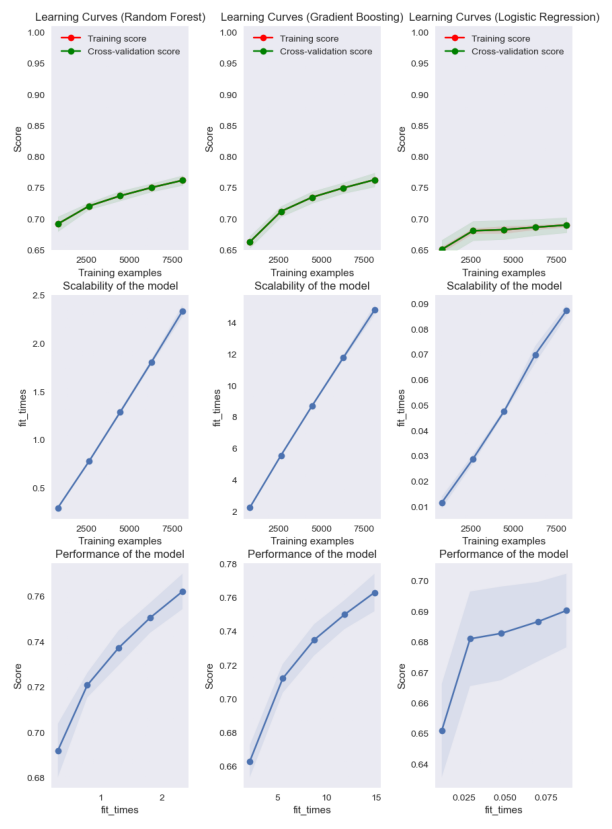

time: 181 ms (started: 2022-12-12 01:16:07 -08:00)


In [131]:
dpi=100
figure_filename = '../reports/figures/figure_train_size_score_random_forest_classifier_gradient_boosting_classifier_logistic_regression_classifier_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(60, 15))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:    
    fig, axes = plt.subplots(3, 3, figsize=(10, 15))

    title = "Learning Curves (Random Forest)"

    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    estimator = RandomForestClassifier(bootstrap=False, 
                                       max_depth=25, 
                                       min_samples_split=4, 
                                       n_estimators=200,
                                       random_state=200,
                                       min_samples_leaf=1,
                                       max_features='auto',
                                       criterion='gini',
                                       warm_start='False',)

    plt, learning_curve_random_forest_classifier = icr.plot_learning_curve(estimator, 
                                                                           title, 
                                                                           X=data_frame_collection['X_train'], 
                                                                           y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                           filename=learning_curve_results_filename_collection['random_forest_classifier'],
                                                                           axes=axes[:, 0], 
                                                                           ylim=(0.65, 1.01), 
                                                                           cv=cv, 
                                                                           n_jobs=4, 
                                                                           scoring="accuracy")


    title = r"Learning Curves (Gradient Boosting)"

    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    estimator = GradientBoostingClassifier(learning_rate = 0.1, 
                                           max_depth = 9, 
                                           n_estimators = 250,
                                           random_state=200,
                                           max_features=None,
                                           verbose=0,
                                           max_leaf_nodes=None,
                                           warm_start=False,
                                           n_iter_no_change=None)

    plt, learning_curve_gradient_boosting_classifier = icr.plot_learning_curve(estimator, 
                                                                               title, 
                                                                               X=data_frame_collection['X_train'], 
                                                                               y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                               filename=learning_curve_results_filename_collection['gradient_boosting_classifier'],
                                                                               axes=axes[:, 1], 
                                                                               ylim=(0.65, 1.01), 
                                                                               cv=cv, 
                                                                               n_jobs=4)
    
    
    title = "Learning Curves (Logistic Regression)"

    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    estimator = LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', solver='sag', random_state=200)

    plt, learning_curve_random_forest_classifier = icr.plot_learning_curve(estimator, 
                                                                           title, 
                                                                           X=data_frame_collection['X_train'], 
                                                                           y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                           filename=learning_curve_results_filename_collection['logistic_regression_classifier'],
                                                                           axes=axes[:, 2], 
                                                                           ylim=(0.65, 1.01), 
                                                                           cv=cv, 
                                                                           n_jobs=4, 
                                                                           scoring="accuracy")
    fig.subplots_adjust(wspace=.4)

    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

del StratifiedKFold

plt.show()

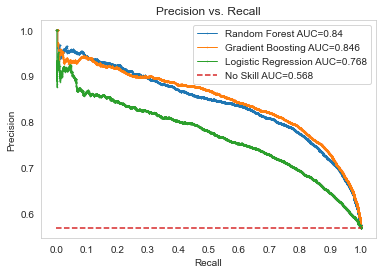

time: 255 ms (started: 2022-12-12 01:16:07 -08:00)


In [132]:
filename = '../reports/figures/figure_precision_recall_curve_random_forest_gradient_boosting_logistic_regression_metric_auc_v' + filename_version + '.png'
markersize=1
linewidth=1

#calculate precision-recall points
random_forest_classifier_precision_array, random_forest_classifier_recall_array, random_forest_classifier_threshold_array = precision_recall_curve(y_true=data_frame_collection['Y_train'].loc[:, 'Y'], probas_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])
#calculate precision-recall curve auc
random_forest_classifier_auc = auc(random_forest_classifier_recall_array, random_forest_classifier_precision_array)

# plot the precision-recall curve
plt.plot(random_forest_classifier_recall_array, random_forest_classifier_precision_array, marker='.', markersize=markersize, linewidth=linewidth, label='Random Forest AUC=' + str(round(random_forest_classifier_auc, 3)))




#calculate precision-recall points
gradient_boosting_classifier_precision_array, gradient_boosting_classifier_recall_array, gradient_boosting_classifier_threshold_array = precision_recall_curve(y_true=data_frame_collection['Y_train'].loc[:, 'Y'], probas_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])
#calculate precision-recall curve auc
gradient_boosting_classifier_auc = auc(gradient_boosting_classifier_recall_array, gradient_boosting_classifier_precision_array)

# plot the precision-recall curve
plt.plot(gradient_boosting_classifier_recall_array, gradient_boosting_classifier_precision_array, marker='.', markersize=markersize, linewidth=linewidth, label='Gradient Boosting AUC=' + str(round(gradient_boosting_classifier_auc, 3)))




#calculate precision-recall points
logistic_regression_classifier_precision_array, logistic_regression_classifier_recall_array, _ = precision_recall_curve(y_true=data_frame_collection['Y_train'].loc[:, 'Y'], probas_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['logistic_regression_classifier'])

#calculate precision-recall curve auc
logistic_regression_classifier_auc = auc(logistic_regression_classifier_recall_array, logistic_regression_classifier_precision_array)

# plot the precision-recall curve
plt.plot(logistic_regression_classifier_recall_array, logistic_regression_classifier_precision_array, marker='.', markersize=markersize, linewidth=linewidth, label='Logistic Regression AUC=' + str(round(logistic_regression_classifier_auc, 3)))





#calculate no skill classifier curve
no_skill_classifier_auc = data_frame_collection['Y_train'].loc[data_frame_collection['Y_train'].loc[:, 'Y']==1, 'Y'].shape[0] / data_frame_collection['Y_train'].loc[:, 'Y'].shape[0]
plt.plot([0, 1], [no_skill_classifier_auc, no_skill_classifier_auc], linestyle='--', label='No Skill AUC='+str(round(no_skill_classifier_auc, 3)))

plt.xticks([.0, .1 ,.2, .3 ,.4, .5, .6 ,.7, .8, .9, 1 ])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall')
plt.legend()


#save it
plt.savefig(filename, bbox_inches='tight', dpi=100)

plt.show()


#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


In [133]:
#get random forest data frame of decision threshold, precision, and recall
random_forest_classifier_threshold_array = np.append(0, random_forest_classifier_threshold_array)

df_random_forest_decision_threshold_precision_recall = pd.DataFrame({'random_forest_decision_threshold':random_forest_classifier_threshold_array, 'random_forest_precision':random_forest_classifier_precision_array, 'random_forest_recall':random_forest_classifier_recall_array})
del random_forest_classifier_threshold_array
p(df_random_forest_decision_threshold_precision_recall)


(10077, 3)


random_forest_decision_threshold  random_forest_precision  \
0                              0.000000                 0.569438   
1                              0.068534                 0.569395   
2                              0.068754                 0.569451   
3                              0.069171                 0.569508   
4                              0.069347                 0.569564   
10072                          0.979371                 1.000000   
10073                          0.981250                 1.000000   
10074                          0.981542                 1.000000   
10075                          0.982002                 1.000000   
10076                          0.982663                 1.000000   

       random_forest_recall  
0                  1.000000  
1                  0.999826  
2                  0.999826  
3                  0.999826  
4                  0.999826  
10072              0.000694  
10073              0.000521  
10074              0.000347  
10075              0.000174  
10076              0.000000

time: 5.5 ms (started: 2022-12-12 01:16:07 -08:00)


In [134]:
#get gradient boosting data frame of decision threshold, precision, and recall
gradient_boosting_classifier_threshold_array = np.append(0, gradient_boosting_classifier_threshold_array)

df_gradient_boosting_decision_threshold_precision_recall = pd.DataFrame({'gradient_boosting_decision_threshold':gradient_boosting_classifier_threshold_array, 'gradient_boosting_precision':gradient_boosting_classifier_precision_array, 'gradient_boosting_recall':gradient_boosting_classifier_recall_array})
del gradient_boosting_classifier_threshold_array
p(df_gradient_boosting_decision_threshold_precision_recall)


(10124, 3)


gradient_boosting_decision_threshold  gradient_boosting_precision  \
0                                  0.000000                     0.568595   
1                                  0.000002                     0.568552   
2                                  0.000002                     0.568608   
3                                  0.000002                     0.568664   
4                                  0.000002                     0.568720   
10119                              1.000000                     1.000000   
10120                              1.000000                     1.000000   
10121                              1.000000                     1.000000   
10122                              1.000000                     1.000000   
10123                              1.000000                     1.000000   

       gradient_boosting_recall  
0                      1.000000  
1                      0.999826  
2                      0.999826  
3                      0.999826  
4                      0.999826  
10119                  0.000694  
10120                  0.000521  
10121                  0.000347  
10122                  0.000174  
10123                  0.000000

time: 5.2 ms (started: 2022-12-12 01:16:07 -08:00)


## Get Model Precision .9 and  Recall .8 Decision Threshold by Coupon Venue Type

### Get Data Frame Y Actual, Y Random Forest Prediction Probability, Y Gradient Boosting Prediction Probability Collection by Coupon Venue Type

In [135]:
# Get Coupon Venue Type, Random Forest Prediction Probability, Gradient Boosting Prediction Probability, and Y Actual
data_frame_list = [df_stratified_fold_number_y_test.reset_index(drop=True), 
                   stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'].to_frame().rename(columns={1:'Y_random_forest_prediction_probability'}).reset_index(drop=True),
                   stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'].to_frame().rename(columns={1:'Y_gradient_boosting_prediction_probability'}).reset_index(drop=True),
                   df_stratified_fold_number_X_test.loc[:, 'coupon_venue_type'].reset_index(drop=True)]

df_y_train_prediction_probability_coupon_venue_type = pd.concat(data_frame_list, axis=1)

#get data frame collection by coupon venue type
coupon_venue_type_list = df_y_train_prediction_probability_coupon_venue_type.loc[:, 'coupon_venue_type'].drop_duplicates().to_list()

df_y_train_prediction_probability_coupon_venue_type_collection = {coupon_venue_type: df_y_train_prediction_probability_coupon_venue_type.loc[df_y_train_prediction_probability_coupon_venue_type.loc[:, 'coupon_venue_type']== coupon_venue_type,:] for coupon_venue_type in coupon_venue_type_list}

p(df_y_train_prediction_probability_coupon_venue_type_collection['Coffee House'])



(3185, 4)


Y  Y_random_forest_prediction_probability  \
0      1                                0.747329   
1      1                                0.698454   
3      1                                0.780046   
4      1                                0.703800   
5      0                                0.594214   
10129  1                                0.452407   
10130  0                                0.354153   
10132  1                                0.552071   
10145  1                                0.883756   
10146  1                                0.614171   

       Y_gradient_boosting_prediction_probability coupon_venue_type  
0                                        0.587066      Coffee House  
1                                        0.927773      Coffee House  
3                                        0.985565      Coffee House  
4                                        0.938343      Coffee House  
5                                        0.692802      Coffee House  
10129                                    0.245842      Coffee House  
10130                                    0.022894      Coffee House  
10132                                    0.868979      Coffee House  
10145                                    0.999945      Coffee House  
10146                                    0.947660      Coffee House

time: 12.5 ms (started: 2022-12-12 01:16:07 -08:00)


### Model Precision-Recall Curve for Coffee Coupon

In [136]:
decision_threshold_collection = {}

time: 387 µs (started: 2022-12-12 01:16:07 -08:00)


row count: 3185
Random Forest Coffee House Coupon .9 precision 
decision thresholds [0.7580674603174602, 0.7581170634920632, 0.7583293650793652, 0.7587400793650794, 0.7593015873015869, 0.7599186507936507, 0.7606448412698412, 0.7608591269841266, 0.764174603174603, 0.7645615079365079, 0.7649563492063494, 0.7651646825396827, 0.7654662698412699, 0.7659623015873016, 0.7659900793650791, 0.7665853174603172, 0.766861111111111, 0.7669583333333331, 0.7670317460317456, 0.7670555555555555, 0.7673432539682535, 0.767406746031746, 0.7675178571428574, 0.7676984126984128, 0.7677956349206344, 0.7681388888888887]

Random Forest Coffee House Coupon .8 recall 
decision thresholds [0.48577777777777753]

Gradient Boosting Coffee House Coupon .9 precision 
decision thresholds [0.9951461183487912, 0.9952487710112122, 0.9952931190255159, 0.995301875516557, 0.9953269416226073, 0.9956599770127567, 0.9957645680279684, 0.9957826856242064, 0.9957968816720534, 0.9958042837684937, 0.9959049723061618, 0.995909284760570

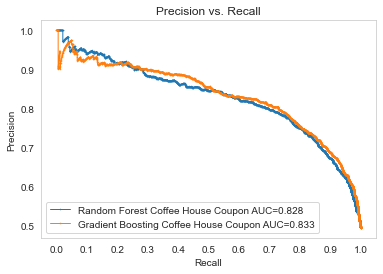

time: 112 ms (started: 2022-12-12 01:16:07 -08:00)


In [137]:
icr.precision_recall_auc_plots(df_collection=df_y_train_prediction_probability_coupon_venue_type_collection,
                               coupon_venue_type='Coffee House',
                               precision_lower_upper=[.899, .901],
                               recall_lower_upper=[.79999, .801])
decision_threshold_collection.update({'Coffee House':{'gradient_boosting_precision':0.7580674603174602, 'gradient_boosting_recall':0.37466044195068726}})


### Model Precision-Recall Curve for Bar Coupon

row count: 1618
Random Forest Bar Coupon .9 precision 
decision thresholds [0.7456111111111112, 0.7622559523809522, 0.771313492063492, 0.779876984126984]

Random Forest Bar Coupon .8 recall 
decision thresholds [0.4231309523809524]

Gradient Boosting Bar Coupon .9 precision 
decision thresholds [0.9999783486836313]

Gradient Boosting Bar Coupon .8 recall 
decision thresholds [0.13379544334169902]



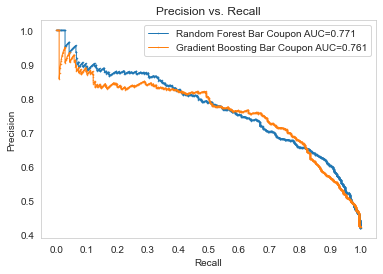

time: 108 ms (started: 2022-12-12 01:16:08 -08:00)


In [138]:
icr.precision_recall_auc_plots(df_collection=df_y_train_prediction_probability_coupon_venue_type_collection,
                               coupon_venue_type='Bar',
                               precision_lower_upper=[.899, .901],
                               recall_lower_upper=[.799999, .801])

decision_threshold_collection.update({'Bar':{'random_forest_precision':0.7456111111111112, 'gradient_boosting_recall':0.13379544334169902}})

### Model Precision-Recall Curve for Takeout Coupon

row count: 1904
Random Forest Carry out & Take away Coupon .9 precision 
decision thresholds [0.8246071428571429, 0.8251408730158728, 0.825404761904762]

Random Forest Carry out & Take away Coupon .8 recall 
decision thresholds [0.6508888888888891]

Gradient Boosting Carry out & Take away Coupon .9 precision 
decision thresholds [0.9974378590331576, 0.9975020114274846, 0.9975241799705501, 0.9975338982683242, 0.9975346706519324, 0.9975596068604126, 0.9976029192454339, 0.9976285591244931, 0.9976423154895858, 0.9976535681579239, 0.997655464316996, 0.9976694536081205, 0.9976752776428793, 0.9977335006065142, 0.9977353914395722, 0.9977383137488673, 0.9977419352926448, 0.9977487092022774, 0.9999950379865535]

Gradient Boosting Carry out & Take away Coupon .8 recall 
decision thresholds [0.8854508405619727]



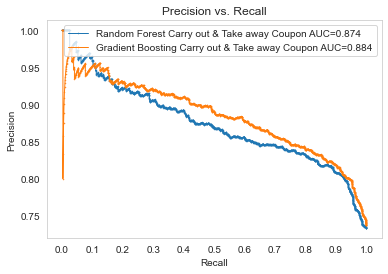

time: 118 ms (started: 2022-12-12 01:16:08 -08:00)


In [139]:
icr.precision_recall_auc_plots(df_collection=df_y_train_prediction_probability_coupon_venue_type_collection,
                               coupon_venue_type='Carry out & Take away',
                               precision_lower_upper=[.899999, .901],
                               recall_lower_upper=[.79999, .801])

decision_threshold_collection.update({'Carry out & Take away':{'gradient_boosting_precision':0.9974378590331576, 'gradient_boosting_recall':0.8854508405619727}})


### Model Precision-Recall Curve for Inexpensive Restaurant Coupon

row count: 2252
Random Forest Restaurant(<20) Coupon .9 precision 
decision thresholds [0.7747638888888889, 0.7750456349206347, 0.7750654761904763, 0.7751051587301587, 0.7754464285714286, 0.7756825396825395, 0.7757559523809523, 0.7759424603174603, 0.7771448412698413, 0.7773253968253968, 0.7773809523809523, 0.7775615079365075]

Random Forest Restaurant(<20) Coupon .8 recall 
decision thresholds [0.6512658730158729, 0.6518630952380953, 0.6521071428571429]

Gradient Boosting Restaurant(<20) Coupon .9 precision 
decision thresholds [0.9854502364161667, 0.9881085559543317, 0.9881210160773701, 0.9881515469639549, 0.988213464393302, 0.9891426540934446, 0.9892133309336615, 0.9892803961430584, 0.9893498052624267, 0.989376382319811, 0.9894359402391328, 0.9894562655280458, 0.9895616259252541, 0.9897054866591337, 0.9897640688310755, 0.9897680341351776, 0.9898078359433362, 0.9900791390437343, 0.9901293541344707, 0.9902529723504592]

Gradient Boosting Restaurant(<20) Coupon .8 recall 
decision thres

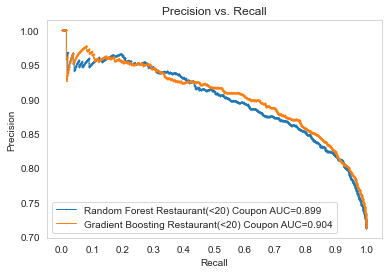

time: 111 ms (started: 2022-12-12 01:16:08 -08:00)


In [140]:
icr.precision_recall_auc_plots(df_collection=df_y_train_prediction_probability_coupon_venue_type_collection,
                               coupon_venue_type='Restaurant(<20)',
                               precision_lower_upper=[.899, .901],
                               recall_lower_upper=[.79999, .801])

decision_threshold_collection.update({'Restaurant(<20)':{'gradient_boosting_precision':0.9854502364161667, 'gradient_boosting_recall':0.9015847192478904}})


### Model Precision-Recall Curve by Expensive Restaurant Coupon

row count: 1188
Random Forest Restaurant(20-50) Coupon .9 precision 
decision thresholds [0.7898095238095234]

Random Forest Restaurant(20-50) Coupon .8 recall 
decision thresholds [0.4123730158730159, 0.4126190476190477, 0.41277579365079364]

Gradient Boosting Restaurant(20-50) Coupon .9 precision 
decision thresholds [0.9996838085015485, 0.9998191614451433, 0.9998997903559125]

Gradient Boosting Restaurant(20-50) Coupon .8 recall 
decision thresholds [0.09031483338266143]



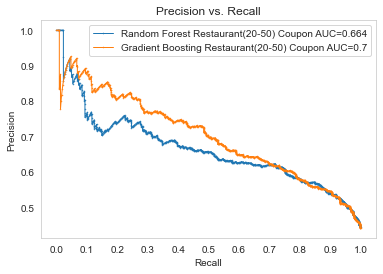

time: 104 ms (started: 2022-12-12 01:16:08 -08:00)


In [141]:
icr.precision_recall_auc_plots(df_collection=df_y_train_prediction_probability_coupon_venue_type_collection,
                               coupon_venue_type='Restaurant(20-50)',
                               precision_lower_upper=[.899, .901],
                               recall_lower_upper=[.799, .801])

decision_threshold_collection.update({'Restaurant(20-50)':{'gradient_boosting_precision':0.9996838085015485, 'gradient_boosting_recall':0.09031483338266143}})

In [142]:
#baseline for classification problem???

#for varying percentage of total number of coupon recommendation opportunities, ???

time: 414 µs (started: 2022-12-12 01:16:08 -08:00)


## Get Baseline Confusion Matrix

baseline_precision: 0.5696556546058381
baseline_recall: 0.5657003992362437
baseline_accuracy: 0.5107913669064749
tn: 1924
fp: 2462
fn: 2502
tp: 3259
Of 5721 coupon recommendations 3259 accepted the coupon saying they would use it. This is a potential 56.97% conversion rate and a potential 3259 total customer acquisitions.


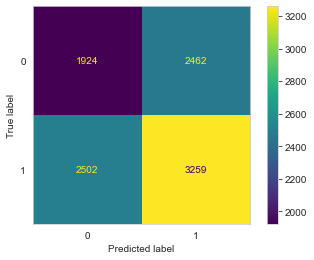

time: 87 ms (started: 2022-12-12 01:16:08 -08:00)


In [143]:
number_of_predictions = data_frame_collection['Y_train'].shape[0]

y_true=data_frame_collection['Y_train']

np.random.seed(200)
#y_pred=np.random.randint(2, size=number_of_predictions)#no adjustment needed, just a baseline example application
class_0_probability = data_frame_collection['Y_train'].value_counts()[0] / data_frame_collection['Y_train'].shape[0]
class_1_probability = data_frame_collection['Y_train'].value_counts()[1] / data_frame_collection['Y_train'].shape[0]
y_pred=np.random.choice([0, 1], size=number_of_predictions, p=[class_0_probability, class_1_probability])

#altnerative to assigning 0 and 1 in train class ratio, which is not respecting the train test structure of not knowing the y_test outcomes per cross validation.

#so the way to fix this is to get the 0 to 1 ratio of the 4 folds that would be used to generate 0s and 1s to predict on the held out test fold?


baseline_precision = precision_score(y_true, y_pred)
baseline_recall = recall_score(y_true, y_pred)
baseline_accuracy = accuracy_score(y_true, y_pred)

print('baseline_precision: '+ str(baseline_precision))
print('baseline_recall: ' + str(baseline_recall))
print('baseline_accuracy: ' + str(baseline_accuracy))

confusion_matrix_ndarray = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix_ndarray.ravel()
print('tn: ' + str(tn))
print('fp: ' + str(fp))
print('fn: ' + str(fn))
print('tp: ' + str(tp))

print('Of ' + str(tp + fp) + ' coupon recommendations ' + str(tp) + ' accepted the coupon saying they would use it. \
This is a potential ' + str(round(baseline_precision*100, 2)) + '% conversion rate and a potential ' + str(3259) + ' total customer acquisitions.') 

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_ndarray, display_labels=[0,1])
disp.plot()
plt.grid(False)

plt.show()

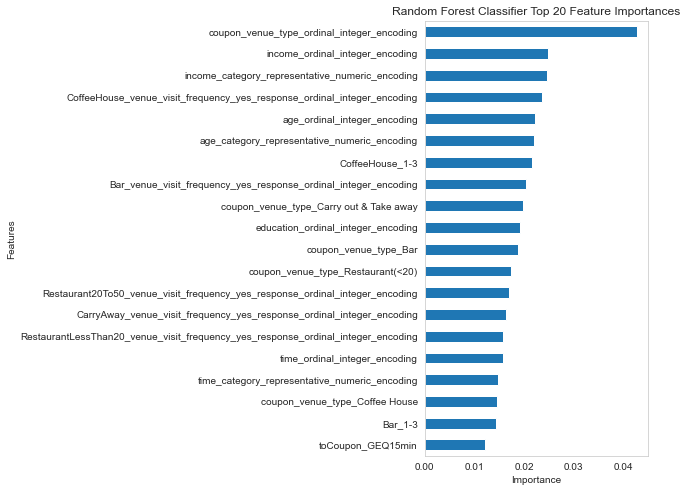

time: 321 ms (started: 2022-12-12 01:16:08 -08:00)


In [144]:
#get feature importants plot
dpi=100
figure_filename = '../reports/figures/figure_random_forest_classifier_train_top_20_feature_importances_v' + filename_version + '.png'

plt.subplots(figsize=(4, 8))

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:20].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top 20 Feature Importances');

plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)



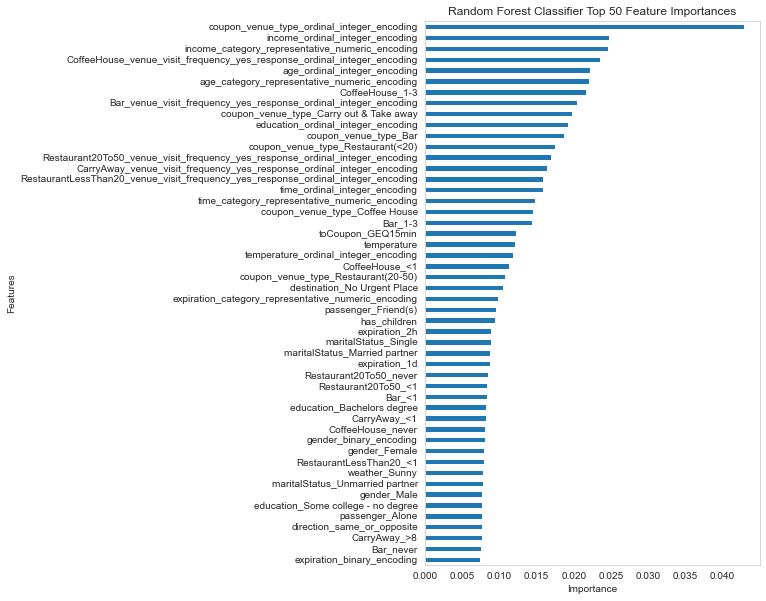

time: 1.05 s (started: 2022-12-12 01:16:08 -08:00)


In [145]:
#get feature importants plot
top_number_features = 50
dpi=100
figure_filename = '../reports/figures/figure_random_forest_classifier_train_top_'+ str(top_number_features) +'_feature_importances_v' + filename_version + '.png'


plt.subplots(figsize=(6, 10))

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:top_number_features].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top ' + str(top_number_features)   + ' Feature Importances');

plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)



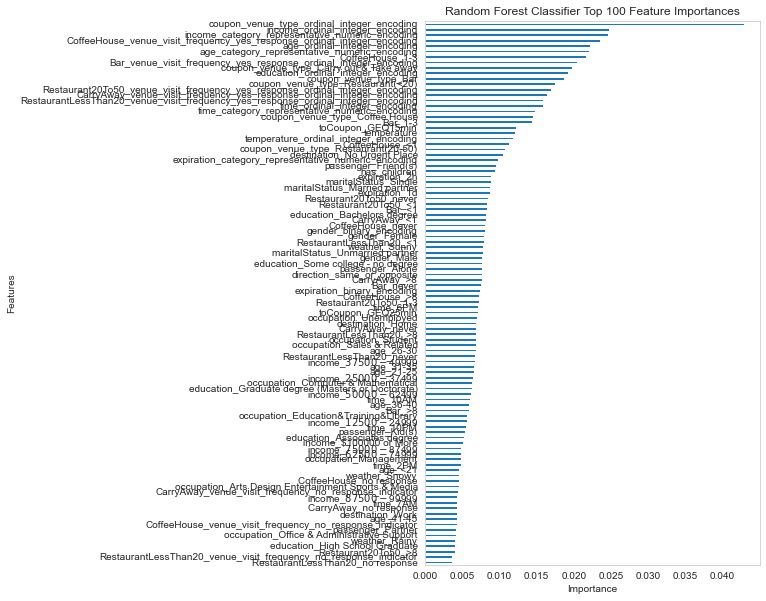

time: 1.89 s (started: 2022-12-12 01:16:09 -08:00)


In [146]:
#get feature importants plot
top_number_features = 100
dpi=100
figure_filename = '../reports/figures/figure_random_forest_classifier_train_top_'+ str(top_number_features) +'_feature_importances_v' + filename_version + '.png'


plt.subplots(figsize=(6, 10))

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:top_number_features].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top ' + str(top_number_features)   + ' Feature Importances');

plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)



In [147]:
column_name_list_random_forest_classifier_top_50_by_feature_importance = series_random_forest_classifier_feature_importances[0:50].index.to_list()

column_name_list_random_forest_classifier_top_25_by_feature_importance = series_random_forest_classifier_feature_importances[0:25].index.to_list()

pl(column_name_list_random_forest_classifier_top_50_by_feature_importance)

50


['coupon_venue_type_ordinal_integer_encoding',
 'income_ordinal_integer_encoding',
 'income_category_representative_numeric_encoding',
 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'age_ordinal_integer_encoding',
 'age_category_representative_numeric_encoding',
 'CoffeeHouse_1-3',
 'Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'coupon_venue_type_Carry out & Take away',
 'education_ordinal_integer_encoding',
 'coupon_venue_type_Bar',
 'coupon_venue_type_Restaurant(<20)',
 'Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'time_category_representative_numeric_encoding',
 'coupon_venue_type_Coffee House',
 'Bar_1-3',
 'toCoupon_GEQ15min',
 'temperature',
 'temperature_ordinal_integer_encoding',
 'CoffeeHouse_<1',
 'c

time: 2.19 ms (started: 2022-12-12 01:16:11 -08:00)


In [148]:
column_name_list_random_forest_classifier_top_50_by_feature_importance_target = column_name_list_random_forest_classifier_top_50_by_feature_importance + ['Y']
column_name_list_random_forest_classifier_top_25_by_feature_importance_target = column_name_list_random_forest_classifier_top_25_by_feature_importance + ['Y']
pl(column_name_list_random_forest_classifier_top_25_by_feature_importance_target)


26


['coupon_venue_type_ordinal_integer_encoding',
 'income_ordinal_integer_encoding',
 'income_category_representative_numeric_encoding',
 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'age_ordinal_integer_encoding',
 'age_category_representative_numeric_encoding',
 'CoffeeHouse_1-3',
 'Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'coupon_venue_type_Carry out & Take away',
 'education_ordinal_integer_encoding',
 'coupon_venue_type_Bar',
 'coupon_venue_type_Restaurant(<20)',
 'Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'time_category_representative_numeric_encoding',
 'coupon_venue_type_Coffee House',
 'Bar_1-3',
 'toCoupon_GEQ15min',
 'temperature',
 'temperature_ordinal_integer_encoding',
 'CoffeeHouse_<1',
 'c

time: 1.56 ms (started: 2022-12-12 01:16:11 -08:00)


In [149]:
df_train = pd.concat([data_frame_collection['X_train'], data_frame_collection['Y_train']], axis=1)
p(df_train)

(10147, 141)


destination_Home  destination_No Urgent Place  destination_Work  \
8630          -0.585362                     1.009347         -0.576501   
2418          -0.585362                     1.009347         -0.576501   
10804         -0.585362                     1.009347         -0.576501   
747           -0.585362                     1.009347         -0.576501   
7333          -0.585362                     1.009347         -0.576501   
10949         -0.585362                     1.009347         -0.576501   
11937         -0.585362                     1.009347         -0.576501   
735            1.708345                    -0.990740         -0.576501   
67            -0.585362                     1.009347         -0.576501   
3251          -0.585362                     1.009347         -0.576501   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
8630         -1.165358             1.686999         -0.293504   
2418         -1.165358             1.686999         -0.293504   
10804         0.858105            -0.592768         -0.293504   
747          -1.165358             1.686999         -0.293504   
7333         -1.165358             1.686999         -0.293504   
10949        -1.165358            -0.592768          3.407103   
11937         0.858105            -0.592768         -0.293504   
735           0.858105            -0.592768         -0.293504   
67           -1.165358             1.686999         -0.293504   
3251         -1.165358             1.686999         -0.293504   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
8630           -0.304303       -0.32474      -0.352942       0.509616   
2418           -0.304303       -0.32474      -0.352942       0.509616   
10804          -0.304303        3.07939      -0.352942      -1.962263   
747            -0.304303       -0.32474      -0.352942       0.509616   
7333           -0.304303       -0.32474      -0.352942       0.509616   
10949          -0.304303       -0.32474       2.833330      -1.962263   
11937          -0.304303        3.07939      -0.352942      -1.962263   
735            -0.304303       -0.32474      -0.352942       0.509616   
67             -0.304303       -0.32474      -0.352942       0.509616   
3251           -0.304303       -0.32474      -0.352942       0.509616   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
8630   -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
2418   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
10804  -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
747    -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
7333   -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
10949  -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
11937   2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
735    -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
67      2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
3251    2.139015  -0.433432 -0.433816 -0.584512 -0.576501   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
8630               -0.434842                                -0.482217   
2418               -0.434842                                -0.482217   
10804              -0.434842                                 2.073755   
747                -0.434842                                -0.482217   
7333               -0.434842                                -0.482217   
10949               2.299684                                -0.482217   
11937               2.299684                                -0.482217   
735                -0.434842                                -0.482217   
67                 -0.434842                                -0.482217   
3251               -0.434842                                -0.482217   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
8630                         1.474508                            -0.365116   
2418                         1.474508   

time: 62 ms (started: 2022-12-12 01:16:11 -08:00)


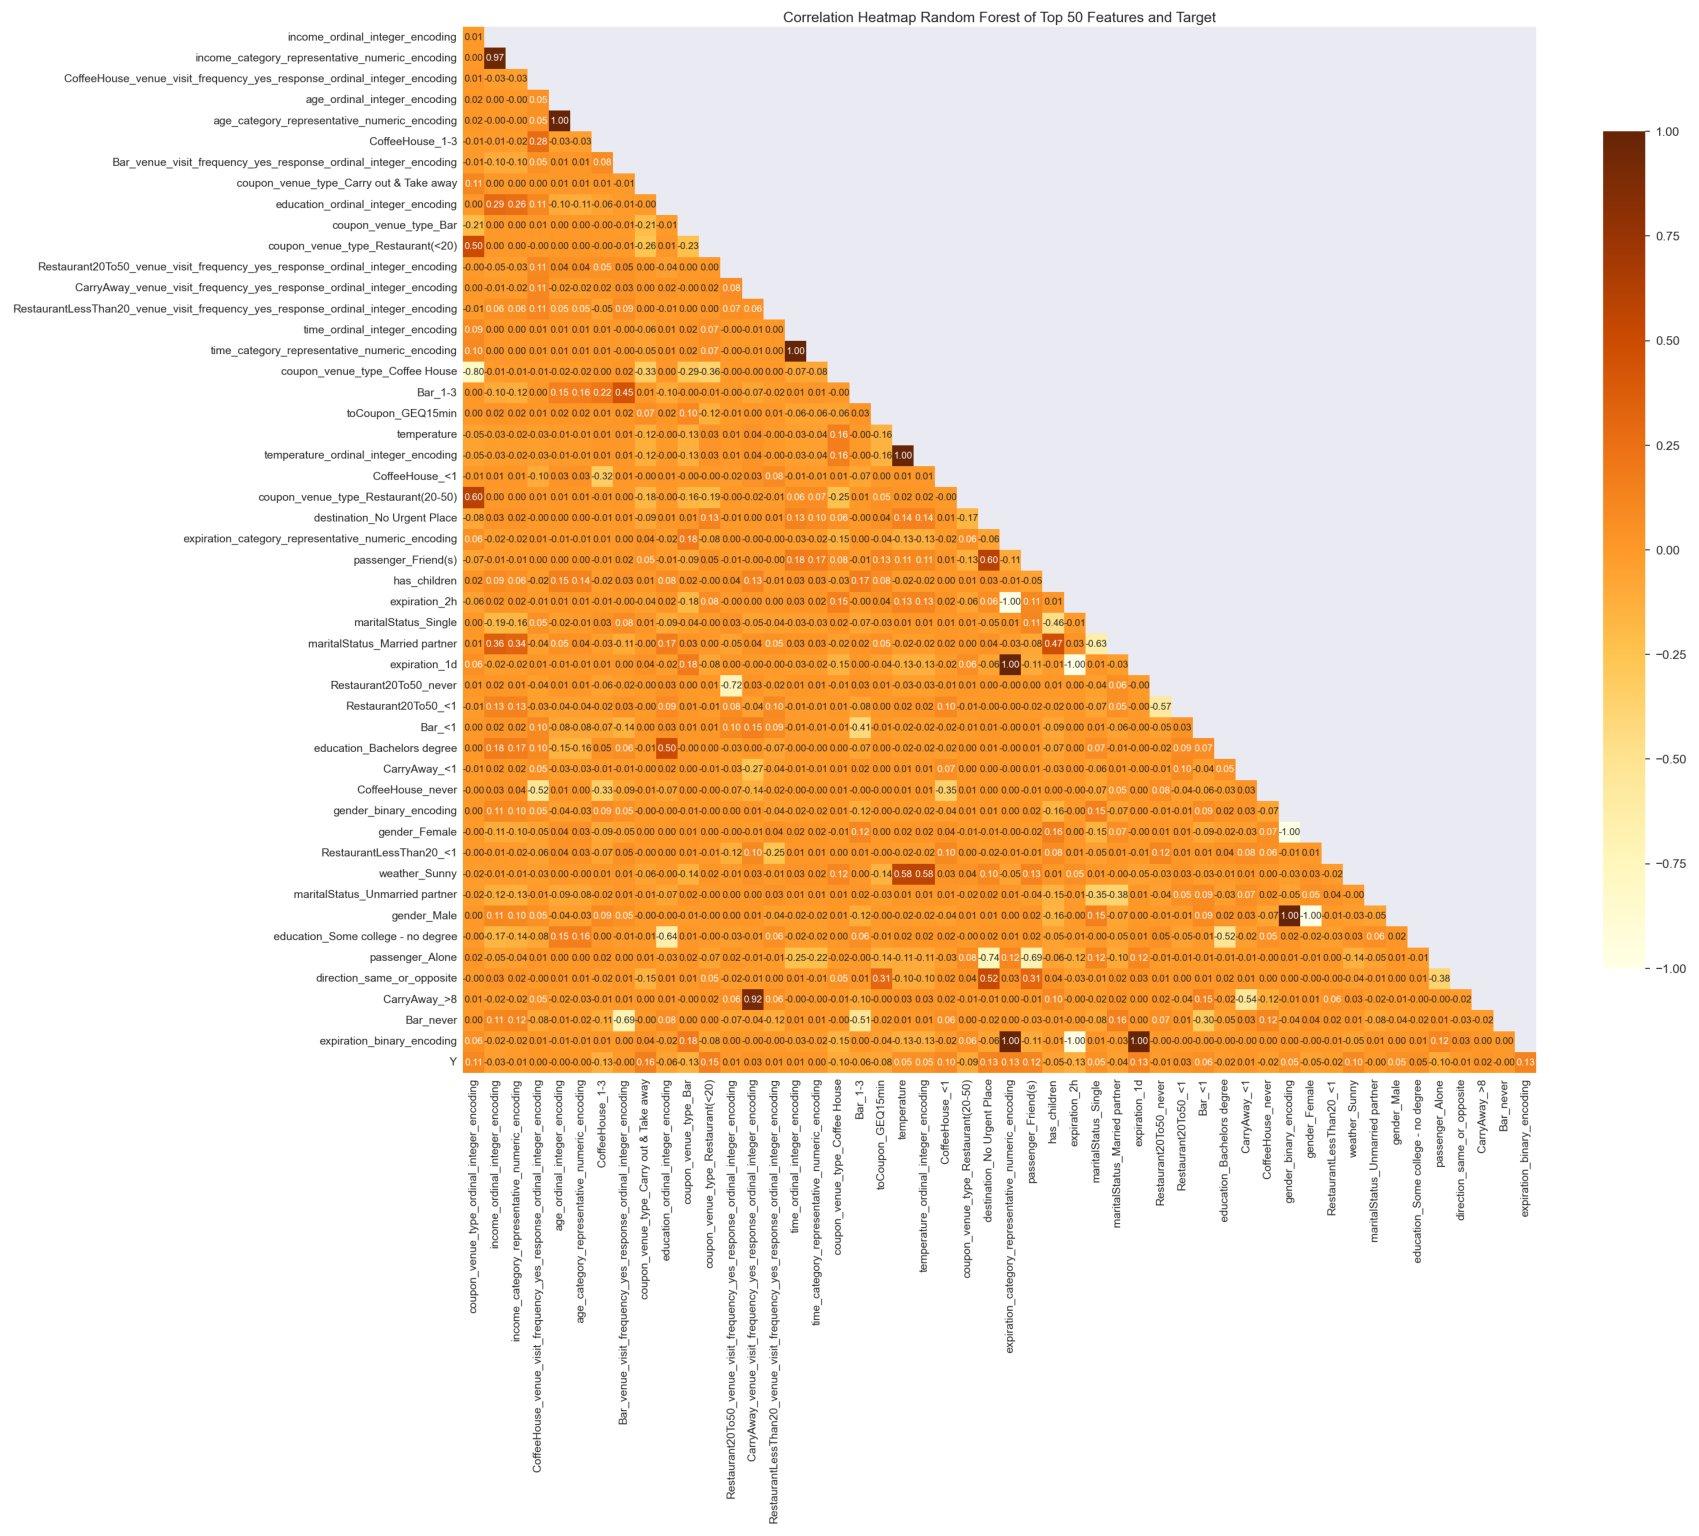

time: 1.08 s (started: 2022-12-12 01:16:11 -08:00)


In [150]:
dpi=100
figure_filename = '../reports/figures/figure_correlation_heatmap_random_forest_classifier_train_top_50_and_target_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(35, 28))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    #correlation heatmap of top 50 features and target

    df_corr = df_train.loc[:, column_name_list_random_forest_classifier_top_50_by_feature_importance_target].corr()

    fig, ax = plt.subplots(figsize=(30, 24))

    mask = np.triu(np.ones_like(df_corr, dtype=bool))
    mask = mask[1:, :-1]

    corr = df_corr.iloc[1:,:-1].copy()

    sns.set(font_scale=1.4)
    sns.set_style("white")

    res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)
    plt.title('Correlation Heatmap Random Forest of Top 50 Features and Target', fontsize=18)

    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()

In [151]:
#categories of top 25 features???

pl(column_name_list_random_forest_classifier_top_25_by_feature_importance)

#coupon_venue_type - coupon venue type

#temperature - outside temperature

#expiration - time til expiration

#CoffeeHouse - coffee house visits per month

25


['coupon_venue_type_ordinal_integer_encoding',
 'income_ordinal_integer_encoding',
 'income_category_representative_numeric_encoding',
 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'age_ordinal_integer_encoding',
 'age_category_representative_numeric_encoding',
 'CoffeeHouse_1-3',
 'Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'coupon_venue_type_Carry out & Take away',
 'education_ordinal_integer_encoding',
 'coupon_venue_type_Bar',
 'coupon_venue_type_Restaurant(<20)',
 'Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'time_category_representative_numeric_encoding',
 'coupon_venue_type_Coffee House',
 'Bar_1-3',
 'toCoupon_GEQ15min',
 'temperature',
 'temperature_ordinal_integer_encoding',
 'CoffeeHouse_<1',
 'c

time: 1.79 ms (started: 2022-12-12 01:16:13 -08:00)


<font size="5"><a id='[Modeling_Test_Results]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>


<font size="6"><a id='[Modeling_Test_Results]'>**Modeling Test Results**</a> </font>

# Get Metrics Conversion Rate, Number of Conversions, Recall per Coupon Venue Type

### Get Data Frame Random Forest Prediction Probability, Gradient Boosting Prediction Probability, Y Actual, Coupon Venue Type

In [152]:
## Get Prediction Probabilities for Gradient Boosting, Prediction Probabilities for Random Forest, Y_actual, and coupon venue type
Y_test_random_forest_prediction_probability_class0_class1_ndarray = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.predict_proba(data_frame_collection['X_test'])
df_Y_test_random_forest_prediction_probability = pd.DataFrame(Y_test_random_forest_prediction_probability_class0_class1_ndarray).loc[:, 1]


Y_test_gradient_boosting_prediction_probability_class0_class1_ndarray = best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.predict_proba(data_frame_collection['X_test'])
df_Y_test_gradient_boosting_prediction_probability = pd.DataFrame(Y_test_gradient_boosting_prediction_probability_class0_class1_ndarray).loc[:, 1]


df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type = \
pd.concat([df_Y_test_random_forest_prediction_probability.to_frame().rename(columns={1:'Y_test_random_forest_prediction_probability'}), 
           df_Y_test_gradient_boosting_prediction_probability.to_frame().rename(columns={1:'Y_test_gradient_boosting_prediction_probability'}), 
           data_frame_collection['Y_test'].reset_index(drop=True),
           df_collection['X_test'].loc[:, 'coupon_venue_type'].reset_index(drop=True)], axis=1)

p(df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type)


(2537, 4)


Y_test_random_forest_prediction_probability  \
0                                        0.063081   
1                                        0.075221   
2                                        0.498031   
3                                        0.139583   
4                                        0.620000   
2532                                     0.240637   
2533                                     0.474750   
2534                                     0.249458   
2535                                     0.615000   
2536                                     0.860769   

      Y_test_gradient_boosting_prediction_probability  Y  \
0                                            0.000083  0   
1                                            0.000022  0   
2                                            0.727012  0   
3                                            0.101985  0   
4                                            0.981180  1   
2532                                         0.954699  0   
2533                                         0.097020  1   
2534                                         0.000141  0   
2535                                         0.923828  1   
2536                                         0.996709  1   

          coupon_venue_type  
0              Coffee House  
1              Coffee House  
2              Coffee House  
3         Restaurant(20-50)  
4              Coffee House  
2532        Restaurant(<20)  
2533           Coffee House  
2534                    Bar  
2535  Carry out & Take away  
2536  Carry out & Take away

time: 141 ms (started: 2022-12-12 01:16:13 -08:00)



### Get Y Test Model Predictions with .9 Precision and .8 Recall Per Venue Type: Coffee House, Bar, Carry Out & Take Away, Inexpensive Restaurant, Expensive Restaurant

In [153]:
Y_test_model_prediction_data_frame_collection = {}


# Get Y Test Gradient Boosting Predictions with .9 Precision for Coffee House Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='precision', metric_quantity='dot9', coupon_name='Coffee House', coupon_name_short='coffee_house', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)

# Get Y Test Gradient Boosting Predictions with .8 Recall for Coffee House Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='recall', metric_quantity='dot8', coupon_name='Coffee House', coupon_name_short='coffee_house', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)



# Get Y Test Gradient Boosting Predictions with .9 Precision for Bar Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='random_forest', metric_name='precision', metric_quantity='dot9', coupon_name='Bar', coupon_name_short='bar', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)

# Get Y Test Gradient Boosting Predictions with .8 Recall for Bar Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='recall', metric_quantity='dot8', coupon_name='Bar', coupon_name_short='bar', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)




# Get Y Test Gradient Boosting Predictions with .9 Precision for Take Out Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='precision', metric_quantity='dot9', coupon_name='Carry out & Take away', coupon_name_short = 'takeout', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)

# Get Y Test Gradient Boosting Predictions with .8 Recall for Bar Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='recall', metric_quantity='dot8', coupon_name='Carry out & Take away', coupon_name_short='takeout', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)



# Get Y Test Gradient Boosting Predictions with .9 Precision for Inexpensive Restaurant Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='precision', metric_quantity='dot9', coupon_name='Restaurant(<20)', coupon_name_short='inexpensive_restaurant', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)

# Get Y Test Gradient Boosting Predictions with .8 Recall for Inexpensive Restaurant Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='recall', metric_quantity='dot8', coupon_name='Restaurant(<20)', coupon_name_short='inexpensive_restaurant', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)



# Get Y Test Gradient Boosting Predictions with .9 Precision for Expensive Restaurant Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='precision', metric_quantity='dot9', coupon_name='Restaurant(20-50)', coupon_name_short='expensive_restaurant', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)

# Get Y Test Gradient Boosting Predictions with .8 Recall for Expensive Restaurant Coupons
Y_test_model_prediction_data_frame_collection, key = icr.get_model_predictions_decision_threshold_metric_aim_coupon_venue_type(model_name='gradient_boosting', metric_name='recall', metric_quantity='dot8', coupon_name='Restaurant(20-50)', coupon_name_short='expensive_restaurant', Y_test_model_prediction_data_frame_collection=Y_test_model_prediction_data_frame_collection, df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type=df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type, decision_threshold_collection=decision_threshold_collection)


# Combine Model Prediction by Metric Per Coupon Venue Type
data_frame_key_list = list(Y_test_model_prediction_data_frame_collection.keys())

data_frame_list = [Y_test_model_prediction_data_frame_collection[key] for key in data_frame_key_list]

data_frame_list += [data_frame_collection['Y_test'].reset_index(drop=True).rename(columns={'Y':'Y_test'}),df_collection['X_test'].loc[:, 'coupon_venue_type'].reset_index(drop=True)]

df_model_precision_recall_coupon_type = pd.concat(data_frame_list, axis=1)
p(df_model_precision_recall_coupon_type)


(2537, 12)


gradient_boosting_prediction_precision_dot9_coffee_house_coupon  \
0                                                                   0   
1                                                                   0   
2                                                                   0   
3                                                                   0   
4                                                                   1   
2532                                                                1   
2533                                                                0   
2534                                                                0   
2535                                                                1   
2536                                                                1   

      gradient_boosting_prediction_recall_dot8_coffee_house_coupon  \
0                                                                0   
1                                                                0   
2                                                                1   
3                                                                0   
4                                                                1   
2532                                                             1   
2533                                                             0   
2534                                                             0   
2535                                                             1   
2536                                                             1   

      random_forest_prediction_precision_dot9_bar_coupon  \
0                                                      0   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
2532                                                   0   
2533                                                   0   
2534                                                   0   
2535                                                   0   
2536                                                   1   

      gradient_boosting_prediction_recall_dot8_bar_coupon  \
0                                                       0   
1                                                       0   
2                                                       1   
3                                                       0   
4                                                       1   
2532                                                    1   
2533                                                    0   
2534                                                    0   
2535                                                    1   
2536                                                    1   

      gradient_boosting_prediction_precision_dot9_takeout_coupon  \
0                                                              0   
1                                                              0   
2                                                              0   
3                                                              0   
4                                                              0   
2532                                                           0   
2533                                                           0   
2534                                                           0   
2535                                                           0   
2536                                                           0   

      gradient_boosting_prediction_recall_dot8_takeout_coupon  \
0                                                           0   
1                                                           0   
2                                                           0   
3                                                           0   
4                       

time: 23.1 ms (started: 2022-12-12 01:16:13 -08:00)


### Calculate Metrics Conversion Rate, Recall, Number of Conversions, Number of Conversion Predicted, Number of Conversions Possible By Coupon Venue Type: Coffee House, Bar, Take Out, Inexpensive Restaurant, Expensive Restaurant

In [154]:
model_name = 'gradient_boosting'
metric_name = 'precision'
metric_quantity = 'dot9'
coupon_name = 'Coffee House'
coupon_name_short = 'coffee_house'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



coupon_venue_type: Coffee House
precision: 0.8324175824175825
recall: 0.7096018735362998
number_of_conversions_correctly_predicted: 303
number_of_conversions_predicted: 364
number_of_conversions: 427
time: 5.14 ms (started: 2022-12-12 01:16:13 -08:00)


In [155]:
model_name = 'gradient_boosting'
metric_name = 'recall'
metric_quantity = 'dot8'
coupon_name = 'Coffee House'
coupon_name_short = 'coffee_house'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



coupon_venue_type: Coffee House
precision: 0.7636363636363637
recall: 0.7868852459016393
number_of_conversions_correctly_predicted: 336
number_of_conversions_predicted: 440
number_of_conversions: 427
time: 5.01 ms (started: 2022-12-12 01:16:13 -08:00)


In [156]:
model_name = 'random_forest'
metric_name = 'precision'
metric_quantity = 'dot9'
coupon_name = 'Bar'
coupon_name_short = 'bar'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



coupon_venue_type: Bar
precision: 0.8780487804878049
recall: 0.23076923076923078
number_of_conversions_correctly_predicted: 36
number_of_conversions_predicted: 41
number_of_conversions: 156
time: 4.9 ms (started: 2022-12-12 01:16:13 -08:00)


In [157]:
model_name = 'gradient_boosting'
metric_name = 'recall'
metric_quantity = 'dot8'
coupon_name = 'Bar'
coupon_name_short = 'bar'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



coupon_venue_type: Bar
precision: 0.6616915422885572
recall: 0.8525641025641025
number_of_conversions_correctly_predicted: 133
number_of_conversions_predicted: 201
number_of_conversions: 156
time: 4.89 ms (started: 2022-12-12 01:16:13 -08:00)


In [158]:
model_name = 'gradient_boosting'
metric_name = 'precision'
metric_quantity = 'dot9'
coupon_name = 'Carry out & Take away'
coupon_name_short = 'takeout'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



coupon_venue_type: Carry out & Take away
precision: 0.896774193548387
recall: 0.38292011019283745
number_of_conversions_correctly_predicted: 139
number_of_conversions_predicted: 155
number_of_conversions: 363
time: 6.04 ms (started: 2022-12-12 01:16:13 -08:00)


In [159]:
model_name = 'gradient_boosting'
metric_name = 'recall'
metric_quantity = 'dot8'
coupon_name = 'Carry out & Take away'
coupon_name_short = 'takeout'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



coupon_venue_type: Carry out & Take away
precision: 0.857566765578635
recall: 0.7961432506887053
number_of_conversions_correctly_predicted: 289
number_of_conversions_predicted: 337
number_of_conversions: 363
time: 5.04 ms (started: 2022-12-12 01:16:13 -08:00)


In [160]:
model_name = 'gradient_boosting'
metric_name = 'precision'
metric_quantity = 'dot9'
coupon_name = "Restaurant(<20)"
coupon_name_short = 'inexpensive_restaurant'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



coupon_venue_type: Restaurant(<20)
precision: 0.8987854251012146
recall: 0.6032608695652174
number_of_conversions_correctly_predicted: 222
number_of_conversions_predicted: 247
number_of_conversions: 368
time: 4.65 ms (started: 2022-12-12 01:16:13 -08:00)


In [161]:
model_name = 'gradient_boosting'
metric_name = 'recall'
metric_quantity = 'dot8'
coupon_name = 'Restaurant(<20)'
coupon_name_short = 'inexpensive_restaurant'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



coupon_venue_type: Restaurant(<20)
precision: 0.8383233532934131
recall: 0.7608695652173914
number_of_conversions_correctly_predicted: 280
number_of_conversions_predicted: 334
number_of_conversions: 368
time: 3.94 ms (started: 2022-12-12 01:16:13 -08:00)


In [162]:
model_name = 'gradient_boosting'
metric_name = 'precision'
metric_quantity = 'dot9'
coupon_name = 'Restaurant(20-50)'
coupon_name_short = 'expensive_restaurant'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



coupon_venue_type: Restaurant(20-50)
precision: 1.0
recall: 0.02962962962962963
number_of_conversions_correctly_predicted: 4
number_of_conversions_predicted: 4
number_of_conversions: 135
time: 4.14 ms (started: 2022-12-12 01:16:13 -08:00)


In [163]:
model_name = 'gradient_boosting'
metric_name = 'recall'
metric_quantity = 'dot8'
coupon_name = 'Restaurant(20-50)'
coupon_name_short = 'expensive_restaurant'

column_name = model_name + '_prediction_' + metric_name + '_' + metric_quantity + '_' + coupon_name_short + '_coupon'

icr.get_metrics_by_venue_type(df=df_model_precision_recall_coupon_type, coupon_venue_type=coupon_name, prediction_column_name=column_name)



coupon_venue_type: Restaurant(20-50)
precision: 0.5567010309278351
recall: 0.8
number_of_conversions_correctly_predicted: 108
number_of_conversions_predicted: 194
number_of_conversions: 135
time: 4.23 ms (started: 2022-12-12 01:16:13 -08:00)


### Get Random Forest Predictions by Decision Threshold for .9 Precision

In [164]:
random_forest_decision_threshold_precision_90 = df_random_forest_decision_threshold_precision_recall.loc[df_random_forest_decision_threshold_precision_recall.loc[:, 'random_forest_precision'] >= .9, 'random_forest_decision_threshold'].iloc[0]

Y_test_random_forest_prediction_probability_list = df_Y_test_random_forest_prediction_probability.to_list()

Y_test_prediction_list = [1 if prediction_probability > random_forest_decision_threshold_precision_90 else 0 for prediction_probability in Y_test_random_forest_prediction_probability_list]

df_Y_test_prediction = pd.DataFrame(Y_test_prediction_list, columns=['Y_test_predicted'])

p(df_Y_test_prediction)


(2537, 1)


Y_test_predicted
0                    0
1                    0
2                    0
3                    0
4                    0
2532                 0
2533                 0
2534                 0
2535                 0
2536                 1

time: 5.41 ms (started: 2022-12-12 01:16:13 -08:00)


In [165]:
#get precision, recall, number of conversions

print('OVERALL: Random Forest Precision .9')

random_forest_test_precision = precision_score(y_true=data_frame_collection['Y_test'], y_pred=df_Y_test_prediction)
print('random_forest_test_precision: ' + str(random_forest_test_precision))

random_forest_test_recall = recall_score(y_true=data_frame_collection['Y_test'], y_pred=df_Y_test_prediction)
print('random_forest_test_recall: ' + str(random_forest_test_recall))

confusion_matrix_ndarray = confusion_matrix(y_true=data_frame_collection['Y_test'], y_pred=df_Y_test_prediction)
tn, fp, fn, random_forest_test_number_of_conversions_correctly_predicted = confusion_matrix_ndarray.ravel()
print('random_forest_test_number_of_conversions_correctly_predicted: ' + str(random_forest_test_number_of_conversions_correctly_predicted))

random_forest_test_number_of_conversions_predicted = \
random_forest_test_number_of_conversions_correctly_predicted + fp
print('random_forest_test_number_of_conversions_predicted: ' + str(random_forest_test_number_of_conversions_predicted))

random_forest_test_number_of_conversions = \
random_forest_test_number_of_conversions_correctly_predicted + fn
print('random_forest_test_number_of_conversions: ' + str(random_forest_test_number_of_conversions))



OVERALL: Random Forest Precision .9
random_forest_test_precision: 0.906764168190128
random_forest_test_recall: 0.34230503795721184
random_forest_test_number_of_conversions_correctly_predicted: 496
random_forest_test_number_of_conversions_predicted: 547
random_forest_test_number_of_conversions: 1449
time: 5.79 ms (started: 2022-12-12 01:16:13 -08:00)


## Get Random Forest Metrics Per Coupon Venue Type

### Get Random Forest Test Coupon Venue Type

In [166]:
df_random_forest_coupon_venue_type_y_actual_y_test_predicted = \
pd.concat([df_collection['X_test'].loc[:, 'coupon_venue_type'].reset_index(drop=True), df_collection['Y_test'].reset_index(drop=True).rename('Y_test'), df_Y_test_prediction], axis=1)

p(df_random_forest_coupon_venue_type_y_actual_y_test_predicted)


(2537, 3)


coupon_venue_type  Y_test  Y_test_predicted
0              Coffee House       0                 0
1              Coffee House       0                 0
2              Coffee House       0                 0
3         Restaurant(20-50)       0                 0
4              Coffee House       1                 0
2532        Restaurant(<20)       0                 0
2533           Coffee House       1                 0
2534                    Bar       0                 0
2535  Carry out & Take away       1                 0
2536  Carry out & Take away       1                 1

time: 5.59 ms (started: 2022-12-12 01:16:13 -08:00)


In [167]:
coupon_venue_type_list = df_random_forest_coupon_venue_type_y_actual_y_test_predicted.loc[:, 'coupon_venue_type'].drop_duplicates().to_list()
pl(coupon_venue_type_list)

5


['Coffee House',
 'Restaurant(20-50)',
 'Bar',
 'Restaurant(<20)',
 'Carry out & Take away']

time: 2.18 ms (started: 2022-12-12 01:16:13 -08:00)


In [168]:
icr.get_metrics_by_venue_type(df=df_random_forest_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type=coupon_venue_type_list[0], prediction_column_name='Y_test_predicted')


coupon_venue_type: Coffee House
precision: 0.8840579710144928
recall: 0.2857142857142857
number_of_conversions_correctly_predicted: 122
number_of_conversions_predicted: 138
number_of_conversions: 427
time: 4.6 ms (started: 2022-12-12 01:16:13 -08:00)


In [169]:
icr.get_metrics_by_venue_type(df=df_random_forest_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type=coupon_venue_type_list[2], prediction_column_name='Y_test_predicted')


coupon_venue_type: Bar
precision: 0.95
recall: 0.12179487179487179
number_of_conversions_correctly_predicted: 19
number_of_conversions_predicted: 20
number_of_conversions: 156
time: 4.91 ms (started: 2022-12-12 01:16:13 -08:00)


In [170]:
icr.get_metrics_by_venue_type(df=df_random_forest_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type=coupon_venue_type_list[4], prediction_column_name='Y_test_predicted')


coupon_venue_type: Carry out & Take away
precision: 0.9273743016759777
recall: 0.4573002754820937
number_of_conversions_correctly_predicted: 166
number_of_conversions_predicted: 179
number_of_conversions: 363
time: 4.3 ms (started: 2022-12-12 01:16:13 -08:00)


In [171]:
icr.get_metrics_by_venue_type(df=df_random_forest_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type=coupon_venue_type_list[3], prediction_column_name='Y_test_predicted')


coupon_venue_type: Restaurant(<20)
precision: 0.8960396039603961
recall: 0.49184782608695654
number_of_conversions_correctly_predicted: 181
number_of_conversions_predicted: 202
number_of_conversions: 368
time: 4.85 ms (started: 2022-12-12 01:16:13 -08:00)


In [172]:
icr.get_metrics_by_venue_type(df=df_random_forest_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type=coupon_venue_type_list[1], prediction_column_name='Y_test_predicted')


coupon_venue_type: Restaurant(20-50)
precision: 1.0
recall: 0.05925925925925926
number_of_conversions_correctly_predicted: 8
number_of_conversions_predicted: 8
number_of_conversions: 135
time: 3.98 ms (started: 2022-12-12 01:16:13 -08:00)


### Get Gradient Boosting Prediction Probabilities by Decision Threshold .8 Recall

In [173]:
# Get Gradient Boosting Decision Threshold
gradient_boosting_decision_threshold_recall_80 = df_gradient_boosting_decision_threshold_precision_recall.loc[df_gradient_boosting_decision_threshold_precision_recall.loc[:, 'gradient_boosting_recall'] >= .8, 'gradient_boosting_decision_threshold'].iloc[-1]

Y_test_gradient_boosting_prediction_probability_class0_class1_ndarray = best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.predict_proba(data_frame_collection['X_test'])

df_Y_test_gradient_boosting_prediction_probability = pd.DataFrame(Y_test_gradient_boosting_prediction_probability_class0_class1_ndarray).loc[:, 1]



time: 32.5 ms (started: 2022-12-12 01:16:13 -08:00)


In [174]:
Y_test_gradient_boosting_prediction_probability_list = df_Y_test_gradient_boosting_prediction_probability.to_list()

Y_test_gradient_boosting_prediction_list = [1 if prediction_probability > gradient_boosting_decision_threshold_recall_80 else 0 for prediction_probability in Y_test_gradient_boosting_prediction_probability_list]

df_Y_test_gradient_boosting_prediction = pd.DataFrame(Y_test_gradient_boosting_prediction_list, columns=['Y_test_predicted'])
p(df_Y_test_gradient_boosting_prediction)

(2537, 1)


Y_test_predicted
0                    0
1                    0
2                    1
3                    0
4                    1
2532                 1
2533                 0
2534                 0
2535                 1
2536                 1

time: 4.49 ms (started: 2022-12-12 01:16:13 -08:00)


In [175]:
#get precision, recall, number of conversions

gradient_boosting_test_precision = precision_score(y_true=data_frame_collection['Y_test'], y_pred=df_Y_test_gradient_boosting_prediction)
print('gradient_boosting_test_precision: ' + str(gradient_boosting_test_precision))

gradient_boosting_test_recall = recall_score(y_true=data_frame_collection['Y_test'], y_pred=df_Y_test_gradient_boosting_prediction)
print('gradient_boosting_test_recall: ' + str(gradient_boosting_test_recall))

confusion_matrix_ndarray = confusion_matrix(y_true=data_frame_collection['Y_test'], y_pred=df_Y_test_gradient_boosting_prediction)
tn, fp, fn, gradient_boosting_test_number_of_conversions_correctly_predicted = confusion_matrix_ndarray.ravel()
print('gradient_boosting_test_number_of_conversions_correctly_predicted: ' + str(gradient_boosting_test_number_of_conversions_correctly_predicted))

gradient_boosting_test_number_of_conversions_predicted = gradient_boosting_test_number_of_conversions_correctly_predicted + fp
print('gradient_boosting_test_number_of_conversions_predicted: ' + str(gradient_boosting_test_number_of_conversions_predicted))


gradient_boosting_test_number_of_conversions = gradient_boosting_test_number_of_conversions_correctly_predicted + fn
print('gradient_boosting_test_number_of_conversions: ' + str(gradient_boosting_test_number_of_conversions))



gradient_boosting_test_precision: 0.7965753424657535
gradient_boosting_test_recall: 0.8026224982746721
gradient_boosting_test_number_of_conversions_correctly_predicted: 1163
gradient_boosting_test_number_of_conversions_predicted: 1460
gradient_boosting_test_number_of_conversions: 1449
time: 5.26 ms (started: 2022-12-12 01:16:13 -08:00)


## Get Gradient Boosting Metrics by Coupon Venue Type

### Get Gradient Boosting Test Coupon Venue Type

In [176]:
df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted = \
pd.concat([df_collection['X_test'].loc[:, 'coupon_venue_type'].reset_index(drop=True), df_collection['Y_test'].reset_index(drop=True).rename('Y_test'), df_Y_test_prediction], axis=1)

p(df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted)


(2537, 3)


coupon_venue_type  Y_test  Y_test_predicted
0              Coffee House       0                 0
1              Coffee House       0                 0
2              Coffee House       0                 0
3         Restaurant(20-50)       0                 0
4              Coffee House       1                 0
2532        Restaurant(<20)       0                 0
2533           Coffee House       1                 0
2534                    Bar       0                 0
2535  Carry out & Take away       1                 0
2536  Carry out & Take away       1                 1

time: 5.43 ms (started: 2022-12-12 01:16:13 -08:00)


In [177]:
icr.get_metrics_by_venue_type(df=df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type='Coffee House', prediction_column_name='Y_test_predicted')

coupon_venue_type: Coffee House
precision: 0.8840579710144928
recall: 0.2857142857142857
number_of_conversions_correctly_predicted: 122
number_of_conversions_predicted: 138
number_of_conversions: 427
time: 4.81 ms (started: 2022-12-12 01:16:13 -08:00)


In [178]:
icr.get_metrics_by_venue_type(df=df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type='Bar', prediction_column_name='Y_test_predicted')

coupon_venue_type: Bar
precision: 0.95
recall: 0.12179487179487179
number_of_conversions_correctly_predicted: 19
number_of_conversions_predicted: 20
number_of_conversions: 156
time: 3.99 ms (started: 2022-12-12 01:16:13 -08:00)


In [179]:
icr.get_metrics_by_venue_type(df=df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type='Carry out & Take away', prediction_column_name='Y_test_predicted')

coupon_venue_type: Carry out & Take away
precision: 0.9273743016759777
recall: 0.4573002754820937
number_of_conversions_correctly_predicted: 166
number_of_conversions_predicted: 179
number_of_conversions: 363
time: 4.89 ms (started: 2022-12-12 01:16:13 -08:00)


In [180]:
icr.get_metrics_by_venue_type(df=df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type='Restaurant(<20)', prediction_column_name='Y_test_predicted')

coupon_venue_type: Restaurant(<20)
precision: 0.8960396039603961
recall: 0.49184782608695654
number_of_conversions_correctly_predicted: 181
number_of_conversions_predicted: 202
number_of_conversions: 368
time: 4.89 ms (started: 2022-12-12 01:16:13 -08:00)


In [181]:
icr.get_metrics_by_venue_type(df=df_gradient_boosting_coupon_venue_type_y_actual_y_test_predicted, coupon_venue_type='Restaurant(20-50)', prediction_column_name='Y_test_predicted')

coupon_venue_type: Restaurant(20-50)
precision: 1.0
recall: 0.05925925925925926
number_of_conversions_correctly_predicted: 8
number_of_conversions_predicted: 8
number_of_conversions: 135
time: 4.21 ms (started: 2022-12-12 01:16:13 -08:00)


### Random Forest Classifier: All Data, Reduced Features

In [182]:
#drop repeated features with 99-100% correlation
drop_features_list = ['income_ordinal_integer_encoding',
                      'age_ordinal_integer_encoding',
                      'time_ordinal_integer_encoding',
                      'temperature_ordinal_integer_encoding']

#get all preprocessed data
df_X_train_test = pd.concat([data_frame_collection['X_train'], data_frame_collection['X_test']], axis=0).drop(columns=drop_features_list)
df_Y_train_test = pd.concat([data_frame_collection['Y_train'], data_frame_collection['Y_test']], axis=0)

#get data frame with all data
df_X_train_test_Y_train_test = pd.concat([df_X_train_test, df_Y_train_test], axis=1)
del df_X_train_test, df_Y_train_test

#train random forest classifer all data
random_forest_classifier_all_data = RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5, n_estimators=200, random_state=200)
random_forest_classifier_all_data.fit(df_X_train_test_Y_train_test.drop(columns=['Y']), df_X_train_test_Y_train_test.loc[:, 'Y'])
random_forest_classifier_all_data_fit = random_forest_classifier_all_data
del random_forest_classifier_all_data



#save random forest classifier all data
model_readback = icr.return_saved_model_if_it_exists(filename=random_forest_classifier_all_data_fit_filename)
if model_readback != None:
    random_forest_classifier_all_data_fit = model_readback
else:   
    #add model environment data to model
    random_forest_classifier_all_data_fit.version = model_version
    random_forest_classifier_all_data_fit.pandas_version = pd.__version__
    random_forest_classifier_all_data_fit.numpy_version = np.__version__
    random_forest_classifier_all_data_fit.sklearn_version = sklearn_version
    random_forest_classifier_all_data_fit.X_columns = [column_name for column_name in df_X_train_test_Y_train_test.drop(columns=['Y']).columns]
    random_forest_classifier_all_data_fit.build_datetime = datetime.datetime.now()
    
    #save it
    random_forest_classifier_all_data_fit = icr.save_and_return_model(random_forest_classifier_all_data_fit, filename=random_forest_classifier_all_data_fit_filename)
    
random_forest_classifier_all_data_fit


This file already exists


RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5,
                       n_estimators=200, random_state=200)

time: 3.19 s (started: 2022-12-12 01:16:13 -08:00)


### Get Feature Importances Plot

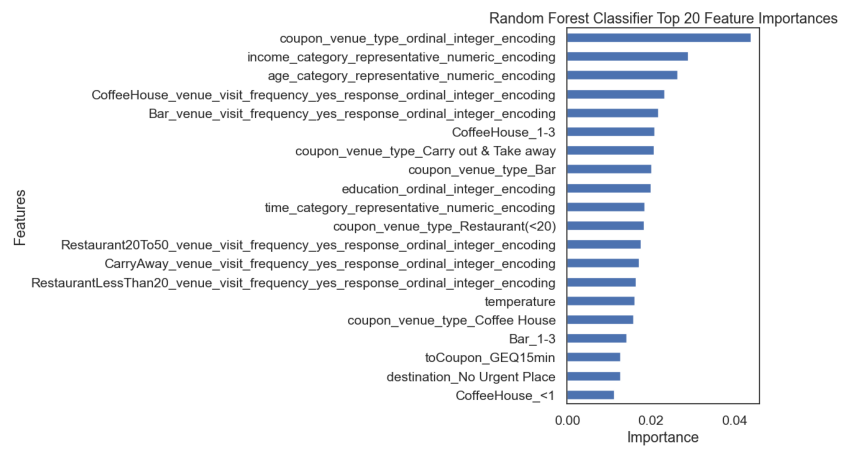

time: 171 ms (started: 2022-12-12 01:16:16 -08:00)


In [183]:
dpi=100
figure_filename = '../reports/figures/figure_random_forest_classifier_all_data_fit_top_20_feature_importances_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(15, 12))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    plt.subplots(figsize=(4, 8))

    random_forest_classifier_all_data_fit_feature_importances = random_forest_classifier_all_data_fit.feature_importances_
    series_random_forest_classifier_all_data_fit_feature_importances = pd.Series(random_forest_classifier_all_data_fit_feature_importances, 
                                                                                 index=random_forest_classifier_all_data_fit.X_columns).sort_values(ascending=False)

    series_random_forest_classifier_all_data_fit_feature_importances[0:20].sort_values(ascending=True).plot(kind='barh')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Random Forest Classifier Top 20 Feature Importances');

    plt.savefig(figure_filename, bbox_inches='tight', dpi=100)

plt.show()

### Random Forest Classifier: All Data, Reduced Features

#### Get Random Forest Features By Importance

In [184]:
#get and order random forest features by importance
random_forest_classifier_all_data_fit_feature_importances = random_forest_classifier_all_data_fit.feature_importances_
series_random_forest_classifier_all_data_fit_feature_importances = pd.Series(random_forest_classifier_all_data_fit_feature_importances,
                                                                             index=random_forest_classifier_all_data_fit.X_columns).sort_values(ascending=False)


#get top 25 and 50 features list
column_name_list_random_forest_classifier_all_data_top_50_by_feature_importance_target = series_random_forest_classifier_all_data_fit_feature_importances[0:50].index.to_list() + ['Y']
column_name_list_random_forest_classifier_all_data_top_25_by_feature_importance_target = series_random_forest_classifier_all_data_fit_feature_importances[0:25].index.to_list() + ['Y']

pl(column_name_list_random_forest_classifier_all_data_top_50_by_feature_importance_target)


51


['coupon_venue_type_ordinal_integer_encoding',
 'income_category_representative_numeric_encoding',
 'age_category_representative_numeric_encoding',
 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'CoffeeHouse_1-3',
 'coupon_venue_type_Carry out & Take away',
 'coupon_venue_type_Bar',
 'education_ordinal_integer_encoding',
 'time_category_representative_numeric_encoding',
 'coupon_venue_type_Restaurant(<20)',
 'Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'temperature',
 'coupon_venue_type_Coffee House',
 'Bar_1-3',
 'toCoupon_GEQ15min',
 'destination_No Urgent Place',
 'CoffeeHouse_<1',
 'coupon_venue_type_Restaurant(20-50)',
 'has_children',
 'passenger_Friend(s)',
 'maritalStatus_Single',
 'weather

time: 56.7 ms (started: 2022-12-12 01:16:16 -08:00)


#### Identify High Correlation Features For Drop

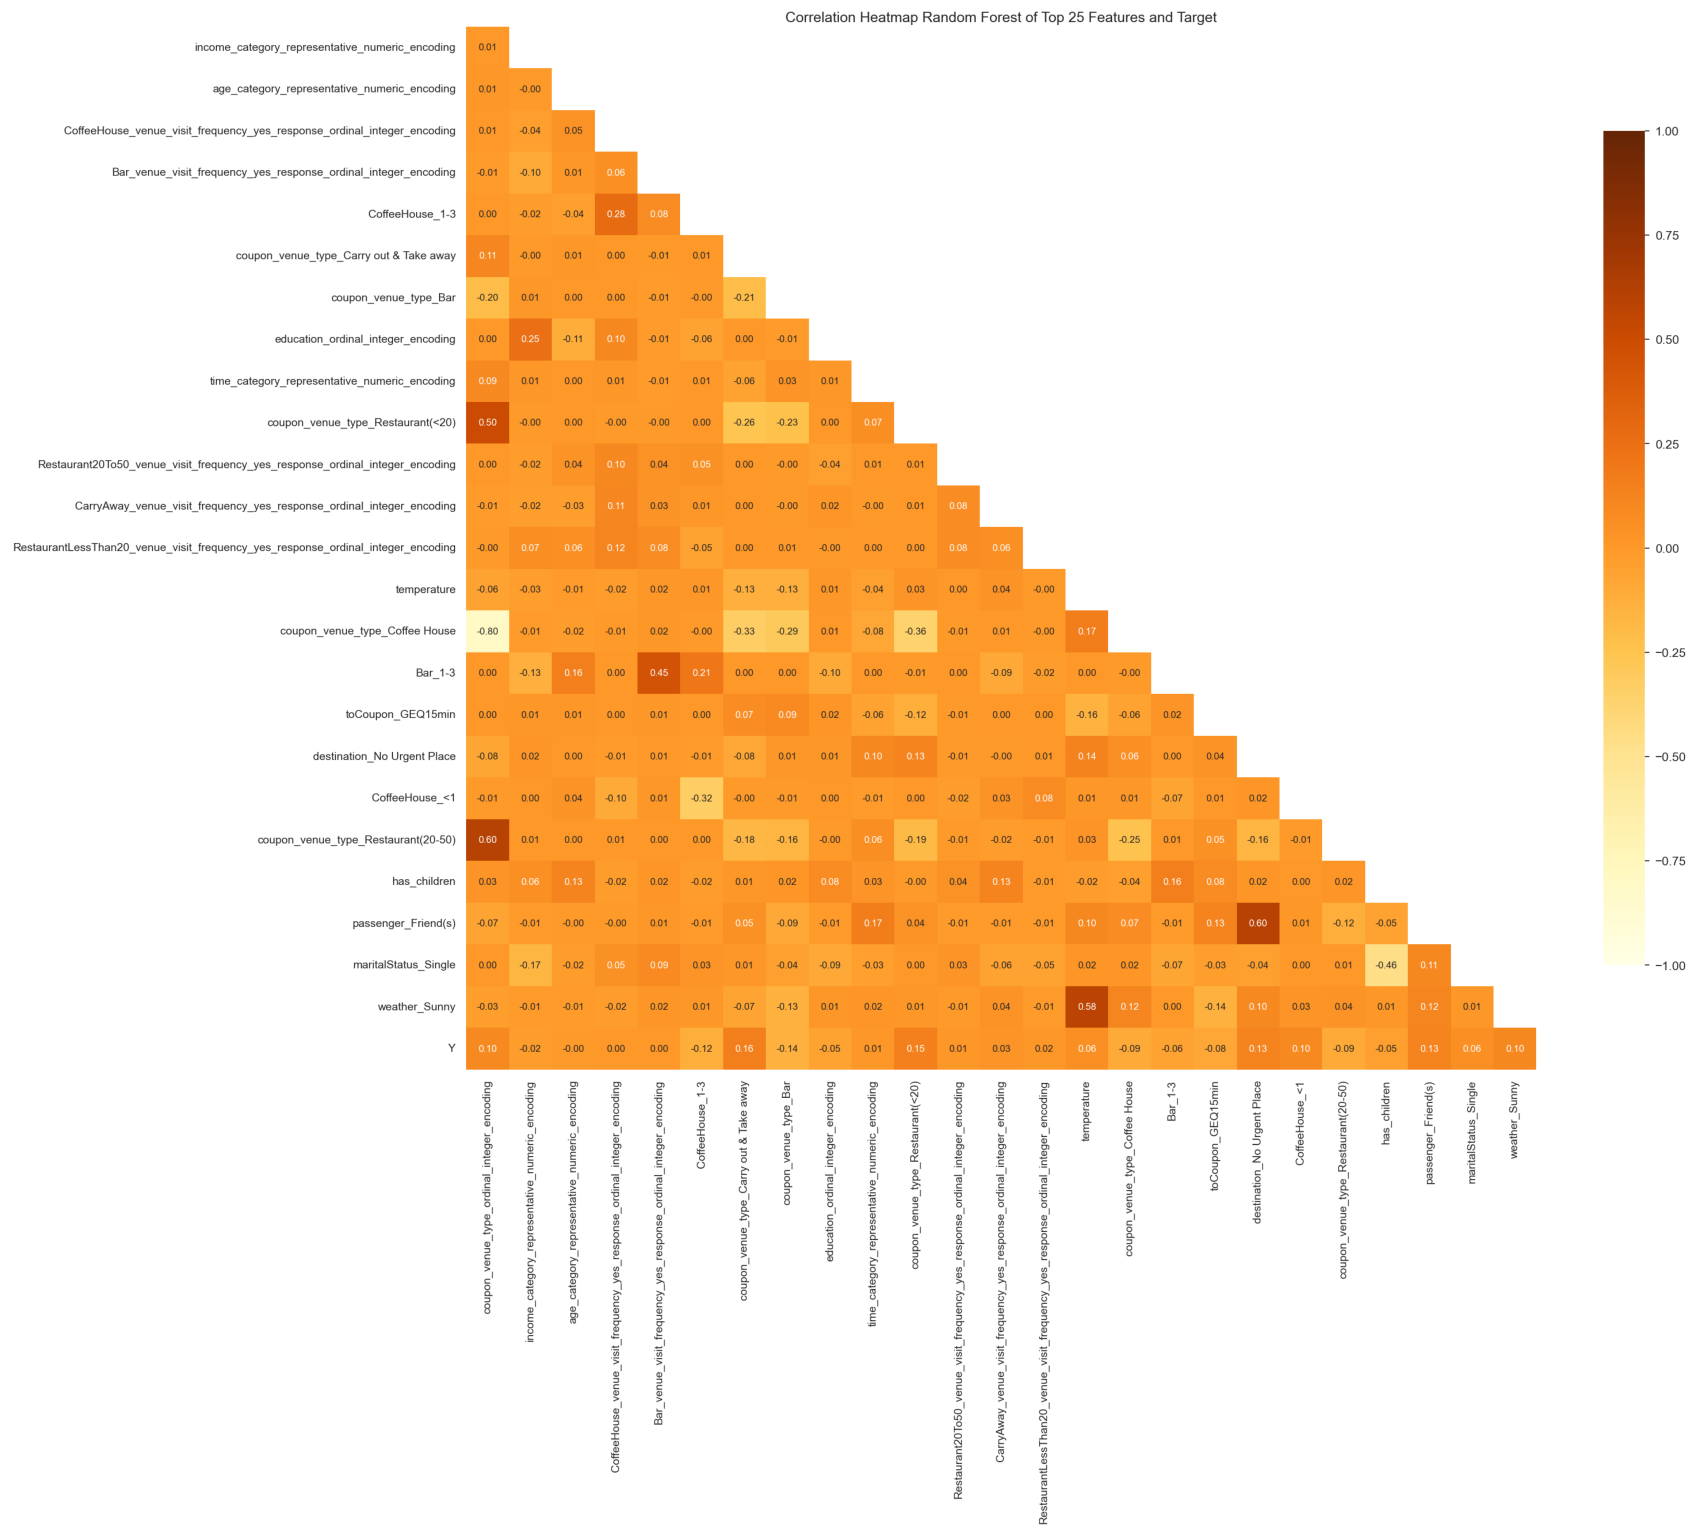

time: 937 ms (started: 2022-12-12 01:16:16 -08:00)


In [185]:
#Identify High Correlation Features For Drop
dpi=100
figure_filename = '../reports/figures/figure_correlation_heatmap_random_forest_classifier_all_data_top_25_and_target_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(35, 28))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    #correlation heatmap of top 25 features and target

    df_corr = df_X_train_test_Y_train_test.loc[:, column_name_list_random_forest_classifier_all_data_top_25_by_feature_importance_target].corr()

    fig, ax = plt.subplots(figsize=(30, 24))

    mask = np.triu(np.ones_like(df_corr, dtype=bool))
    mask = mask[1:, :-1]

    corr = df_corr.iloc[1:,:-1].copy()

    sns.set(font_scale=1.4)
    sns.set_style("white")

    res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)
    plt.title('Correlation Heatmap Random Forest of Top 25 Features and Target', fontsize=18)

    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()



In [186]:
top_25_feature_importance_duplicate_like_features_list = \
['income_ordinal_integer_encoding',
 'income_category_representative_numeric_encoding',
 'age_category_representative_numeric_encoding',
 'age_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'time_category_representative_numeric_encoding',
 'temperature_ordinal_integer_encoding',
 'temperature']

top_25_feature_importance_duplicate_like_features_list_drop = \
['income_ordinal_integer_encoding',
 'age_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'temperature_ordinal_integer_encoding']

pl(top_25_feature_importance_duplicate_like_features_list_drop)

4


['income_ordinal_integer_encoding',
 'age_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'temperature_ordinal_integer_encoding']

time: 3.14 ms (started: 2022-12-12 01:16:17 -08:00)


In [187]:
dir()

['Audio',
 'ConfusionMatrixDisplay',
 'GradientBoostingClassifier',
 'GridSearchCV',
 'In',
 'LogisticRegression',
 'Out',
 'RandomForestClassifier',
 'StratifiedKFold_5_splits',
 'Y_test_gradient_boosting_prediction_list',
 'Y_test_gradient_boosting_prediction_probability_class0_class1_ndarray',
 'Y_test_gradient_boosting_prediction_probability_list',
 'Y_test_model_prediction_data_frame_collection',
 'Y_test_prediction_list',
 'Y_test_random_forest_prediction_probability_class0_class1_ndarray',
 'Y_test_random_forest_prediction_probability_list',
 '_',
 '_10',
 '_100',
 '_103',
 '_104',
 '_105',
 '_106',
 '_107',
 '_11',
 '_110',
 '_111',
 '_112',
 '_113',
 '_114',
 '_115',
 '_117',
 '_119',
 '_12',
 '_120',
 '_121',
 '_122',
 '_123',
 '_124',
 '_125',
 '_126',
 '_127',
 '_128',
 '_129',
 '_13',
 '_130',
 '_133',
 '_134',
 '_135',
 '_147',
 '_148',
 '_149',
 '_15',
 '_151',
 '_152',
 '_153',
 '_16',
 '_164',
 '_166',
 '_167',
 '_17',
 '_174',
 '_176',
 '_18',
 '_182',
 '_184',
 '_186

time: 6.48 ms (started: 2022-12-12 01:16:17 -08:00)


In [188]:
!pip3 install watermark

%load_ext watermark

Defaulting to user installation because normal site-packages is not writeable
time: 1.64 s (started: 2022-12-12 01:16:17 -08:00)


In [189]:
%watermark -a "Paul Jacob" -d -t -v -p numpy,pandas -g

Author: Paul Jacob

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.2.0

numpy : 1.21.5
pandas: 1.4.2

Git hash: a6dab0ed2e4ecad406cd0cb695aad8bc0d090597

time: 55.2 ms (started: 2022-12-12 01:16:19 -08:00)


In [190]:
#https://towardsdatascience.com/generating-a-requirements-file-jupyter-notebook-385f1c315b52



time: 704 µs (started: 2022-12-12 01:16:19 -08:00)
